In [55]:
# Import packages and implement notebook settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy

pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)

%matplotlib inline 

sns.set_theme(style="darkgrid")


In [57]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import time


# GA_listings_df import and summary

In [60]:
GA_listings_df = pd.read_csv('GA_LISTINGS_SALES_V2.csv',
           index_col = 0)

GA_listings_df.head()


latitude  longitude       full_street_address       city    county_name  beds  baths_full  baths_half  square_footage  lot_size  year_built                                  details  special_features  unit_count   price  transaction_type  listing_status  listing_special_features census_state_name census_county_name      zip
0  30.725605 -83.671772  0 Johnson Road #10026497    Quitman  Brooks-County   NaN         NaN         NaN             NaN       4.0         NaN                    Lots/Land, 4.93 Acres                 0         NaN   51900                 1               0                         0           Georgia         Brooks, GA  31643.0
1  30.781796 -83.558475          505 S Lee Street    Quitman  Brooks-County   3.0         1.0         NaN          1460.0       0.0      1910.0    Detached, 3 Beds, 1 Bath, 1,460 Sq Ft                 0         NaN   99000                 1               1                         0           Georgia         Brooks, GA  31643.0
2  30.864096 -81.622765      33 River Oaks Street   Woodbine  Camden-County   3.0         2.0         NaN          1254.0       0.0      1985.0   Detached, 3 Beds, 2 Baths, 1,254 Sq Ft                 0         NaN  245816                 1               1                         0           Georgia         Camden, GA  31569.0
3  30.796300 -81.681675     605 E Lawnwood Avenue  Kingsland  Camden-County   2.0         2.0         NaN          1016.0       0.0      2005.0  Townhouse, 2 Beds, 2 Baths, 1,016 Sq Ft                 0         NaN  155000                 1               1                         0           Georgia         Camden, GA  31548.0
4  30.762972 -81.660240    84 Whippoorwill Circle  Kingsland  Camden-County   3.0         2.0         NaN          1618.0       0.0      1986.0   Detached, 3 Beds, 2 Baths, 1,618 Sq Ft                 0         NaN  200000                 1               1                         0           Georgia         Camden, GA  31548.0

In [62]:
GA_listings_df.shape

(31064, 21)

In [64]:
GA_listings_df.describe()

latitude     longitude          beds    baths_full   baths_half  square_footage      lot_size    year_built  special_features  unit_count         price  transaction_type  listing_status  listing_special_features           zip
count  31064.000000  31064.000000  14167.000000  13978.000000  5855.000000    1.267800e+04  28387.000000  16620.000000      31064.000000  219.000000  3.106400e+04           31064.0    31064.000000              31064.000000  31028.000000
mean      33.667087    -83.793974      3.600692      2.513950     1.103501    3.216709e+03     19.311093   1985.574489          2.511879    3.529680  4.942250e+05               1.0        0.958891                  2.511879  30553.727246
std        0.957898      0.996623      1.366697      1.253564     0.528206    2.546856e+04    657.400055     34.329650         34.077367    6.351536  1.332321e+06               0.0        0.198545                 34.077367    774.253758
min       30.361079    -85.522663      0.000000      0.000000     0.000000    0.000000e+00      0.000000   1700.000000          0.000000    1.000000  1.000000e+00               1.0        0.000000                  0.000000      0.000000
25%       33.302195    -84.428492      3.000000      2.000000     1.000000    1.450000e+03      0.000000   1967.000000          0.000000    2.000000  9.000000e+04               1.0        1.000000                  0.000000  30165.000000
50%       33.825564    -84.015629      3.000000      2.000000     1.000000    2.052000e+03      1.000000   1994.000000          0.000000    2.000000  2.850000e+05               1.0        1.000000                  0.000000  30512.000000
75%       34.323055    -83.461731      4.000000      3.000000     1.000000    2.952000e+03      3.000000   2010.000000          0.000000    4.000000  5.229468e+05               1.0        1.000000                  0.000000  30650.000000
max       34.995653    -80.841980     71.000000     56.000000    10.000000    2.090880e+06  73616.000000   2023.000000        514.000000   89.000000  1.626270e+08               1.0        1.000000                514.000000  92544.000000

# Missing Data Exploration

In [67]:
# Columns with missing data and the number of values

GA_listings_df.isnull().sum(axis=0)[GA_listings_df.isnull().sum(axis=0) > 0]

beds              16897
baths_full        17086
baths_half        25209
square_footage    18386
lot_size           2677
year_built        14444
unit_count        30845
zip                  36
dtype: int64

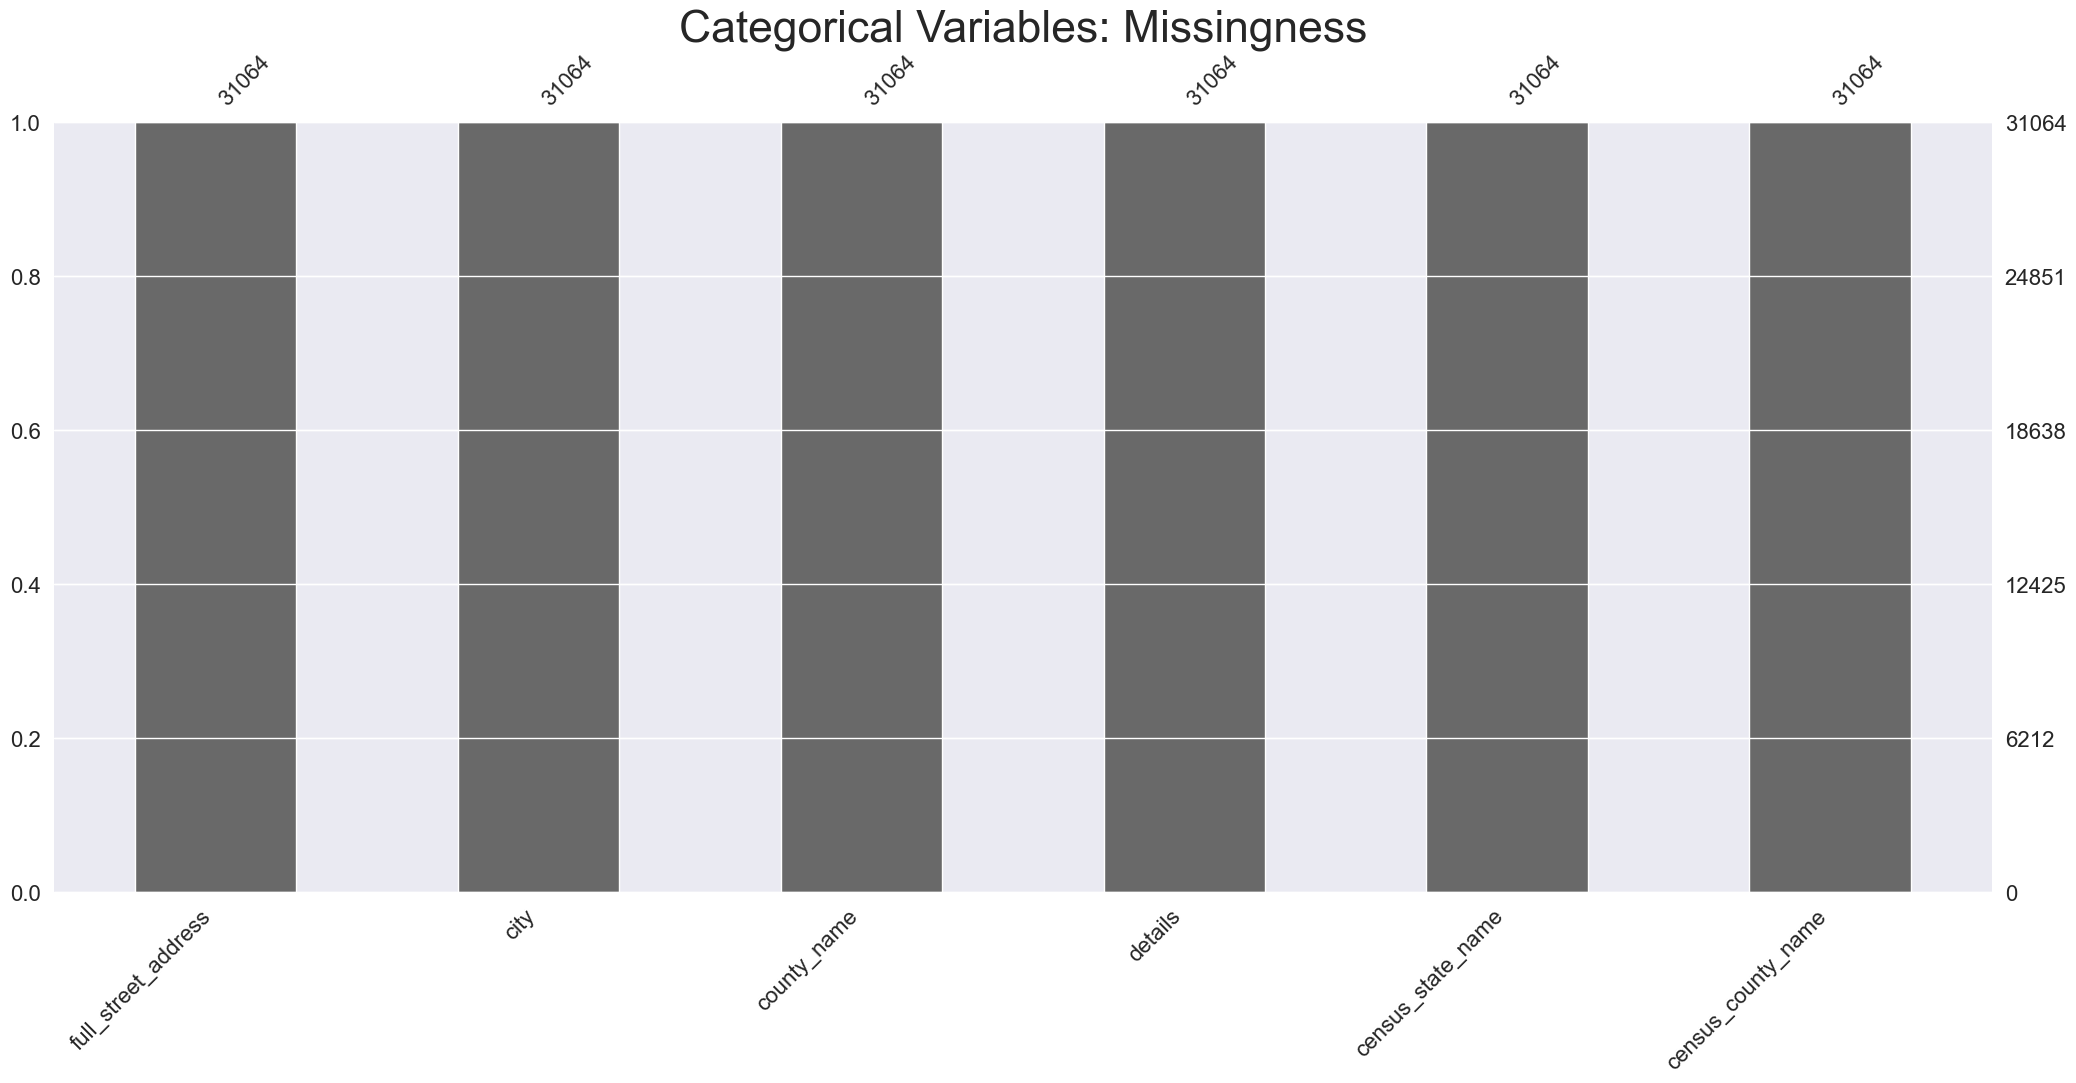

In [69]:
# Missing categorical values
sns.set_theme(style="darkgrid")

msno.bar(GA_listings_df.select_dtypes(include=['object']), sort = 'ascending')
plt.title('Categorical Variables: Missingness', fontsize = 32)
plt.show()


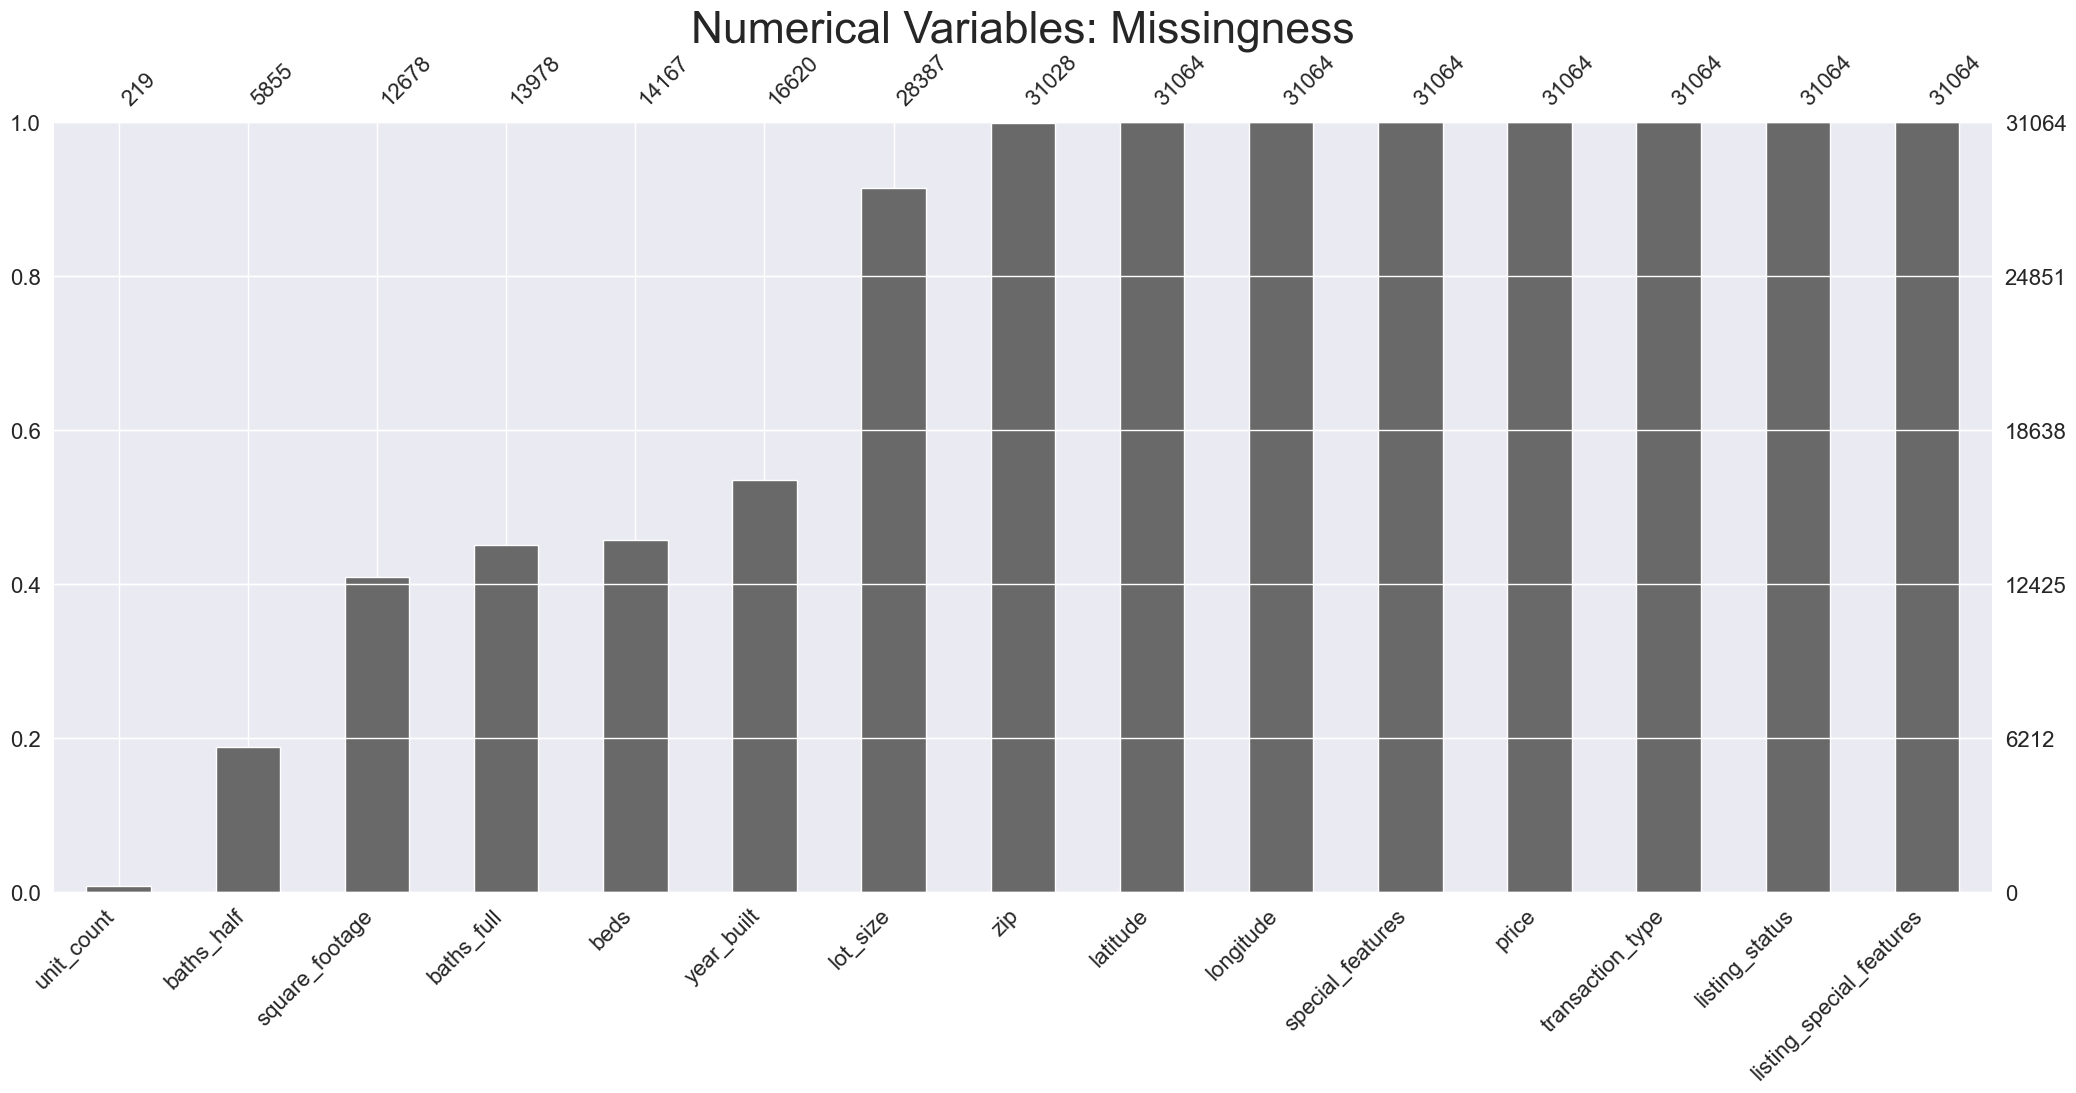

In [71]:
# Missing numerical values

msno.bar(GA_listings_df.select_dtypes(include=['int64', 'float64']), sort = 'ascending')
plt.title('Numerical Variables: Missingness', fontsize = 32)
plt.show()


In [73]:
# Imputation for missing beds, baths_half, baths_full, square_footage, year_built

GA_listings_df['beds'] = GA_listings_df['beds'].fillna(0) # fill with 0
GA_listings_df['baths_half'] = GA_listings_df['baths_half'].fillna(0) # fill with 0
GA_listings_df['baths_full'] = GA_listings_df['baths_full'].fillna(0) # fill with 0
GA_listings_df['square_footage'] = GA_listings_df['square_footage'].fillna(0) # fill with 0
GA_listings_df['year_built'] = GA_listings_df['year_built'].fillna(0) # fill with 0




In [75]:
# Imputation for lot_size

# Function that will extract acreage from 'details' column
def extract_acres(row):
    for item in row.split(','):
        if 'Acres' in item:
            return item.strip().split(' Acres')[0]
        
# Replace 'lot_size' column with full acreage value (no rounding) and fill with 0 if no information present
GA_listings_df['lot_size'] = GA_listings_df['details'].apply(extract_acres).fillna(0).astype(float)


In [77]:
# Imputation for unit_count
# If number of beds are greater than 1 but unit_count is missing value, assigning it a value of 1.
# Otherwise, filling value with 0.

GA_listings_df['unit_count'] = np.where(GA_listings_df['beds'] >= 1, GA_listings_df['unit_count'].fillna(1), GA_listings_df['unit_count'].fillna(0))


In [79]:
# Imputation for zip

from geopy.geocoders import Nominatim

# Define the function to get ZIP code from latitude and longitude
def get_zipcode(latitude, longitude):
    geolocator = Nominatim(user_agent="zipcode_locator")
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    address = location.raw['address']
    return address.get('postcode')

# Apply the function only to rows with missing ZIP code values
missing_zip_rows = GA_listings_df[GA_listings_df['zip'].isna()]

# Using .loc to ensure the DataFrame is modified in place
GA_listings_df.loc[GA_listings_df['zip'].isna(), 'zip'] = missing_zip_rows.apply(
    lambda row: get_zipcode(row['latitude'], row['longitude']), axis=1
)

# Convert 'zip' column to int64, handling any remaining NaNs
GA_listings_df['zip'] = GA_listings_df['zip'].fillna(0).astype('int64')

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/1892351367.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['30680' '30120' '31566' '31566' '30108' '31322' '31012' '30092' '30531'
 '30531' '30531' '30531' '30531' '30531' '30531' None '30281' '30281'
 '30281' '30281' '30434' '30442' '31028' '31028' '31028' '31028' '31028'
 '31028' '31322' '30531' '30531' '30531' '30531' '30531' '30531' '30531']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  GA_listings_df.loc[GA_listings_df['zip'].isna(), 'zip'] = missing_zip_rows.apply(


In [80]:
# # Imputation for zip

# from geopy.geocoders import Nominatim

# # Define the function to get ZIP code from latitude and longitude
# def get_zipcode(latitude, longitude):
#     geolocator = Nominatim(user_agent="zipcode_locator")
#     location = geolocator.reverse((latitude, longitude), exactly_one=True)
#     address = location.raw['address']
#     return address.get('postcode')


# # Apply the function only to rows with missing ZIP code values
# missing_zip_rows = GA_listings_df[GA_listings_df['zip'].isna()]
# missing_zip_rows['zip'] = missing_zip_rows.apply(lambda row: get_zipcode(row['latitude'], row['longitude']), axis=1)

# # Update the original DataFrame with the imputed ZIP codes
# GA_listings_df.update(missing_zip_rows)

# GA_listings_df['zip'] = GA_listings_df['zip'].astype('int64')


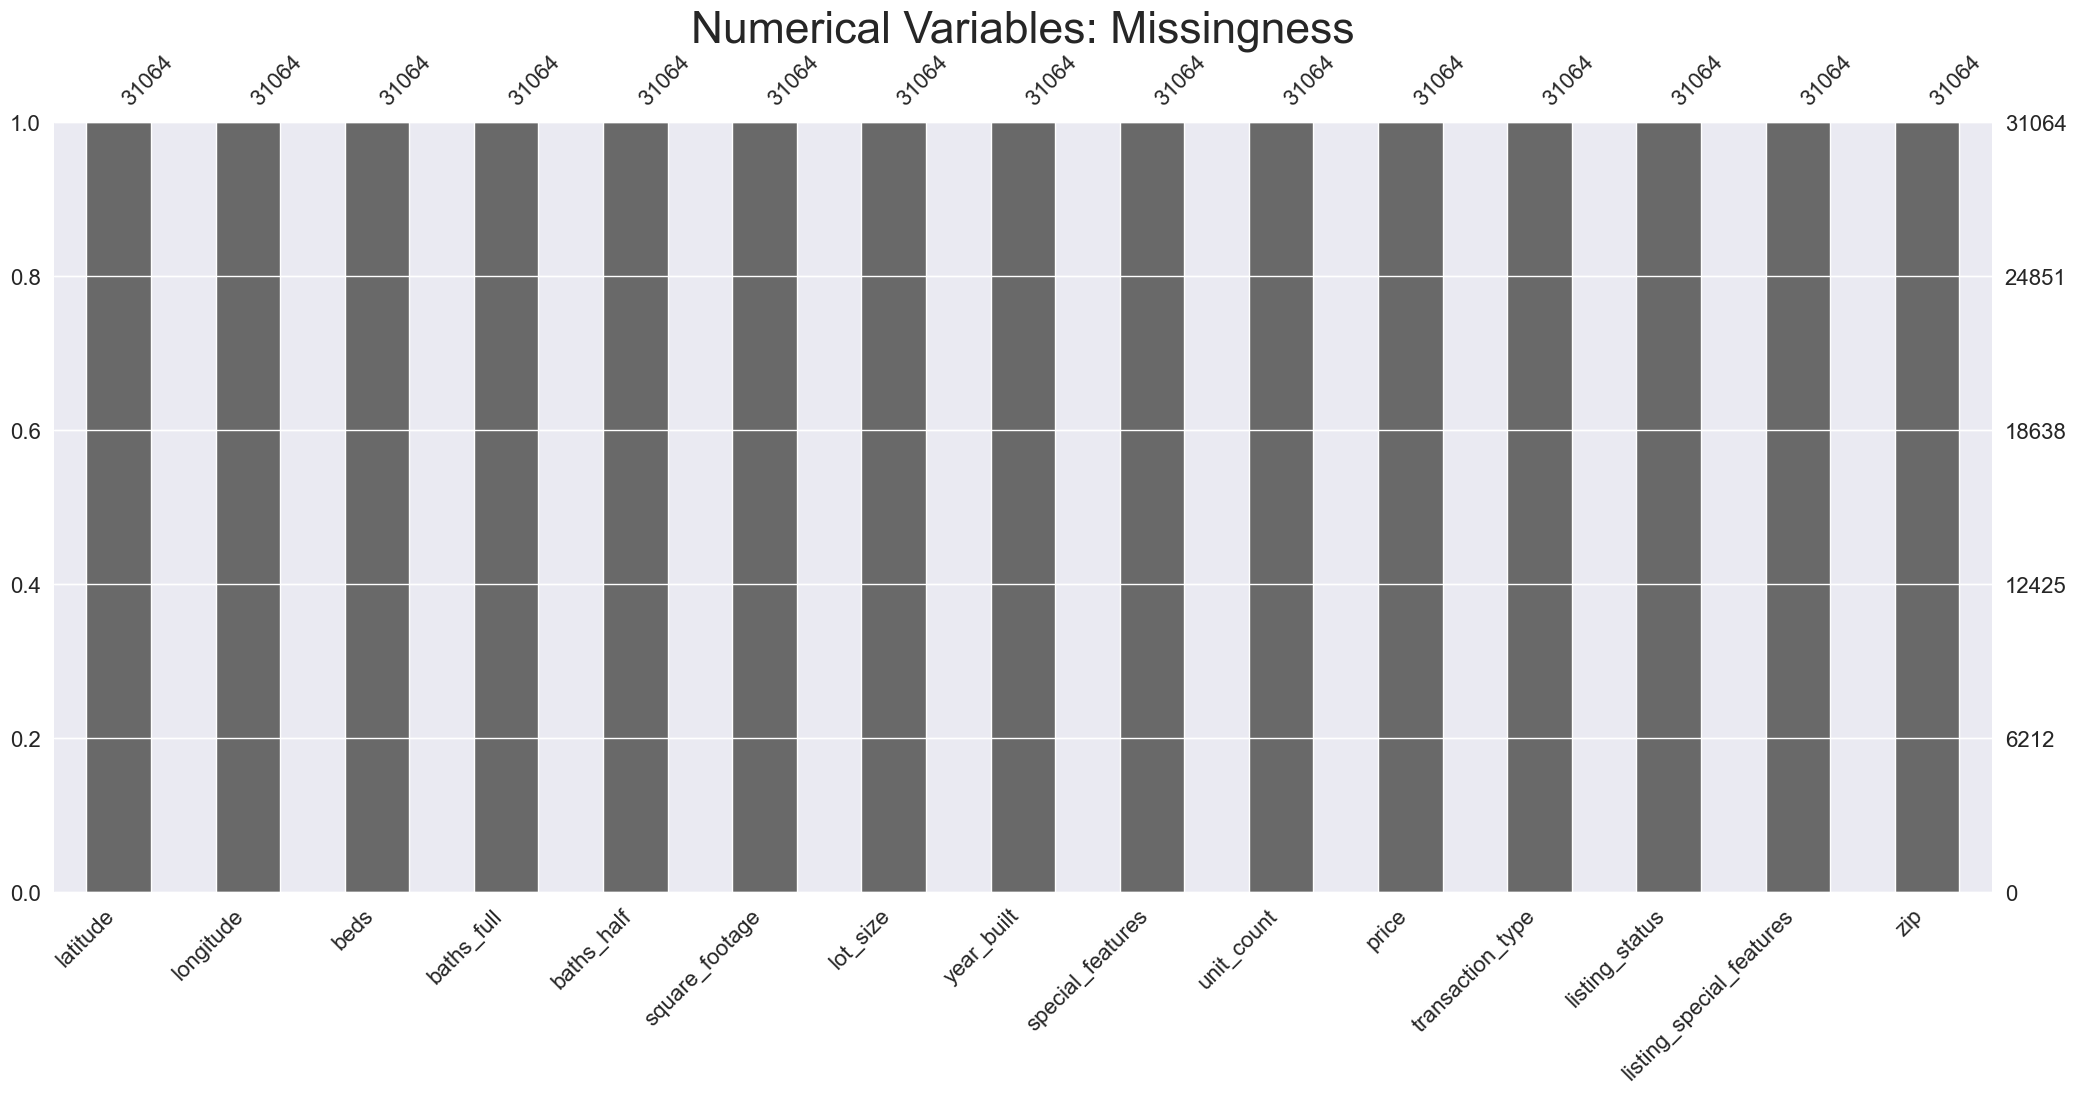

In [81]:
# Missing categorical values
sns.set_theme(style="darkgrid")

msno.bar(GA_listings_df.select_dtypes(include=['int64', 'float64']), sort = 'ascending')
plt.title('Numerical Variables: Missingness', fontsize = 32)
plt.show()


# Feature Engineering

In [87]:
# Extracting first descriptor in details column

GA_listings_df['property_type'] = GA_listings_df['details'].str.split(',').str[0] 

GA_listings_df.head()

latitude  longitude       full_street_address       city    county_name  beds  baths_full  baths_half  square_footage  lot_size  year_built                                  details  special_features  unit_count   price  transaction_type  listing_status  listing_special_features census_state_name census_county_name    zip property_type
0  30.725605 -83.671772  0 Johnson Road #10026497    Quitman  Brooks-County   0.0         0.0         0.0             0.0      4.93         0.0                    Lots/Land, 4.93 Acres                 0         0.0   51900                 1               0                         0           Georgia         Brooks, GA  31643     Lots/Land
1  30.781796 -83.558475          505 S Lee Street    Quitman  Brooks-County   3.0         1.0         0.0          1460.0      0.00      1910.0    Detached, 3 Beds, 1 Bath, 1,460 Sq Ft                 0         1.0   99000                 1               1                         0           Georgia         Brooks, GA  31643      Detached
2  30.864096 -81.622765      33 River Oaks Street   Woodbine  Camden-County   3.0         2.0         0.0          1254.0      0.00      1985.0   Detached, 3 Beds, 2 Baths, 1,254 Sq Ft                 0         1.0  245816                 1               1                         0           Georgia         Camden, GA  31569      Detached
3  30.796300 -81.681675     605 E Lawnwood Avenue  Kingsland  Camden-County   2.0         2.0         0.0          1016.0      0.00      2005.0  Townhouse, 2 Beds, 2 Baths, 1,016 Sq Ft                 0         1.0  155000                 1               1                         0           Georgia         Camden, GA  31548     Townhouse
4  30.762972 -81.660240    84 Whippoorwill Circle  Kingsland  Camden-County   3.0         2.0         0.0          1618.0      0.00      1986.0   Detached, 3 Beds, 2 Baths, 1,618 Sq Ft                 0         1.0  200000                 1               1                         0           Georgia         Camden, GA  31548      Detached

In [89]:
GA_listings_df[['details','property_type']].head()

details property_type
0                    Lots/Land, 4.93 Acres     Lots/Land
1    Detached, 3 Beds, 1 Bath, 1,460 Sq Ft      Detached
2   Detached, 3 Beds, 2 Baths, 1,254 Sq Ft      Detached
3  Townhouse, 2 Beds, 2 Baths, 1,016 Sq Ft     Townhouse
4   Detached, 3 Beds, 2 Baths, 1,618 Sq Ft      Detached

In [91]:
GA_listings_df.shape

(31064, 22)

# crime_rating_zipcode import and summary


In [94]:
crime_rating_df = pd.read_csv('crime_rating_zipcode.csv')
crime_rating_df = crime_rating_df.drop(columns = 'Unnamed: 0')

crime_rating_df.head()


census_state_abbr  census_zcta5_geoid  census_cbsa_geoid_count census_cbsa_geoid_list overall_crime_grade violent_crime_grade  violent_crime_total_rate  violent_crime_assault_rate  violent_crime_robbery_rate  violent_crime_rape_rate  violent_crime_murder_rate property_crime_grade  property_crime_total_rate  property_crime_theft_rate  property_crime_vehicle_theft_rate  property_crime_burglary_rate  property_crime_arson_rate other_crime_grade  other_crime_total_rate  other_crime_kidnapping_rate  other_crime_drug_crimes_rate  other_crime_vandalism_rate  other_crime_identity_theft_rate  other_crime_animal_cruelty_rate                             crime_safety_paragraph                   interpreting_crime_map_paragraph
0                GA               30002                        1                  12060                  D-                   C                     3.106                      1.7060                      1.0670                   0.2545                     0.0783                    F                      52.09                      43.96                              3.687                         4.337                     0.1075                B+                   5.987                       0.1236                        0.9456                       3.981                           0.8824                           0.0542  The D- grade means the rate of crime is much h...  When looking at the crime map for 30002, remem...
1                GA               30004                        1                  12060                  C-                  A-                     1.553                      0.9140                      0.3858                   0.2240                     0.0296                   D-                      32.63                      29.14                              1.124                         2.263                     0.1017                A+                   3.171                       0.0404                        0.7863                       1.524                           0.8159                           0.0042  The C- grade means the rate of crime is slight...  When looking at the crime map for 30004, remem...
2                GA               30005                        1                  12060                  B+                  A-                     1.480                      0.7977                      0.4288                   0.2256                     0.0275                    C                      15.39                      11.97                              1.468                         1.844                     0.1118                A+                   2.709                       0.0512                        0.3942                       1.394                           0.8653                           0.0041  The B+ grade means the rate of crime is lower ...  When looking at the crime map for 30005, remem...
3                GA               30008                        1                  12060                  D+                   C                     2.910                      1.2040                      1.3940                   0.2531                     0.0594                    D                      28.26                      20.84                              2.066                         5.261                     0.0946                B-                   7.648                       0.0883                        0.9090                       5.777                           0.8214                           0.0522  The D+ grade means the rate of crime is higher...  When looking at the crime map for 30008, remem...
4                GA               30009                        1                  12060                  D-                  A-                     1.611                      1.0460                      0.2950                   0.2294                     0.0400                    F                      58.32                      54.14                              1.474 

In [96]:
crime_rating_df.columns

Index(['census_state_abbr', 'census_zcta5_geoid', 'census_cbsa_geoid_count', 'census_cbsa_geoid_list', 'overall_crime_grade', 'violent_crime_grade', 'violent_crime_total_rate', 'violent_crime_assault_rate', 'violent_crime_robbery_rate', 'violent_crime_rape_rate', 'violent_crime_murder_rate', 'property_crime_grade', 'property_crime_total_rate', 'property_crime_theft_rate', 'property_crime_vehicle_theft_rate', 'property_crime_burglary_rate', 'property_crime_arson_rate', 'other_crime_grade', 'other_crime_total_rate', 'other_crime_kidnapping_rate', 'other_crime_drug_crimes_rate', 'other_crime_vandalism_rate', 'other_crime_identity_theft_rate', 'other_crime_animal_cruelty_rate', 'crime_safety_paragraph', 'interpreting_crime_map_paragraph'], dtype='object')

In [98]:
crime_rating_df.shape

(726, 26)

In [100]:
crime_rating_df['census_zcta5_geoid'].duplicated().any()

False

In [102]:
crime_rating_df.describe()

census_zcta5_geoid  census_cbsa_geoid_count  violent_crime_total_rate  violent_crime_assault_rate  violent_crime_robbery_rate  violent_crime_rape_rate  violent_crime_murder_rate  property_crime_total_rate  property_crime_theft_rate  property_crime_vehicle_theft_rate  property_crime_burglary_rate  property_crime_arson_rate  other_crime_total_rate  other_crime_kidnapping_rate  other_crime_drug_crimes_rate  other_crime_vandalism_rate  other_crime_identity_theft_rate  other_crime_animal_cruelty_rate
count          726.000000               726.000000                726.000000                  726.000000                  726.000000               726.000000                 726.000000                 726.000000                 726.000000                         726.000000                    726.000000                 726.000000              725.000000                   726.000000                    726.000000                  725.000000                       726.000000                       726.000000
mean         31192.415978                 1.057851                  3.628924                    2.415621                    0.909414                 0.256657                   0.047235                  30.323595                  21.552821                           2.232393                      6.452248                   0.086279               10.496128                     0.158867                      2.227102                    7.233889                         0.837094                         0.043337
std           1886.384965                 0.602947                  2.636762                    2.004043                    0.972578                 0.060357                   0.078517                  28.738825                  24.986148                           2.807408                      6.357703                   0.078180               10.331241                     0.222260                      2.257033                    9.603389                         0.156147                         0.041284
min          30002.000000                 0.000000                  0.943800                    0.077100                    0.009800                 0.220900                   0.001000                   5.376000                   0.611900                           0.571400                      1.704000                   0.019300                1.960000                     0.004900                      0.006000                    0.168400                         0.733200                         0.002100
25%          30315.250000                 1.000000                  2.210250                    1.394250                    0.309775                 0.241725                   0.025400                  17.155000                  10.130000                           1.132000                      4.570000                   0.056725                5.755000                     0.050225                      0.900700                    3.363000                         0.750025                         0.008525
50%          30723.000000                 1.000000                  2.911500                    1.936500                    0.622250                 0.250000                   0.030250                  22.940000                  14.805000                           1.532000                      5.796500                   0.074350                8.380000                     0.080950                      1.516000                    5.303000                         0.785000                         0.032700
75%          31515.250000                 1.000000                  4.283750                    2.838500                    1.195750                 0.261375                   0.039550                  33.357500                  24.150000                           2.246500                      6.846000                   0.094975               12.530000                     0.156800                      2.755750                    8.589000          

# Join GA_listings_df and criming_rating_df

In [105]:
GA_listings_crime_merged = pd.merge(left = GA_listings_df, 
         right = crime_rating_df,
         left_on = 'zip',
         right_on = 'census_zcta5_geoid',
         how = 'left'
        )

GA_listings_crime_merged = GA_listings_crime_merged.drop(columns = ['census_cbsa_geoid_list', 'interpreting_crime_map_paragraph','crime_safety_paragraph']) # lots of missing data

In [107]:

GA_listings_crime_merged.isnull().sum(axis=0)[GA_listings_crime_merged.isnull().sum(axis=0) > 0]

census_state_abbr                    43
census_zcta5_geoid                   43
census_cbsa_geoid_count              43
overall_crime_grade                  43
violent_crime_grade                  43
violent_crime_total_rate             43
violent_crime_assault_rate           43
violent_crime_robbery_rate           43
violent_crime_rape_rate              43
violent_crime_murder_rate            43
property_crime_grade                 43
property_crime_total_rate            43
property_crime_theft_rate            43
property_crime_vehicle_theft_rate    43
property_crime_burglary_rate         43
property_crime_arson_rate            43
other_crime_grade                    43
other_crime_total_rate               43
other_crime_kidnapping_rate          43
other_crime_drug_crimes_rate         43
other_crime_vandalism_rate           43
other_crime_identity_theft_rate      43
other_crime_animal_cruelty_rate      43
dtype: int64

In [109]:
GA_listings_crime_merged.shape[0]-42

31022

In [111]:
# Drop 42 rows of data without crime data

GA_listings_crime_merged = GA_listings_crime_merged[~GA_listings_crime_merged.isna().any(axis=1)]

In [113]:
GA_listings_crime_merged.isnull().sum(axis=0)[GA_listings_crime_merged.isnull().sum(axis=0) > 0]

Series([], dtype: int64)

In [115]:
GA_listings_crime_merged = GA_listings_crime_merged.reset_index().drop(columns = 'index')

GA_listings_crime_merged.head()

latitude  longitude       full_street_address       city    county_name  beds  baths_full  baths_half  square_footage  lot_size  year_built                                  details  special_features  unit_count   price  transaction_type  listing_status  listing_special_features census_state_name census_county_name    zip property_type census_state_abbr  census_zcta5_geoid  census_cbsa_geoid_count overall_crime_grade violent_crime_grade  violent_crime_total_rate  violent_crime_assault_rate  violent_crime_robbery_rate  violent_crime_rape_rate  violent_crime_murder_rate property_crime_grade  property_crime_total_rate  property_crime_theft_rate  property_crime_vehicle_theft_rate  property_crime_burglary_rate  property_crime_arson_rate other_crime_grade  other_crime_total_rate  other_crime_kidnapping_rate  other_crime_drug_crimes_rate  other_crime_vandalism_rate  other_crime_identity_theft_rate  other_crime_animal_cruelty_rate
0  30.725605 -83.671772  0 Johnson Road #10026497    Quitman  Brooks-County   0.0         0.0         0.0             0.0      4.93         0.0                    Lots/Land, 4.93 Acres                 0         0.0   51900                 1               0                         0           Georgia         Brooks, GA  31643     Lots/Land                GA             31643.0                      1.0                  D-                   D                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   D-                      38.96                     28.720                              1.422                         8.751                     0.0656                D+                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842
1  30.781796 -83.558475          505 S Lee Street    Quitman  Brooks-County   3.0         1.0         0.0          1460.0      0.00      1910.0    Detached, 3 Beds, 1 Bath, 1,460 Sq Ft                 0         1.0   99000                 1               1                         0           Georgia         Brooks, GA  31643      Detached                GA             31643.0                      1.0                  D-                   D                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   D-                      38.96                     28.720                              1.422                         8.751                     0.0656                D+                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842
2  30.864096 -81.622765      33 River Oaks Street   Woodbine  Camden-County   3.0         2.0         0.0          1254.0      0.00      1985.0   Detached, 3 Beds, 2 Baths, 1,254 Sq Ft                 0         1.0  245816                 1               1                         0           Georgia         Camden, GA  31569      Detached                GA             31569.0                      1.0                  D+                  C+                     2.600                       1.778                      0.5553                   0.2425                     0.0247                   D-                      32.39                     26.210                              1.025                         5.105                     0.0454                B+                   5.921                       0.0802                        1.9190                       2.944                           0.9281                           0.0502
3  30.796300 -81.681675     605 E Lawnwood Avenue  Kingsland  Camden-County   2.0         2.0         0.0          1016.0      0.00      2005.0  Townhouse, 2 Beds, 2 Baths, 1,016 Sq Ft                 0         1.0  155000                 1    

# high_schools import and summary


In [118]:
high_schools_df = pd.read_csv('high_schools.csv')
high_schools_df = high_schools_df.drop(columns = 'Unnamed: 0')

high_schools_df.head()


id  districtID                     districtName   districtCity        lat       long                        name gradeLevels                                   address  rating    ratingScale schoolType  zipcode  studentsPerTeacher  parentRating
0   371          32   Chatham County School District       Savannah  32.045994 -81.092880       Savannah Arts Academy        9-12    500 Washington Avenue, 31405, Savannah    10.0  Above average     public    31405                15.0             5
1   544          41      Cobb County School District       Marietta  34.043900 -84.474358        Lassiter High School        9-12    2601 Shallowford Road, 30066, Marietta    10.0  Above average     public    30066                19.0             4
2  1036          73    Fulton County School District        Atlanta  34.049118 -84.208221   Chattahoochee High School        9-12         5230 Taylor Rd, 30022, Alpharetta     9.0  Above average     public    30022                17.0             4
3  1125          82  Gwinnett County School District  Lawrenceville  34.084606 -84.071609  North Gwinnett High School        9-12       20 Level Creek Road, 30024, Suwanee     9.0  Above average     public    30024                21.0             3
4  1295          91   Houston County School District          Perry  32.553894 -83.675148  Houston County High School        9-12  920 State Route 96, 31088, Warner Robins     9.0  Above average     public    31088                17.0             3

In [120]:
high_schools_df.columns

Index(['id', 'districtID', 'districtName', 'districtCity', 'lat', 'long', 'name', 'gradeLevels', 'address', 'rating', 'ratingScale', 'schoolType', 'zipcode', 'studentsPerTeacher', 'parentRating'], dtype='object')

# Find distances between homes and high schools

In [123]:
from scipy.spatial.distance import cdist

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface given their latitudes and longitudes
    in decimal degrees.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of the Earth in kilometers
    R = 6371.0

    # Calculate the distance
    distance = R * c

    return distance




In [125]:
# Create empty matrix to capture distances between listings and high_schools

hs_radius_matrix = np.zeros((len(GA_listings_crime_merged), len(high_schools_df)))

# Loop though each row of both listings and high_schools dataframes and 
# capture distance using haversine formula

for i in range(0,GA_listings_crime_merged.shape[0]):
    for j in range(0,high_schools_df.shape[0]):
        distance = haversine_distance(GA_listings_crime_merged['latitude'][i],
                                      GA_listings_crime_merged['longitude'][i],
                                      high_schools_df['lat'][j], 
                                      high_schools_df['long'][j])
        hs_radius_matrix[i, j] = distance

hs_radius_matrix

array([[285.43904195, 376.59072239, 372.97275172, ..., 375.28652638,
        278.11771534, 341.43738999],
       [272.94410634, 372.77331412, 368.39047684, ..., 370.68938347,
        274.85083973, 337.42272777],
       [140.70388589, 443.3527779 , 429.22985144, ..., 431.08852254,
        363.58666144, 409.13277201],
       ...,
       [344.89796636, 123.25915631, 101.81640257, ..., 100.43712497,
        185.26793462, 131.77995939],
       [344.51318205, 123.3148869 , 101.83152073, ..., 100.45951044,
        185.12710147, 131.73078291],
       [337.00212101, 133.90636405, 111.82904055, ..., 110.57820629,
        191.54358823, 140.46538661]])

In [127]:
# Capture high school statistics within user-defined radius

radius = 4 # Radius of interest

# Boolean dataframe that's True if within radius or False if outside
temp_distance_df = pd.DataFrame(hs_radius_matrix) < radius 

# Create empty lists to capture stats
school_count = []
public_school_count = []
private_school_count = []
charter_school_count = []
average_public_studentsPerTeacher = []
average_public_rating = []
average_parent_rating = []
average_public_parent_rating = []
average_private_parent_rating = []
average_charter_parent_rating = []


# Loop through each row of the matrix of distances between each listing and high schoool
for i in range(len(hs_radius_matrix)):
    school_indexes_in_radius = temp_distance_df.loc[i,:][temp_distance_df.loc[i,:]==True].index # getting high_school_df indexes for high schools within set radius
    
    # If there are any schools within radius
    if len(school_indexes_in_radius) > 0:
        
        temp_high_school_df = high_schools_df.iloc[school_indexes_in_radius, :] # slicing high_school_df with those indexes
    
        school_count.append((i,len(school_indexes_in_radius))) # school count within radius per house
    
        school_type_count_summary = temp_high_school_df.groupby('schoolType')['schoolType'].count() # Get counts of schools per type (public, private, charter)
        try:
            public_school_count.append((i,school_type_count_summary['public']))
        except:
            public_school_count.append((i,0))
        try:
            private_school_count.append((i,school_type_count_summary['private']))
        except:
            private_school_count.append((i,0))
        try:
            charter_school_count.append((i,school_type_count_summary['charter']))
        except:
            charter_school_count.append((i,0))
    
        average_public_studentsPerTeacher.append((i,temp_high_school_df['studentsPerTeacher'].mean())) # Average public schools' students per teacher
    
        average_public_rating.append((i,temp_high_school_df['rating'].mean())) # Average public school ratings
        
        average_parent_rating.append((i,temp_high_school_df['parentRating'].mean())) # Average overall parent ratings
        
        school_type_parentRating_summary = temp_high_school_df.groupby('schoolType')['parentRating'].mean() # Get average parent ratings per school type (public, private, charter)
        try:
            average_public_parent_rating.append((i,school_type_parentRating_summary['public']))
        except:
            average_public_parent_rating.append((i,0))
        try:
            average_private_parent_rating.append((i,school_type_parentRating_summary['private']))
        except:
            average_private_parent_rating.append((i,0))
        try:
            average_charter_parent_rating.append((i,school_type_parentRating_summary['charter']))
        except:
            average_charter_parent_rating.append((i,0))
    
    # If there aren't any schools within radius for that listing, insert 0 into the count stats. 
    # Note: did not insert 0 into non-count stats. Instead, will impute mean downstream of this code
    
    else:
        school_count.append((i,0))
        public_school_count.append((i,0))
        private_school_count.append((i,0))
        charter_school_count.append((i,0))


In [129]:
# Creating dataframes for each list of high school statistics

school_count_df = pd.DataFrame(data = school_count, columns = ['home_index', 'hs_school_count'])
public_school_count_df = pd.DataFrame(data = public_school_count, columns = ['home_index', 'hs_public_school_count'])
private_school_count_df = pd.DataFrame(data = private_school_count, columns = ['home_index', 'hs_private_school_count'])
charter_school_count_df = pd.DataFrame(data = charter_school_count, columns = ['home_index', 'hs_charter_school_count'])
average_public_studentsPerTeacher_df = pd.DataFrame(data = average_public_studentsPerTeacher, columns = ['home_index', 'hs_average_public_students_per_teacher'])
average_public_rating_df = pd.DataFrame(data = average_public_rating, columns = ['home_index', 'hs_average_public_rating'])
average_parent_rating_df = pd.DataFrame(data = average_parent_rating, columns = ['home_index', 'hs_average_parent_rating'])
average_public_parent_rating_df = pd.DataFrame(data = average_public_parent_rating, columns = ['home_index', 'hs_average_public_parent_rating'])
average_private_parent_rating_df = pd.DataFrame(data = average_private_parent_rating, columns = ['home_index', 'hs_average_private_parent_rating'])
average_charter_parent_rating_df = pd.DataFrame(data = average_charter_parent_rating, columns = ['home_index', 'hs_average_charter_parent_rating'])


In [131]:
# Merging each high school statistic dataframe on 'home_index'

high_school_statistics_df = pd.merge(
    left = school_count_df, 
    right = public_school_count_df, 
    on = 'home_index', 
    how = 'left')

high_school_statistics_df = pd.merge(
    left = high_school_statistics_df, 
    right = private_school_count_df, 
    on = 'home_index', 
    how = 'left')

high_school_statistics_df = pd.merge(
    left = high_school_statistics_df, 
    right = charter_school_count_df, 
    on = 'home_index', 
    how = 'left')

high_school_statistics_df = pd.merge(
    left = high_school_statistics_df, 
    right = average_public_studentsPerTeacher_df, 
    on = 'home_index', 
    how = 'left')

high_school_statistics_df = pd.merge(
    left = high_school_statistics_df, 
    right = average_public_rating_df, 
    on = 'home_index', 
    how = 'left')

high_school_statistics_df = pd.merge(
    left = high_school_statistics_df, 
    right = average_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

high_school_statistics_df = pd.merge(
    left = high_school_statistics_df, 
    right = average_public_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

high_school_statistics_df = pd.merge(
    left = high_school_statistics_df, 
    right = average_private_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

high_school_statistics_df = pd.merge(
    left = high_school_statistics_df, 
    right = average_charter_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

high_school_statistics_df.head()

home_index  hs_school_count  hs_public_school_count  hs_private_school_count  hs_charter_school_count  hs_average_public_students_per_teacher  hs_average_public_rating  hs_average_parent_rating  hs_average_public_parent_rating  hs_average_private_parent_rating  hs_average_charter_parent_rating
0           0                0                       0                        0                        0                                     NaN                       NaN                       NaN                              NaN                               NaN                               NaN
1           1                2                       2                        0                        0                                    19.5                       2.5                       2.0                              2.0                               0.0                               0.0
2           2                0                       0                        0                        0                                     NaN                       NaN                       NaN                              NaN                               NaN                               NaN
3           3                2                       0                        2                        0                                     NaN                       NaN                       2.5                              0.0                               2.5                               0.0
4           4                0                       0                        0                        0                                     NaN                       NaN                       NaN                              NaN                               NaN                               NaN

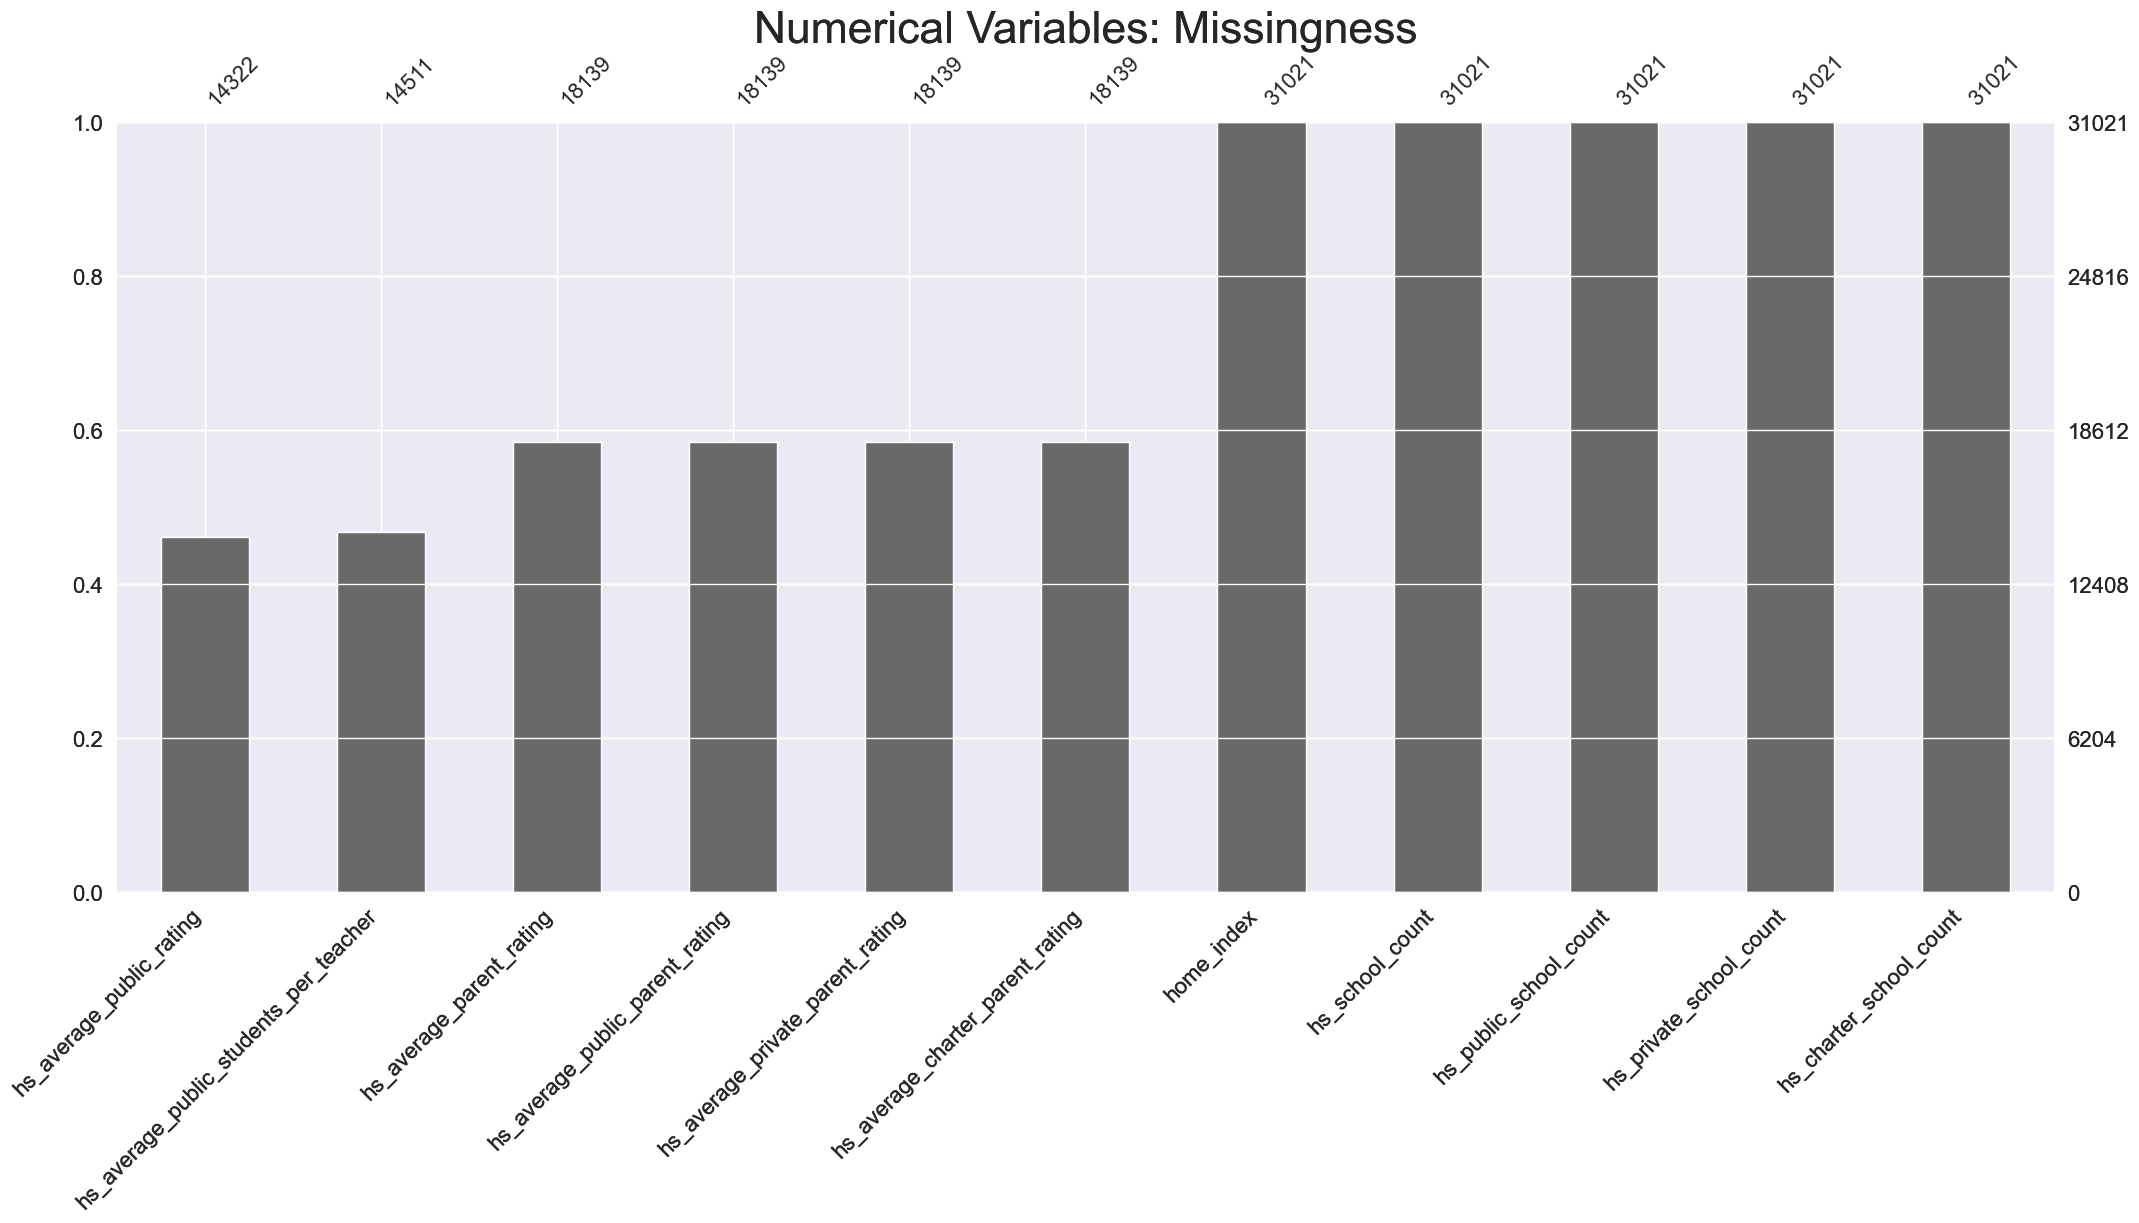

In [135]:
# Missing numerical values

msno.bar(high_school_statistics_df.select_dtypes(include=['int64', 'float64']), sort = 'ascending')
plt.title('Numerical Variables: Missingness', fontsize = 32)
plt.show()

In [137]:
# Imputation of mean for average_public_students_per_teacher, average_public_rating, and average_parent_rating

high_school_statistics_df['hs_average_public_students_per_teacher'] = high_school_statistics_df['hs_average_public_students_per_teacher'].fillna(high_school_statistics_df['hs_average_public_students_per_teacher'].mean())
high_school_statistics_df['hs_average_public_rating'] = high_school_statistics_df['hs_average_public_rating'].fillna(high_school_statistics_df['hs_average_public_rating'].mean())
high_school_statistics_df['hs_average_parent_rating'] = high_school_statistics_df['hs_average_parent_rating'].fillna(high_school_statistics_df['hs_average_parent_rating'].mean())
high_school_statistics_df['hs_average_public_parent_rating'] = high_school_statistics_df['hs_average_public_parent_rating'].fillna(high_school_statistics_df['hs_average_public_parent_rating'].mean())
high_school_statistics_df['hs_average_private_parent_rating'] = high_school_statistics_df['hs_average_private_parent_rating'].fillna(high_school_statistics_df['hs_average_private_parent_rating'].mean())
high_school_statistics_df['hs_average_charter_parent_rating'] = high_school_statistics_df['hs_average_charter_parent_rating'].fillna(high_school_statistics_df['hs_average_charter_parent_rating'].mean())




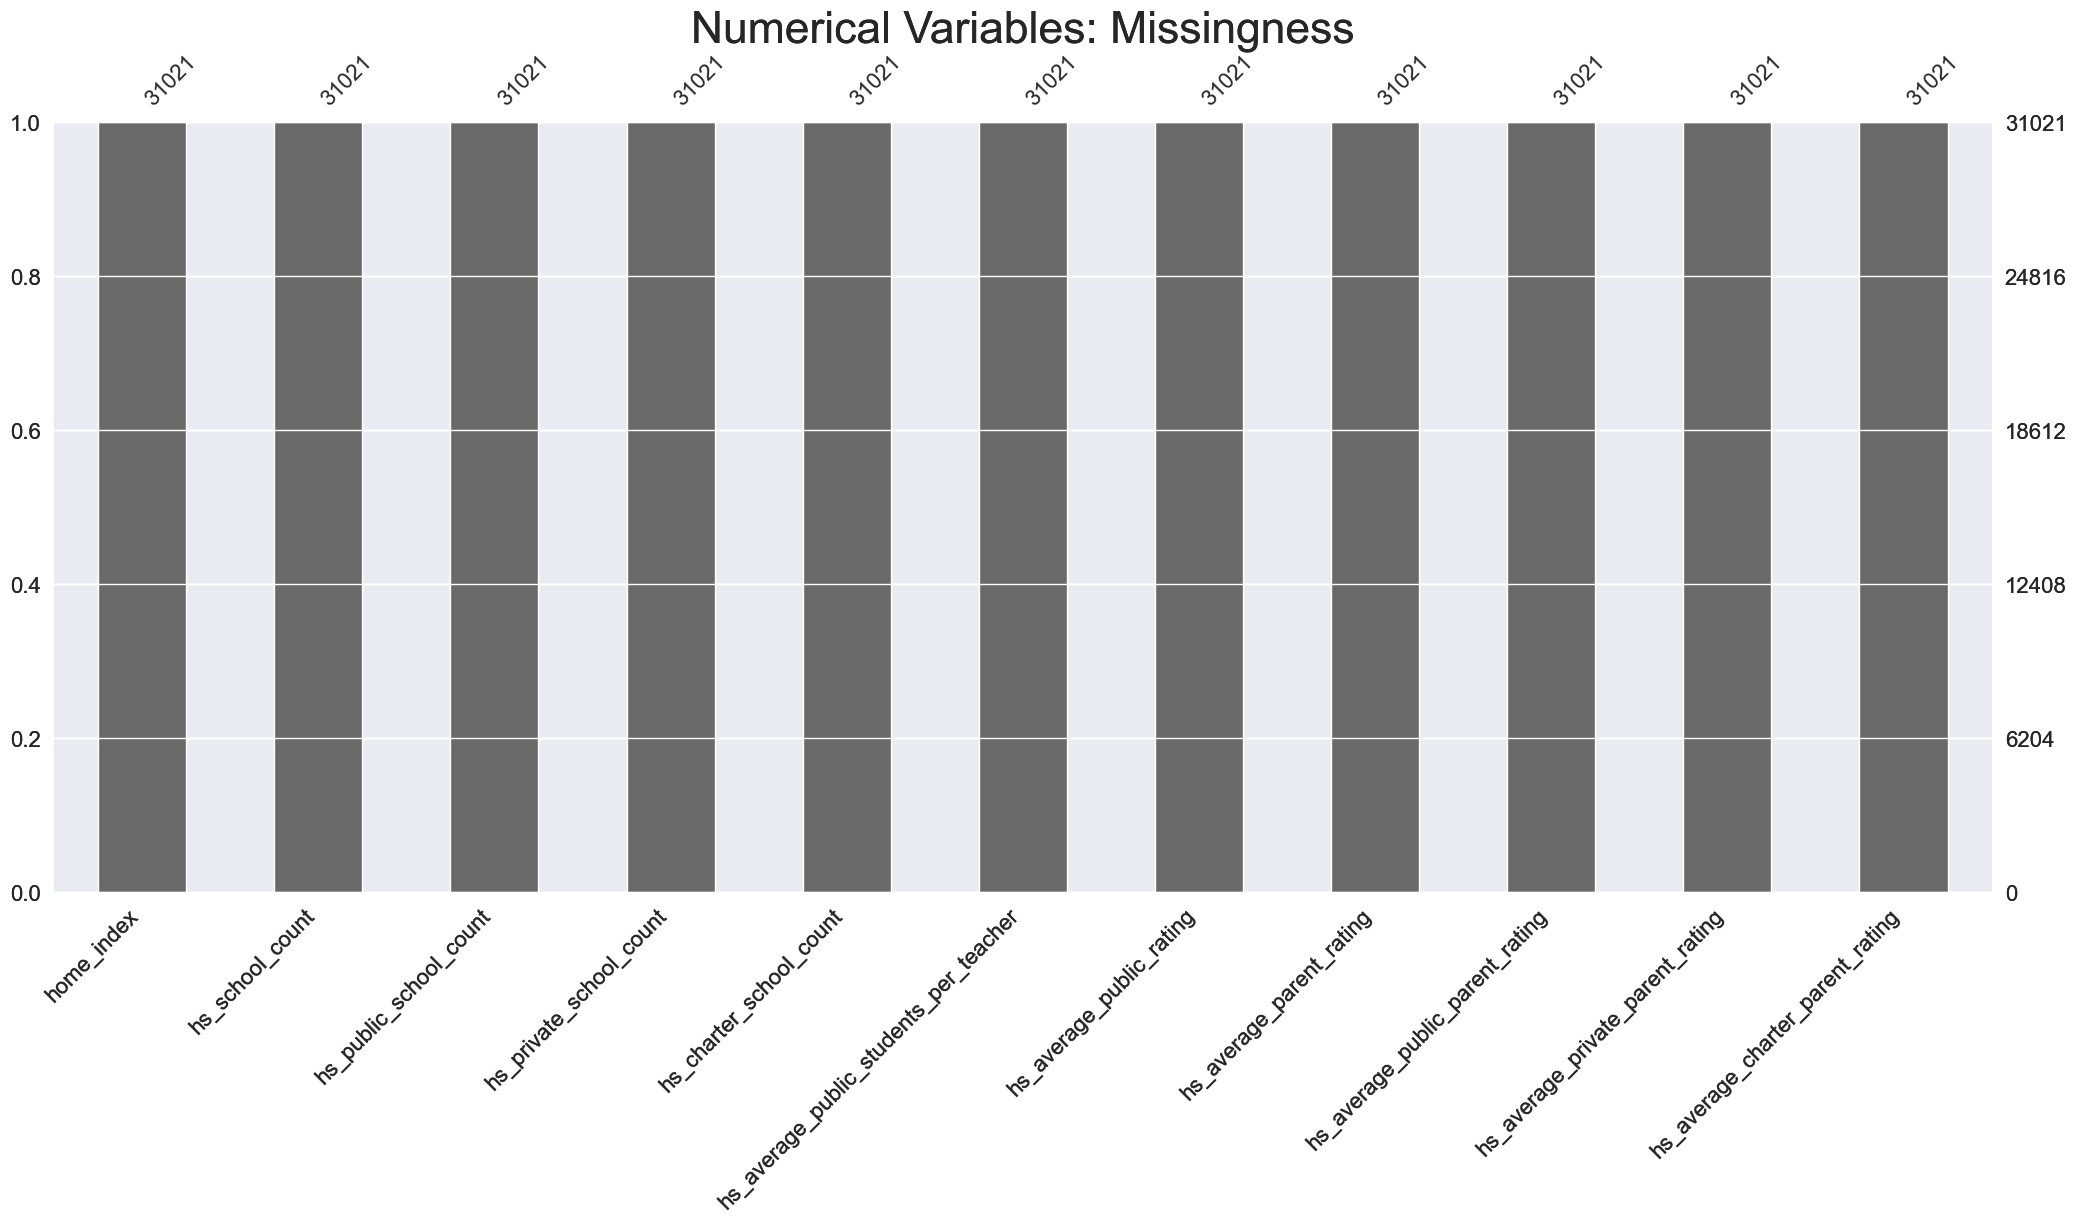

In [141]:
# Missing numerical values

msno.bar(high_school_statistics_df.select_dtypes(include=['int64', 'float64']), sort = 'ascending')
plt.title('Numerical Variables: Missingness', fontsize = 32)
plt.show()


# middle_schools import and summary

In [144]:
middle_schools_df = pd.read_csv('middle_schools.csv')
middle_schools_df = middle_schools_df.drop(columns = 'Unnamed: 0')

middle_schools_df.head()


id  districtID                      districtName  districtCity        lat       long                           name gradeLevels                                   address  rating    ratingScale schoolType  zipcode  studentsPerTeacher  parentRating
0  2753          58  Dougherty County School District        Albany  31.573450 -84.249695  Robert A. Cross Middle Magnet         6-8   324 Lockett Station Road, 31721, Albany    10.0  Above average     public    31721                15.0             3
1   931          69    Fayette County School District  Fayetteville  33.342094 -84.519585     Rising Starr Middle School         6-8     183 Panther Path, 30215, Fayetteville    10.0  Above average     public    30215                15.0             3
2  1012          73     Fulton County School District       Atlanta  34.067436 -84.231171      Webb Bridge Middle School         6-8  4455 Webb Bridge Road, 30005, Alpharetta     9.0  Above average     public    30005                14.0             5
3  1033          73     Fulton County School District       Atlanta  34.052856 -84.209183      Taylor Road Middle School         6-8         5150 Taylor Rd, 30022, Alpharetta     9.0  Above average     public    30022                15.0             3
4  1614         138   Richmond County School District       Augusta  33.473846 -81.975899         Davidson Magnet School        6-12           615 12th Street, 30901, Augusta     9.0  Above average     public    30901                18.0             5

# Find distances between homes and middle schools

In [147]:
# Create empty matrix to capture distances between listings and middle_schools

ms_radius_matrix = np.zeros((len(GA_listings_crime_merged), len(middle_schools_df)))

# Loop though each row of both listings and middle_schools dataframes and 
# capture distance using haversine formula

for i in range(0,GA_listings_crime_merged.shape[0]):
    for j in range(0,middle_schools_df.shape[0]):
        distance = haversine_distance(GA_listings_crime_merged['latitude'][i],
                                      GA_listings_crime_merged['longitude'][i],
                                      middle_schools_df['lat'][j], 
                                      middle_schools_df['long'][j])
        ms_radius_matrix[i, j] = distance

ms_radius_matrix

array([[109.1444125 , 301.71296641, 375.28566206, ..., 402.63119263,
        375.28652638, 278.11771534],
       [109.87719168, 298.74660576, 370.75887993, ..., 397.41297095,
        370.68938347, 274.85083973],
       [261.95160628, 387.74317918, 432.1125184 , ..., 446.37994832,
        431.08852254, 363.58666144],
       ...,
       [343.18785583, 176.41546671, 102.49406149, ...,  71.73795379,
        100.43712497, 185.26793462],
       [342.94390698, 176.32164997, 102.51992258, ...,  71.84332158,
        100.45951044, 185.12710147],
       [345.80921428, 183.97517347, 112.69010972, ...,  83.11585714,
        110.57820629, 191.54358823]])

In [149]:
# Capture middle school statistics within user-defined radius

radius = 4 # Radius of interest
temp_distance_df = pd.DataFrame(ms_radius_matrix) < radius # Boolean dataframe that's True if within radius or False if outside

# Create empty lists to capture stats
school_count = []
public_school_count = []
private_school_count = []
charter_school_count = []
average_public_studentsPerTeacher = []
average_public_rating = []
average_parent_rating = []
average_public_parent_rating = []
average_private_parent_rating = []
average_charter_parent_rating = []


# Loop through each row of the matrix of distances between each listing and middle schoool
for i in range(len(ms_radius_matrix)):
    school_indexes_in_radius = temp_distance_df.loc[i,:][temp_distance_df.loc[i,:]==True].index # getting middle_school_df indexes for middle schools within set radius
    
    # If there are any schools within radius
    if len(school_indexes_in_radius) > 0:
        
        temp_middle_school_df = middle_schools_df.iloc[school_indexes_in_radius, :] # slicing middle_school_df with those indexes
    
        school_count.append((i,len(school_indexes_in_radius))) # school count within radius per house
    
        school_type_count_summary = temp_middle_school_df.groupby('schoolType')['schoolType'].count() # Get counts of schools per type (public, private, charter)
        try:
            public_school_count.append((i,school_type_count_summary['public']))
        except:
            public_school_count.append((i,0))
        try:
            private_school_count.append((i,school_type_count_summary['private']))
        except:
            private_school_count.append((i,0))
        try:
            charter_school_count.append((i,school_type_count_summary['charter']))
        except:
            charter_school_count.append((i,0))
    
        average_public_studentsPerTeacher.append((i,temp_middle_school_df['studentsPerTeacher'].mean())) # Average public schools' students per teacher
    
        average_public_rating.append((i,temp_middle_school_df['rating'].mean())) # Average public school ratings
        
        average_parent_rating.append((i,temp_middle_school_df['parentRating'].mean())) # Average overall parent ratings
        
        school_type_parentRating_summary = temp_middle_school_df.groupby('schoolType')['parentRating'].mean() # Get average parent ratings per school type (public, private, charter)
        try:
            average_public_parent_rating.append((i,school_type_parentRating_summary['public']))
        except:
            average_public_parent_rating.append((i,0))
        try:
            average_private_parent_rating.append((i,school_type_parentRating_summary['private']))
        except:
            average_private_parent_rating.append((i,0))
        try:
            average_charter_parent_rating.append((i,school_type_parentRating_summary['charter']))
        except:
            average_charter_parent_rating.append((i,0))
    
    # If there aren't any schools within radius for that listing, insert 0 into the count stats. 
    # Note: did not insert 0 into non-count stats. Instead, will impute mean downstream of this code
    
    else:
        school_count.append((i,0))
        public_school_count.append((i,0))
        private_school_count.append((i,0))
        charter_school_count.append((i,0))


In [150]:
# Creating dataframes for each list of middle school statistics

school_count_df = pd.DataFrame(data = school_count, columns = ['home_index', 'ms_school_count'])
public_school_count_df = pd.DataFrame(data = public_school_count, columns = ['home_index', 'ms_public_school_count'])
private_school_count_df = pd.DataFrame(data = private_school_count, columns = ['home_index', 'ms_private_school_count'])
charter_school_count_df = pd.DataFrame(data = charter_school_count, columns = ['home_index', 'ms_charter_school_count'])
average_public_studentsPerTeacher_df = pd.DataFrame(data = average_public_studentsPerTeacher, columns = ['home_index', 'ms_average_public_students_per_teacher'])
average_public_rating_df = pd.DataFrame(data = average_public_rating, columns = ['home_index', 'ms_average_public_rating'])
average_parent_rating_df = pd.DataFrame(data = average_parent_rating, columns = ['home_index', 'ms_average_parent_rating'])
average_public_parent_rating_df = pd.DataFrame(data = average_public_parent_rating, columns = ['home_index', 'ms_average_public_parent_rating'])
average_private_parent_rating_df = pd.DataFrame(data = average_private_parent_rating, columns = ['home_index', 'ms_average_private_parent_rating'])
average_charter_parent_rating_df = pd.DataFrame(data = average_charter_parent_rating, columns = ['home_index', 'ms_average_charter_parent_rating'])


In [151]:
# Merging each middle school statistic dataframe on 'home_index'

middle_school_statistics_df = pd.merge(
    left = school_count_df, 
    right = public_school_count_df, 
    on = 'home_index', 
    how = 'left')

middle_school_statistics_df = pd.merge(
    left = middle_school_statistics_df, 
    right = private_school_count_df, 
    on = 'home_index', 
    how = 'left')

middle_school_statistics_df = pd.merge(
    left = middle_school_statistics_df, 
    right = charter_school_count_df, 
    on = 'home_index', 
    how = 'left')

middle_school_statistics_df = pd.merge(
    left = middle_school_statistics_df, 
    right = average_public_studentsPerTeacher_df, 
    on = 'home_index', 
    how = 'left')

middle_school_statistics_df = pd.merge(
    left = middle_school_statistics_df, 
    right = average_public_rating_df, 
    on = 'home_index', 
    how = 'left')

middle_school_statistics_df = pd.merge(
    left = middle_school_statistics_df, 
    right = average_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

middle_school_statistics_df = pd.merge(
    left = middle_school_statistics_df, 
    right = average_public_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

middle_school_statistics_df = pd.merge(
    left = middle_school_statistics_df, 
    right = average_private_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

middle_school_statistics_df = pd.merge(
    left = middle_school_statistics_df, 
    right = average_charter_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

middle_school_statistics_df.head()

home_index  ms_school_count  ms_public_school_count  ms_private_school_count  ms_charter_school_count  ms_average_public_students_per_teacher  ms_average_public_rating  ms_average_parent_rating  ms_average_public_parent_rating  ms_average_private_parent_rating  ms_average_charter_parent_rating
0           0                0                       0                        0                        0                                     NaN                       NaN                       NaN                              NaN                               NaN                               NaN
1           1                2                       2                        0                        0                                    18.5                       2.0                  1.500000                              1.5                               0.0                               0.0
2           2                0                       0                        0                        0                                     NaN                       NaN                       NaN                              NaN                               NaN                               NaN
3           3                3                       1                        2                        0                                    16.0                       6.0                  2.666667                              3.0                               2.5                               0.0
4           4                1                       1                        0                        0                                    16.0                       6.0                  3.000000                              3.0                               0.0                               0.0

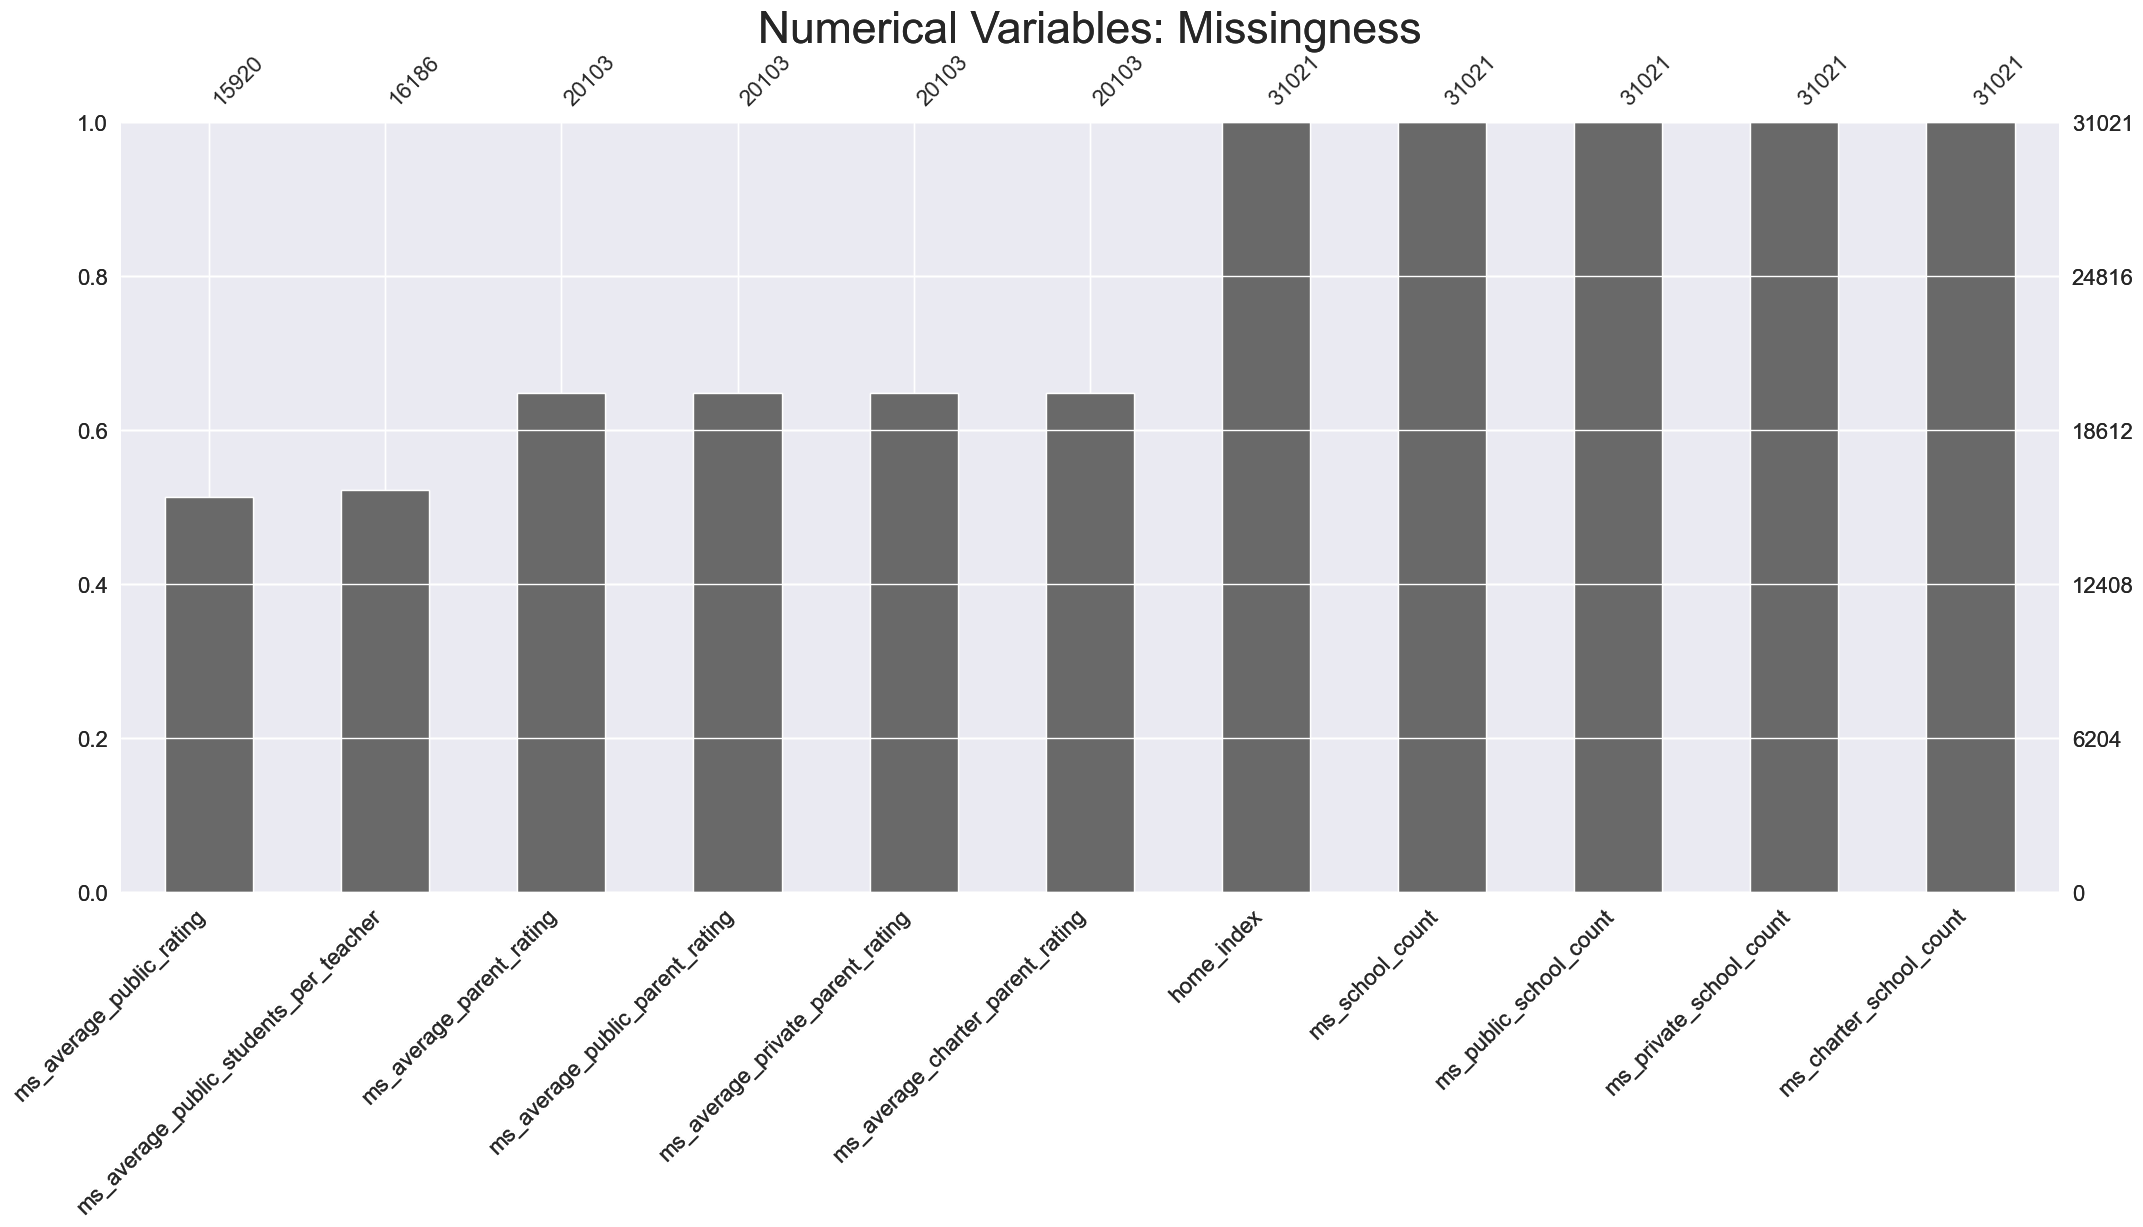

In [157]:
# Missing numerical values

msno.bar(middle_school_statistics_df.select_dtypes(include=['int64', 'float64']), sort = 'ascending')
plt.title('Numerical Variables: Missingness', fontsize = 32)
plt.show()


In [159]:
# Imputation of mean for average_public_students_per_teacher, average_public_rating, and average_parent_rating

middle_school_statistics_df['ms_average_public_students_per_teacher'] = middle_school_statistics_df['ms_average_public_students_per_teacher'].fillna(middle_school_statistics_df['ms_average_public_students_per_teacher'].mean())
middle_school_statistics_df['ms_average_public_rating'] = middle_school_statistics_df['ms_average_public_rating'].fillna(middle_school_statistics_df['ms_average_public_rating'].mean())
middle_school_statistics_df['ms_average_parent_rating'] = middle_school_statistics_df['ms_average_parent_rating'].fillna(middle_school_statistics_df['ms_average_parent_rating'].mean())
middle_school_statistics_df['ms_average_public_parent_rating'] = middle_school_statistics_df['ms_average_public_parent_rating'].fillna(middle_school_statistics_df['ms_average_public_parent_rating'].mean())
middle_school_statistics_df['ms_average_private_parent_rating'] = middle_school_statistics_df['ms_average_private_parent_rating'].fillna(middle_school_statistics_df['ms_average_private_parent_rating'].mean())
middle_school_statistics_df['ms_average_charter_parent_rating'] = middle_school_statistics_df['ms_average_charter_parent_rating'].fillna(middle_school_statistics_df['ms_average_charter_parent_rating'].mean())




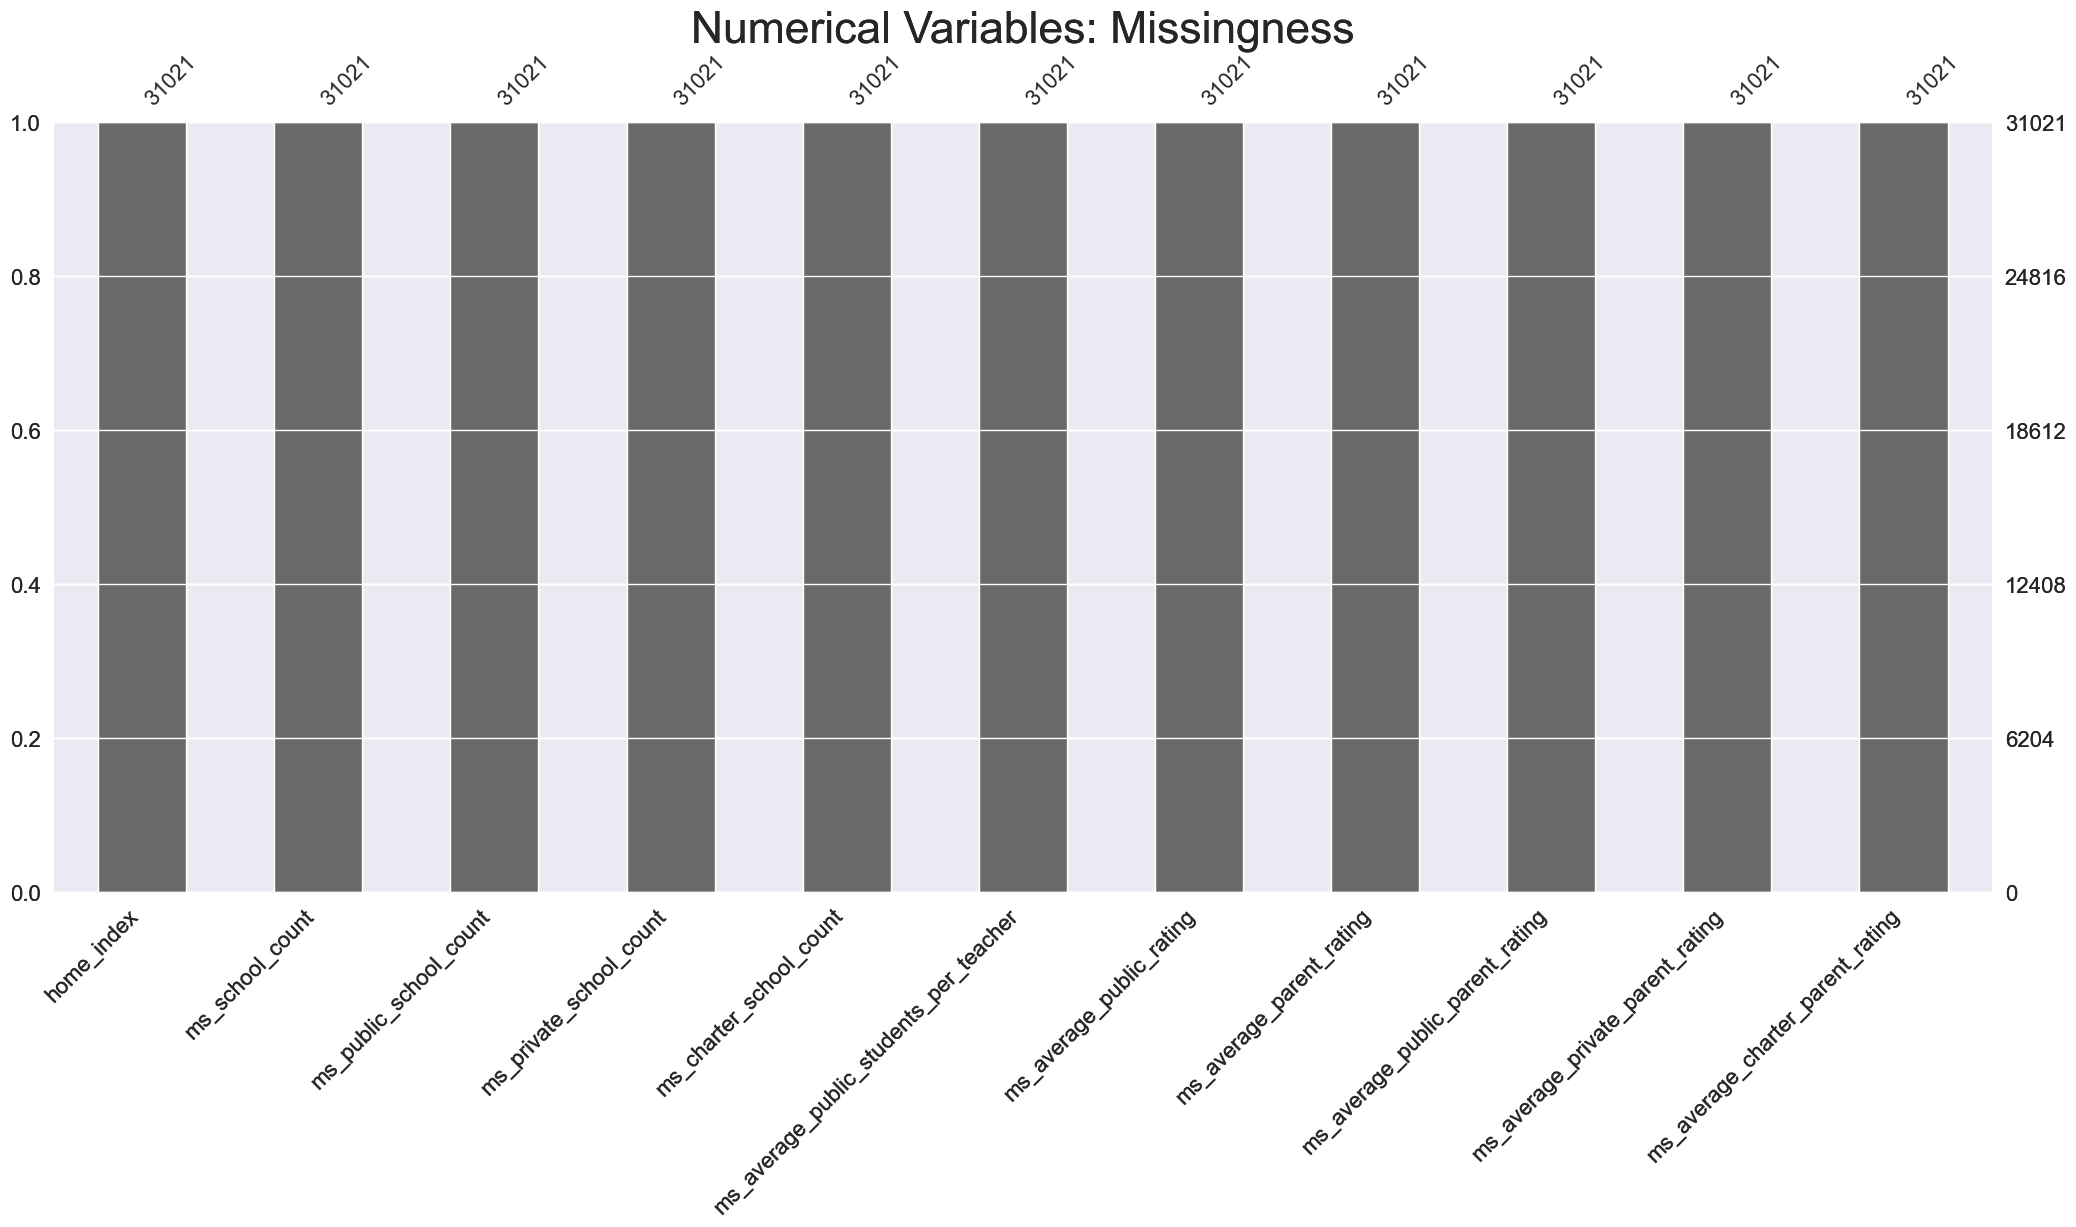

In [163]:
# Missing numerical values

msno.bar(middle_school_statistics_df.select_dtypes(include=['int64', 'float64']), sort = 'ascending')
plt.title('Numerical Variables: Missingness', fontsize = 32)
plt.show()


# elementary_schools import and summary

In [166]:
elementary_schools_df = pd.read_csv('elementary_schools.csv')
elementary_schools_df = elementary_schools_df.drop(columns = 'Unnamed: 0')

elementary_schools_df.head()


id  districtID                     districtName   districtCity        lat       long                             name gradeLevels                                            address  rating    ratingScale schoolType  zipcode  studentsPerTeacher  parentRating
0  1038          73    Fulton County School District        Atlanta  34.071564 -84.363319    Sweet Apple Elementary School        PK-5                   12025 Etris Road, 30075, Roswell    10.0  Above average     public    30075                15.0             4
1  1108          82  Gwinnett County School District  Lawrenceville  34.044102 -83.924065    Fort Daniel Elementary School        PK-5                    1725 Auburn Road, 30019, Dacula    10.0  Above average     public    30019                14.0             5
2  1111          82  Gwinnett County School District  Lawrenceville  33.996933 -83.937210           Dyer Elementary School        PK-5  1707 Hurricane Shoals Road Northeast, 30019, D...    10.0  Above average     public    30019                15.0             3
3  1503         124            Oconee County Schools   Watkinsville  33.914272 -83.506477  Malcom Bridge Elementary School         K-5             2600 Malcom Bridge Road, 30622, Bogart    10.0  Above average     public    30622                16.0             4
4  3690          44  Columbia County School District          Evans  33.573559 -82.107941    River Ridge Elementary School        PK-5                   4109 Mullikin Road, 30809, Evans    10.0  Above average     public    30809                15.0             4

# Find distances between homes and elementary schools

In [169]:
# Create empty matrix to capture distances between listings and elementary_schools

es_radius_matrix = np.zeros((len(GA_listings_crime_merged), len(elementary_schools_df)))

# Loop though each row of both listings and elementary_schools dataframes and 
# capture distance using haversine formula

for i in range(0,GA_listings_crime_merged.shape[0]):
    for j in range(0,elementary_schools_df.shape[0]):
        distance = haversine_distance(GA_listings_crime_merged['latitude'][i],
                                      GA_listings_crime_merged['longitude'][i],
                                      elementary_schools_df['lat'][j], 
                                      elementary_schools_df['long'][j])
        es_radius_matrix[i, j] = distance

es_radius_matrix

array([[377.67283631, 369.75926706, 364.60794623, ..., 409.22609377,
        422.83407047, 406.892267  ],
       [373.51912249, 364.37066026, 359.27023489, ..., 407.18934783,
        420.60901328, 399.72752927],
       [439.61627823, 414.28241115, 410.49664396, ..., 496.86976587,
        507.13341405, 417.60104619],
       ...,
       [112.78467567,  81.64590216,  86.20435281, ..., 178.75240914,
        174.71770201,  21.0380362 ],
       [112.83369073,  81.59077932,  86.13621042, ..., 178.89898817,
        174.89271812,  20.68455587],
       [123.34043428,  90.35484668,  94.60582654, ..., 190.50710664,
        186.70898137,  21.19205783]])

In [170]:
# Capture elementary school statistics within user-defined radius

radius = 4 # Radius of interest
temp_distance_df = pd.DataFrame(es_radius_matrix) < radius # Boolean dataframe that's True if within radius or False if outside

# Create empty lists to capture stats
school_count = []
public_school_count = []
private_school_count = []
charter_school_count = []
average_public_studentsPerTeacher = []
average_public_rating = []
average_parent_rating = []
average_public_parent_rating = []
average_private_parent_rating = []
average_charter_parent_rating = []


# Loop through each row of the matrix of distances between each listing and elementary schoool
for i in range(len(es_radius_matrix)):
    school_indexes_in_radius = temp_distance_df.loc[i,:][temp_distance_df.loc[i,:]==True].index # getting elementary_school_df indexes for elementary schools within set radius
    
    # If there are any schools within radius
    if len(school_indexes_in_radius) > 0:
        
        temp_elementary_school_df = elementary_schools_df.iloc[school_indexes_in_radius, :] # slicing elementary_school_df with those indexes
    
        school_count.append((i,len(school_indexes_in_radius))) # school count within radius per house
    
        school_type_count_summary = temp_elementary_school_df.groupby('schoolType')['schoolType'].count() # Get counts of schools per type (public, private, charter)
        try:
            public_school_count.append((i,school_type_count_summary['public']))
        except:
            public_school_count.append((i,0))
        try:
            private_school_count.append((i,school_type_count_summary['private']))
        except:
            private_school_count.append((i,0))
        try:
            charter_school_count.append((i,school_type_count_summary['charter']))
        except:
            charter_school_count.append((i,0))
    
        average_public_studentsPerTeacher.append((i,temp_elementary_school_df['studentsPerTeacher'].mean())) # Average public schools' students per teacher
    
        average_public_rating.append((i,temp_elementary_school_df['rating'].mean())) # Average public school ratings
        
        average_parent_rating.append((i,temp_elementary_school_df['parentRating'].mean())) # Average overall parent ratings
        
        school_type_parentRating_summary = temp_elementary_school_df.groupby('schoolType')['parentRating'].mean() # Get average parent ratings per school type (public, private, charter)
        try:
            average_public_parent_rating.append((i,school_type_parentRating_summary['public']))
        except:
            average_public_parent_rating.append((i,0))
        try:
            average_private_parent_rating.append((i,school_type_parentRating_summary['private']))
        except:
            average_private_parent_rating.append((i,0))
        try:
            average_charter_parent_rating.append((i,school_type_parentRating_summary['charter']))
        except:
            average_charter_parent_rating.append((i,0))
    
    # If there aren't any schools within radius for that listing, insert 0 into the count stats. 
    # Note: did not insert 0 into non-count stats. Instead, will impute mean downstream of this code
    
    else:
        school_count.append((i,0))
        public_school_count.append((i,0))
        private_school_count.append((i,0))
        charter_school_count.append((i,0))


In [171]:
# Creating dataframes for each list of elementary school statistics

school_count_df = pd.DataFrame(data = school_count, columns = ['home_index', 'es_school_count'])
public_school_count_df = pd.DataFrame(data = public_school_count, columns = ['home_index', 'es_public_school_count'])
private_school_count_df = pd.DataFrame(data = private_school_count, columns = ['home_index', 'es_private_school_count'])
charter_school_count_df = pd.DataFrame(data = charter_school_count, columns = ['home_index', 'es_harter_school_count'])
average_public_studentsPerTeacher_df = pd.DataFrame(data = average_public_studentsPerTeacher, columns = ['home_index', 'es_average_public_students_per_teacher'])
average_public_rating_df = pd.DataFrame(data = average_public_rating, columns = ['home_index', 'es_average_public_rating'])
average_parent_rating_df = pd.DataFrame(data = average_parent_rating, columns = ['home_index', 'es_average_parent_rating'])
average_public_parent_rating_df = pd.DataFrame(data = average_public_parent_rating, columns = ['home_index', 'es_average_public_parent_rating'])
average_private_parent_rating_df = pd.DataFrame(data = average_private_parent_rating, columns = ['home_index', 'es_average_private_parent_rating'])
average_charter_parent_rating_df = pd.DataFrame(data = average_charter_parent_rating, columns = ['home_index', 'es_average_charter_parent_rating'])


In [172]:
# Merging each elementary school statistic dataframe on 'home_index'

elementary_school_statistics_df = pd.merge(
    left = school_count_df, 
    right = public_school_count_df, 
    on = 'home_index', 
    how = 'left')

elementary_school_statistics_df = pd.merge(
    left = elementary_school_statistics_df, 
    right = private_school_count_df, 
    on = 'home_index', 
    how = 'left')

elementary_school_statistics_df = pd.merge(
    left = elementary_school_statistics_df, 
    right = charter_school_count_df, 
    on = 'home_index', 
    how = 'left')

elementary_school_statistics_df = pd.merge(
    left = elementary_school_statistics_df, 
    right = average_public_studentsPerTeacher_df, 
    on = 'home_index', 
    how = 'left')

elementary_school_statistics_df = pd.merge(
    left = elementary_school_statistics_df, 
    right = average_public_rating_df, 
    on = 'home_index', 
    how = 'left')

elementary_school_statistics_df = pd.merge(
    left = elementary_school_statistics_df, 
    right = average_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

elementary_school_statistics_df = pd.merge(
    left = elementary_school_statistics_df, 
    right = average_public_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

elementary_school_statistics_df = pd.merge(
    left = elementary_school_statistics_df, 
    right = average_private_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

elementary_school_statistics_df = pd.merge(
    left = elementary_school_statistics_df, 
    right = average_charter_parent_rating_df, 
    on = 'home_index', 
    how = 'left')

elementary_school_statistics_df.head()

home_index  es_school_count  es_public_school_count  es_private_school_count  es_harter_school_count  es_average_public_students_per_teacher  es_average_public_rating  es_average_parent_rating  es_average_public_parent_rating  es_average_private_parent_rating  es_average_charter_parent_rating
0           0                0                       0                        0                       0                                     NaN                       NaN                       NaN                              NaN                               NaN                               NaN
1           1                3                       1                        2                       0                               14.000000                  1.000000                       3.0                              4.0                               2.5                               0.0
2           2                0                       0                        0                       0                                     NaN                       NaN                       NaN                              NaN                               NaN                               NaN
3           3                6                       3                        3                       0                               16.666667                  7.333333                       3.0                              4.0                               2.0                               0.0
4           4                2                       2                        0                       0                               16.500000                  7.500000                       4.0                              4.0                               0.0                               0.0

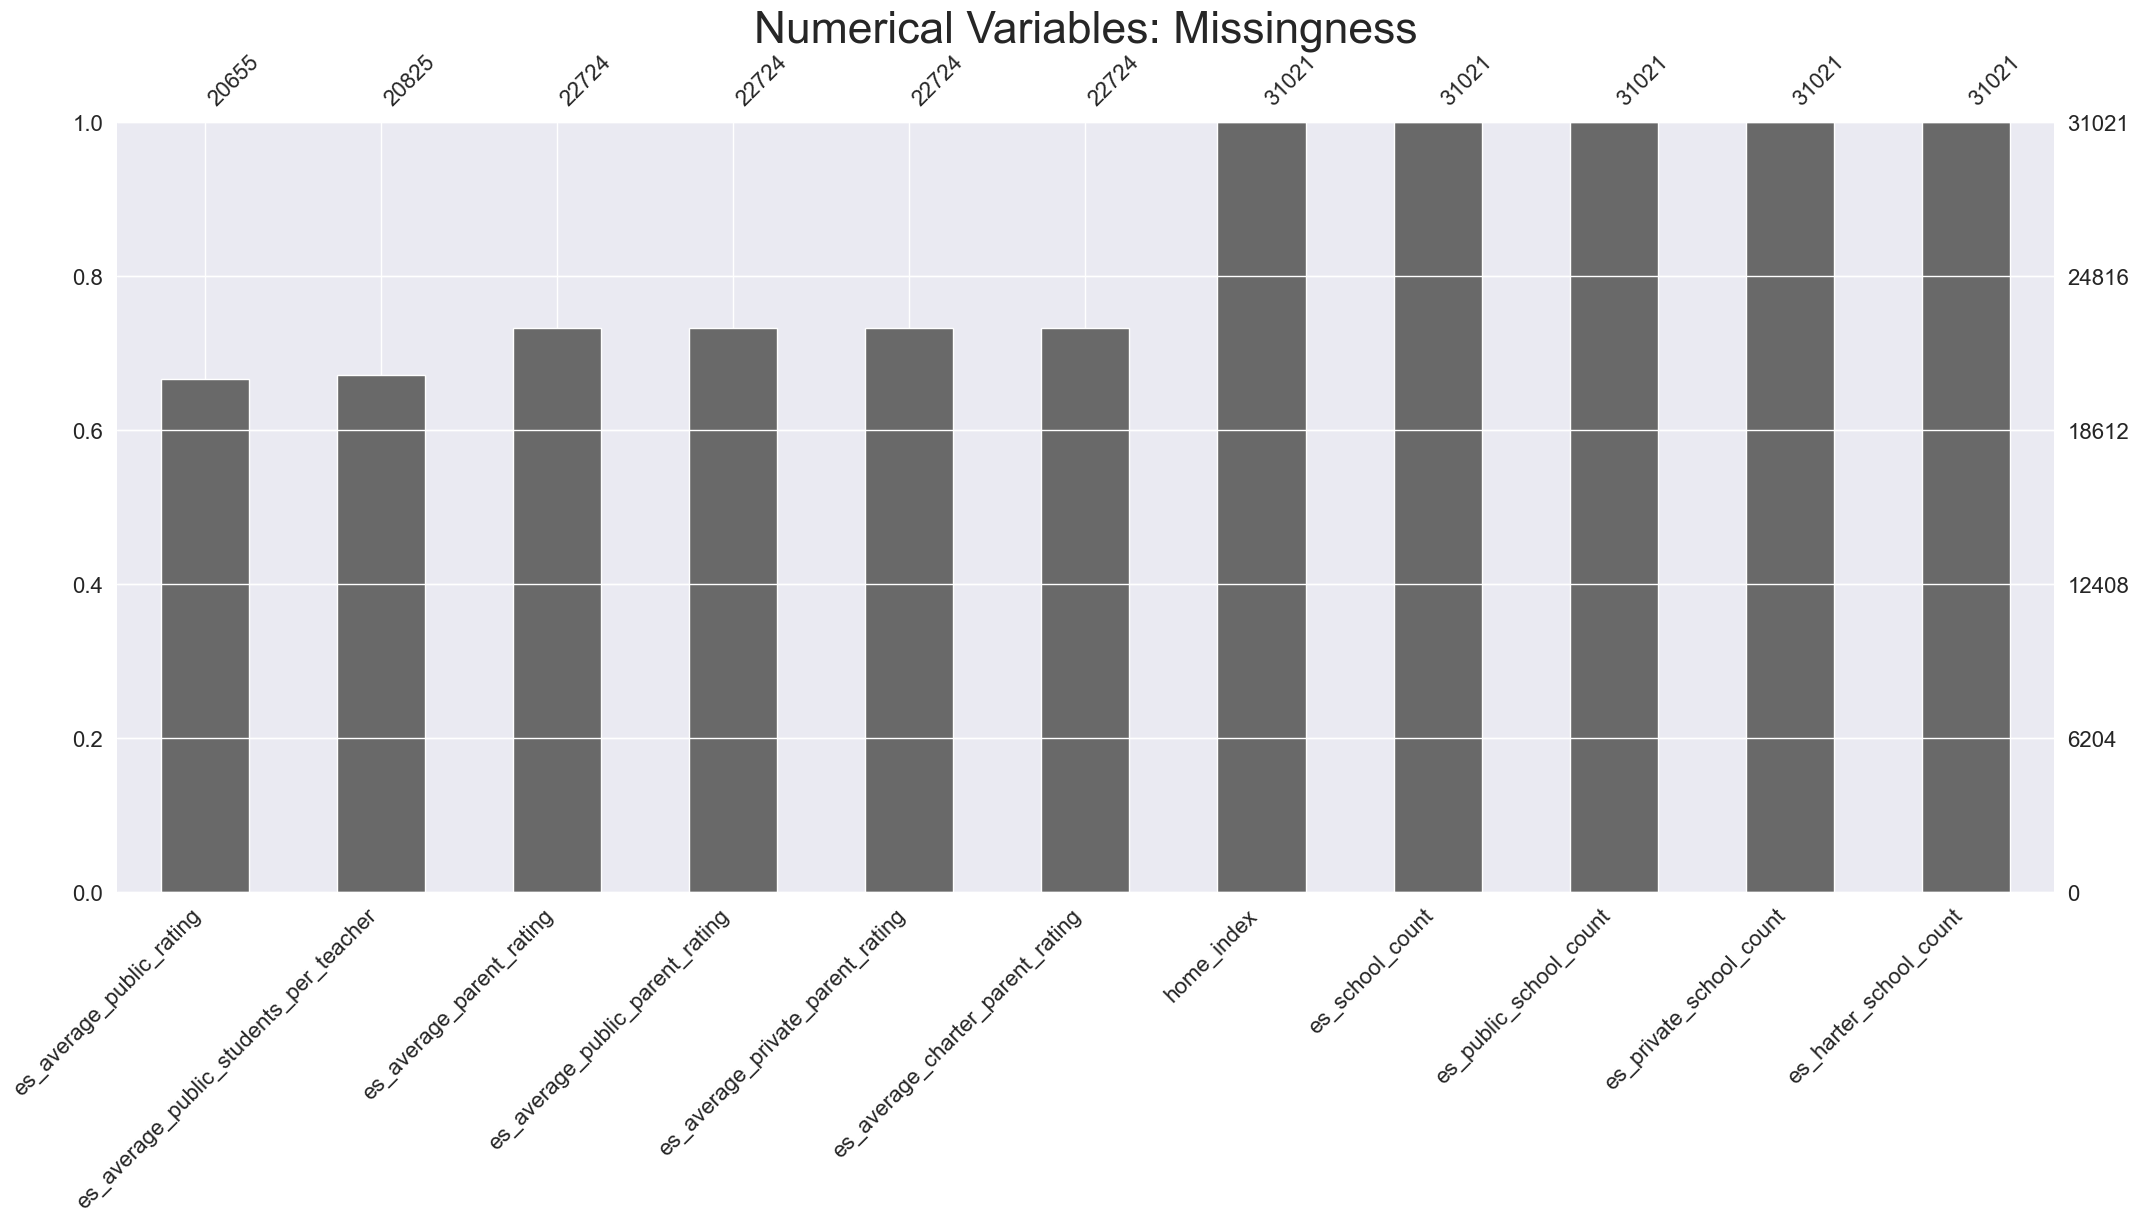

In [173]:
# Missing numerical values

msno.bar(elementary_school_statistics_df.select_dtypes(include=['int64', 'float64']), sort = 'ascending')
plt.title('Numerical Variables: Missingness', fontsize = 32)
plt.show()


In [174]:
# Imputation of mean for average_public_students_per_teacher, average_public_rating, and average_parent_rating

elementary_school_statistics_df['es_average_public_students_per_teacher'] = elementary_school_statistics_df['es_average_public_students_per_teacher'].fillna(elementary_school_statistics_df['es_average_public_students_per_teacher'].mean())
elementary_school_statistics_df['es_average_public_rating'] = elementary_school_statistics_df['es_average_public_rating'].fillna(elementary_school_statistics_df['es_average_public_rating'].mean())
elementary_school_statistics_df['es_average_parent_rating'] = elementary_school_statistics_df['es_average_parent_rating'].fillna(elementary_school_statistics_df['es_average_parent_rating'].mean())
elementary_school_statistics_df['es_average_public_parent_rating'] = elementary_school_statistics_df['es_average_public_parent_rating'].fillna(elementary_school_statistics_df['es_average_public_parent_rating'].mean())
elementary_school_statistics_df['es_average_private_parent_rating'] = elementary_school_statistics_df['es_average_private_parent_rating'].fillna(elementary_school_statistics_df['es_average_private_parent_rating'].mean())
elementary_school_statistics_df['es_average_charter_parent_rating'] = elementary_school_statistics_df['es_average_charter_parent_rating'].fillna(elementary_school_statistics_df['es_average_charter_parent_rating'].mean())




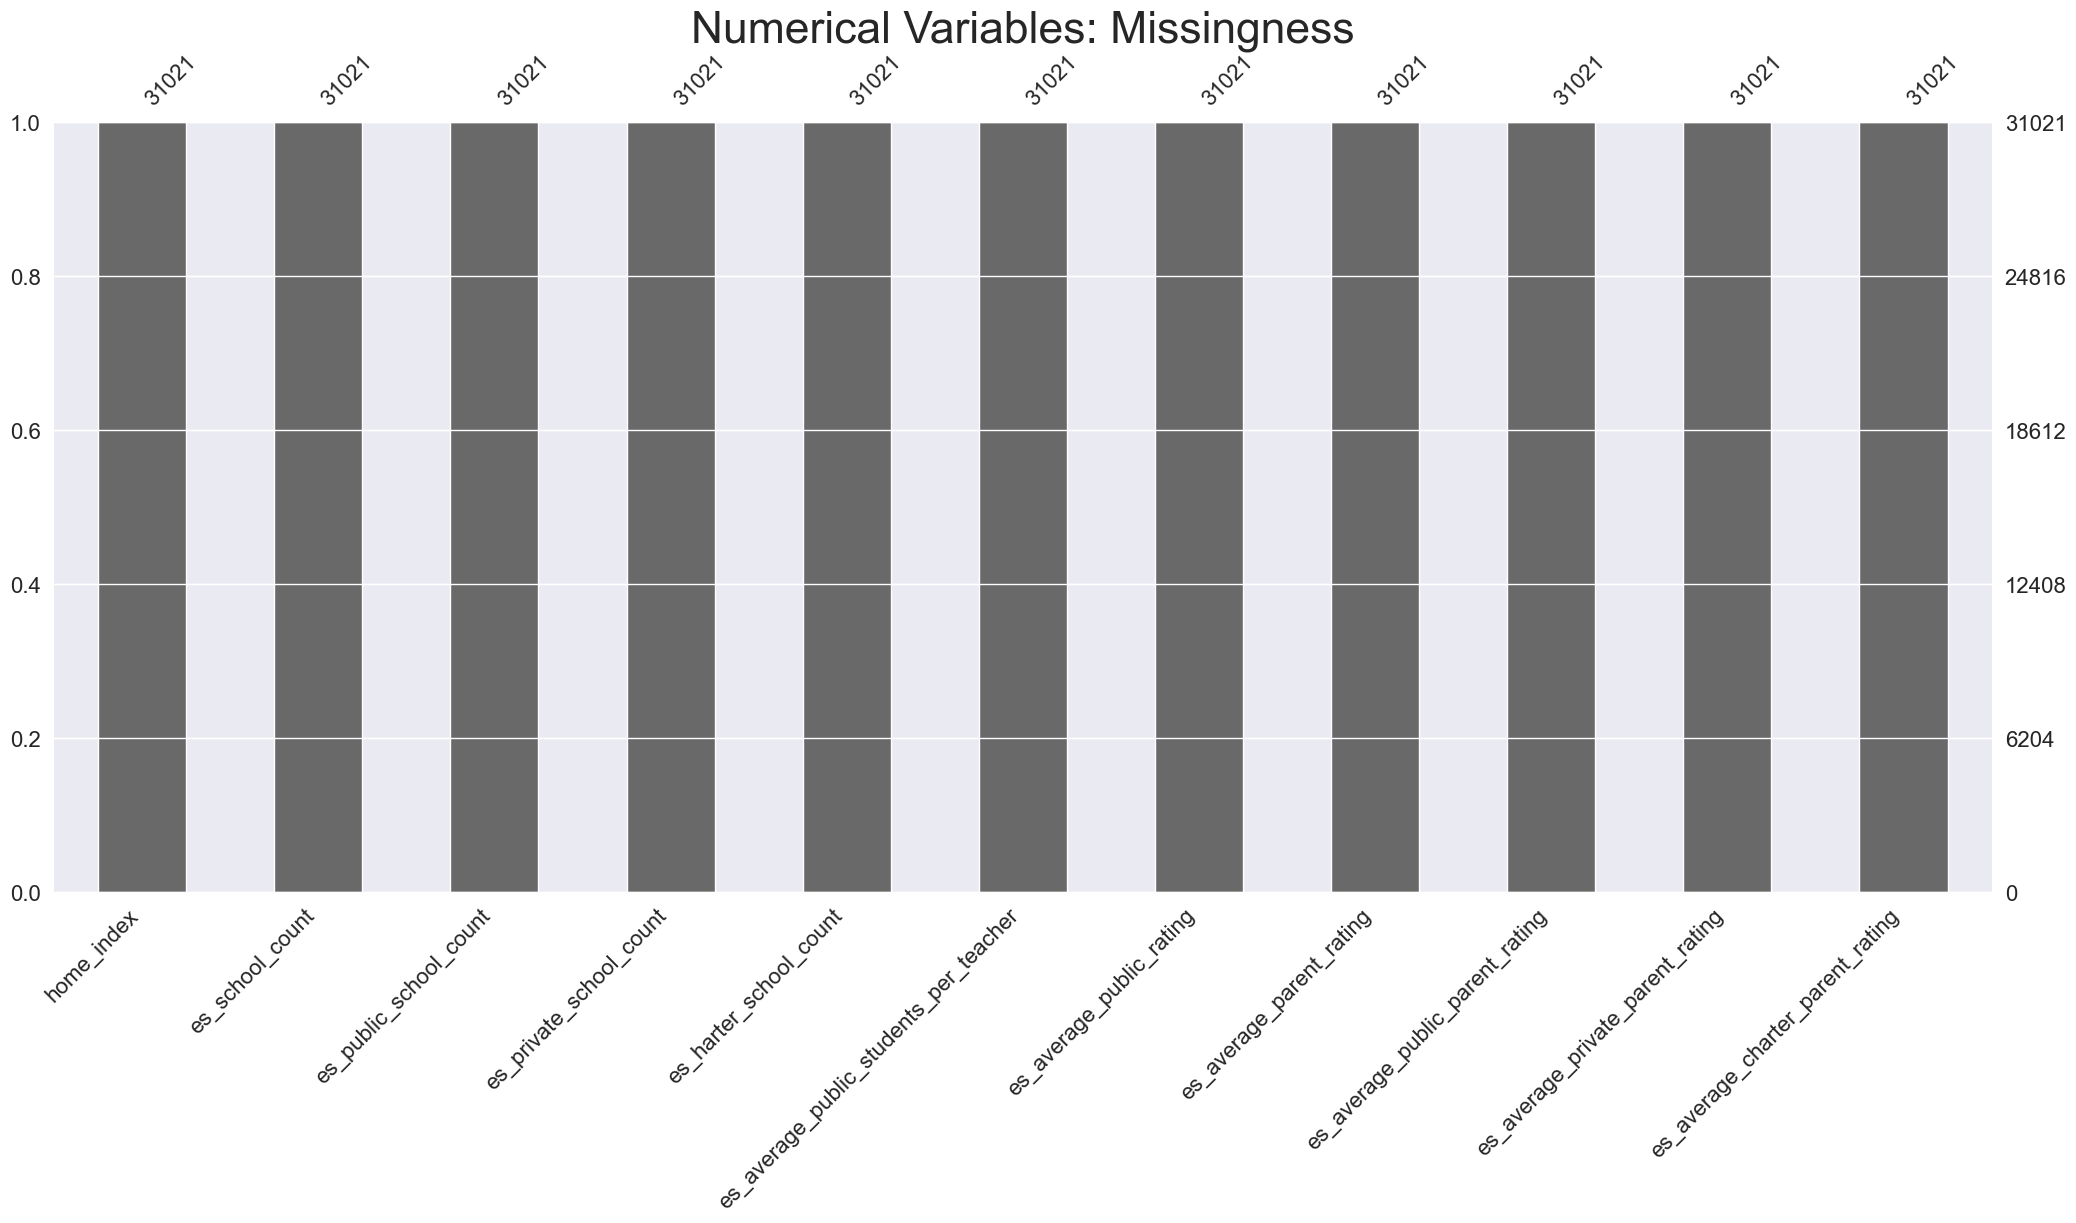

In [175]:
# Missing numerical values

msno.bar(elementary_school_statistics_df.select_dtypes(include=['int64', 'float64']), sort = 'ascending')
plt.title('Numerical Variables: Missingness', fontsize = 32)
plt.show()


# Join school statistics to main dataframe

In [184]:
GA_listings_crime_schools_merged = pd.merge(left = GA_listings_crime_merged.reset_index(names = 'home_index'),
         right = high_school_statistics_df,
         how = 'left',
         on = 'home_index'
        )
GA_listings_crime_schools_merged = pd.merge(left = GA_listings_crime_schools_merged,
         right = middle_school_statistics_df,
         how = 'left',
         on = 'home_index'
        )
GA_listings_crime_schools_merged = pd.merge(left = GA_listings_crime_schools_merged,
         right = elementary_school_statistics_df,
         how = 'left',
         on = 'home_index'
        )

GA_listings_crime_schools_merged.head()

home_index   latitude  longitude       full_street_address       city    county_name  beds  baths_full  baths_half  square_footage  lot_size  year_built                                  details  special_features  unit_count   price  transaction_type  listing_status  listing_special_features census_state_name census_county_name    zip property_type census_state_abbr  census_zcta5_geoid  census_cbsa_geoid_count overall_crime_grade violent_crime_grade  violent_crime_total_rate  violent_crime_assault_rate  violent_crime_robbery_rate  violent_crime_rape_rate  violent_crime_murder_rate property_crime_grade  property_crime_total_rate  property_crime_theft_rate  property_crime_vehicle_theft_rate  property_crime_burglary_rate  property_crime_arson_rate other_crime_grade  other_crime_total_rate  other_crime_kidnapping_rate  other_crime_drug_crimes_rate  other_crime_vandalism_rate  other_crime_identity_theft_rate  other_crime_animal_cruelty_rate  hs_school_count  hs_public_school_count  \
0           0  30.725605 -83.671772  0 Johnson Road #10026497    Quitman  Brooks-County   0.0         0.0         0.0             0.0      4.93         0.0                    Lots/Land, 4.93 Acres                 0         0.0   51900                 1               0                         0           Georgia         Brooks, GA  31643     Lots/Land                GA             31643.0                      1.0                  D-                   D                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   D-                      38.96                     28.720                              1.422                         8.751                     0.0656                D+                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                0                       0   
1           1  30.781796 -83.558475          505 S Lee Street    Quitman  Brooks-County   3.0         1.0         0.0          1460.0      0.00      1910.0    Detached, 3 Beds, 1 Bath, 1,460 Sq Ft                 0         1.0   99000                 1               1                         0           Georgia         Brooks, GA  31643      Detached                GA             31643.0                      1.0                  D-                   D                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   D-                      38.96                     28.720                              1.422                         8.751                     0.0656                D+                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                2                       2   
2           2  30.864096 -81.622765      33 River Oaks Street   Woodbine  Camden-County   3.0         2.0         0.0          1254.0      0.00      1985.0   Detached, 3 Beds, 2 Baths, 1,254 Sq Ft                 0         1.0  245816                 1               1                         0           Georgia         Camden, GA  31569      Detached                GA             31569.0                      1.0                  D+                  C+                     2.600                       1.778                      0.5553                   0.2425                     0.0247                   D-                      32.39                     26.210                              1.025                         5.105                     0.0454                B+                   5.921                       0.0802                        1.9190                       2.944                           0.9281                           0.0502                0                       0   
3           3  30.7

# Data Export

In [187]:
import os

current_directory = os.getcwd()

dataframes = {'GA_listings_crime_schools_merged': GA_listings_crime_schools_merged}


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    # Save the dataframe to a CSV file
    df.to_csv(file_path, sep='\t', index=False)

# Data Import

In [190]:
import os

current_directory = os.getcwd()

dataframes = ['GA_listings_crime_schools_merged.csv']

loaded_dataframes = {}

for file_name in dataframes:
    
    df_name = file_name.split('.csv')[0]
    file_path = os.path.join(current_directory, file_name)
    loaded_dataframes[df_name] = pd.read_csv(file_path, sep='\t')



In [192]:
GA_listings_crime_schools_merged = loaded_dataframes['GA_listings_crime_schools_merged']


In [194]:
# Converting zip code to object dtype

GA_listings_crime_schools_merged = GA_listings_crime_schools_merged.astype({'zip': 'object'})

# Outlier Inspection


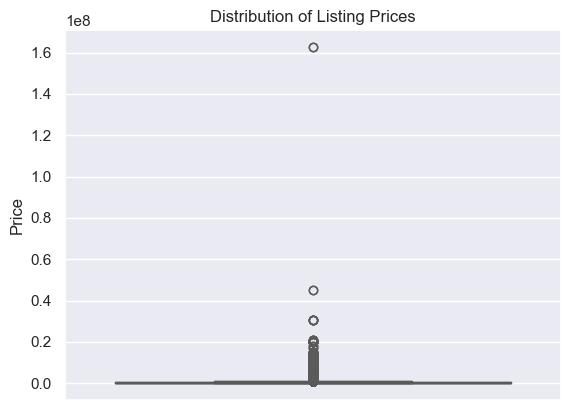

In [199]:
sns.boxplot(data = GA_listings_crime_schools_merged, y = 'price')
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


In [201]:
# Removing extremely high data points due to sparcity

GA_listings_crime_schools_merged = GA_listings_crime_schools_merged[GA_listings_crime_schools_merged['price'] < 30000000]

GA_listings_crime_schools_merged.shape

(31016, 76)

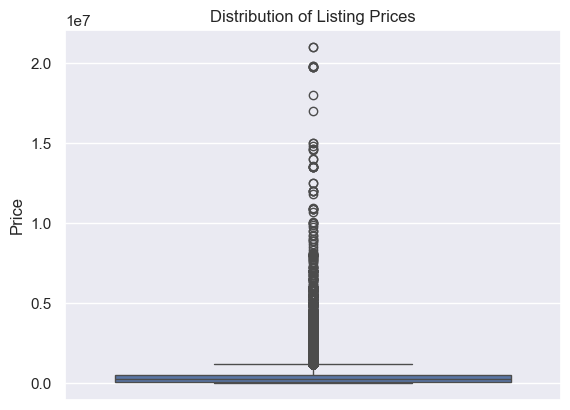

In [203]:
sns.boxplot(data = GA_listings_crime_schools_merged, y = 'price')
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


In [205]:
# Calculate quantiles and maximum/minimum values

q1 = np.percentile(GA_listings_crime_schools_merged['price'], 25)
q3 = np.percentile(GA_listings_crime_schools_merged['price'], 75)
IQR = q3 - q1

outlier_maximum_level = q3 + 1.5*IQR
outlier_minimum_level = q1 - 1.5*IQR

print("Maximum level: " + str(outlier_maximum_level))
print("Minimum level: " + str(outlier_minimum_level))



Maximum level: 1170000.0
Minimum level: -558000.0


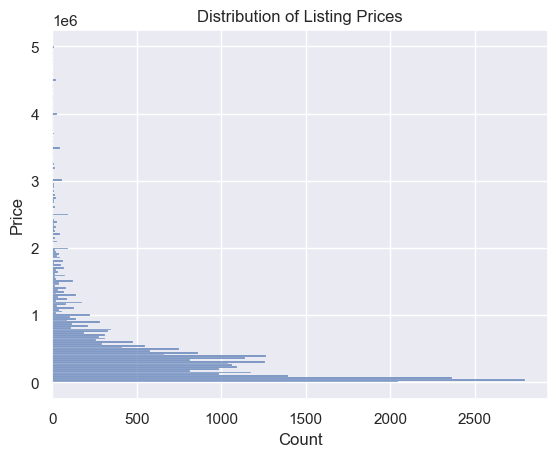

In [207]:
sns.histplot(data = GA_listings_crime_schools_merged.loc[GA_listings_crime_schools_merged['price'] < 5000000, :], y = 'price', log_scale = False)
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


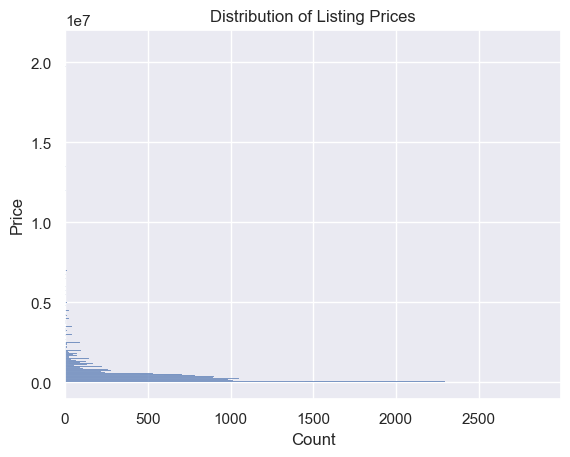

In [209]:
sns.histplot(data = GA_listings_crime_schools_merged, y = 'price', log_scale = False)
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


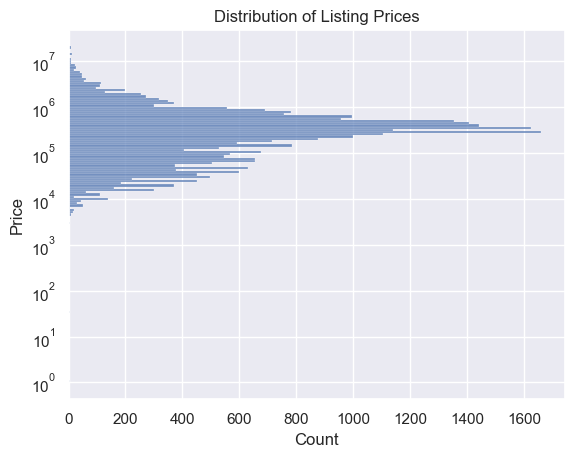

In [211]:
sns.histplot(data = GA_listings_crime_schools_merged, y = 'price', log_scale = True)
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


In [213]:
# Removing extremely low log data points due to sparcity

GA_listings_crime_schools_merged = GA_listings_crime_schools_merged[np.log(GA_listings_crime_schools_merged['price']) > 5]

GA_listings_crime_schools_merged.shape

(31005, 76)

# Feature Reduction

In [216]:
GA_listings_crime_schools_merged_reduced = GA_listings_crime_schools_merged.drop(columns = ['home_index', 'full_street_address','details','census_state_name','census_county_name','census_state_abbr','census_zcta5_geoid','census_cbsa_geoid_count'])

GA_listings_crime_schools_merged_reduced.shape

(31005, 68)

# Multicolinearity


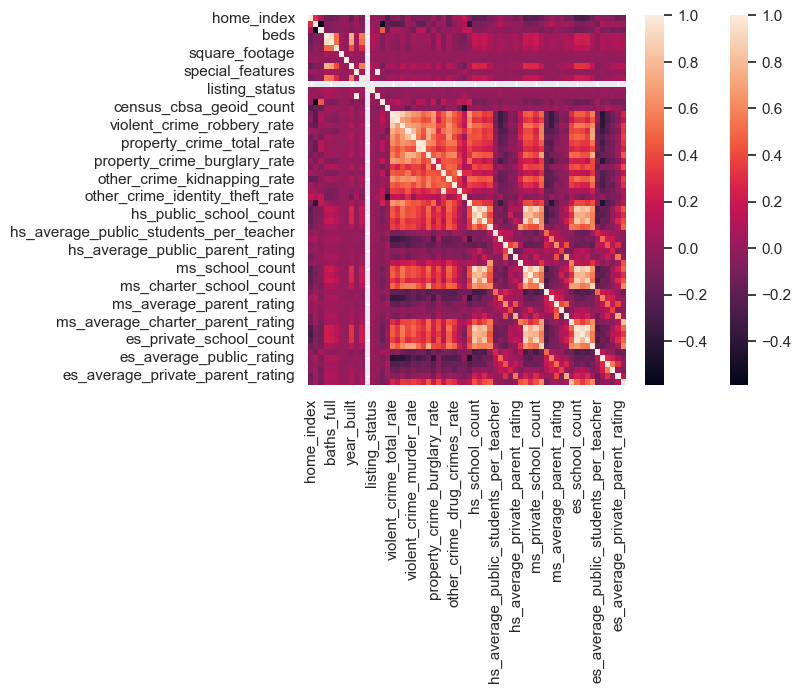

In [221]:
numerical_cols = []

for col in GA_listings_crime_schools_merged.drop(columns= 'price').columns:
    if str(GA_listings_crime_schools_merged[col].dtype) == 'float64' or str(GA_listings_crime_schools_merged[col].dtype) == 'int64':
        numerical_cols.append(col)


sns.heatmap(GA_listings_crime_schools_merged[numerical_cols].corr())
plt.show()


In [225]:
correlations = []
corr_threshold = 0.70

for i, col_x in enumerate(GA_listings_crime_schools_merged[numerical_cols].columns):
    for col_y in GA_listings_crime_schools_merged[numerical_cols].columns[i+1:]:
        correlation = GA_listings_crime_schools_merged[numerical_cols][col_x].corr(GA_listings_crime_schools_merged[numerical_cols][col_y])
        if abs(correlation) >= corr_threshold:
            correlations.append((col_x, col_y, correlation))
        
correlations

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarn

[('beds', 'baths_full', 0.9208983572539197),
 ('beds', 'year_built', 0.7580545956481678),
 ('baths_full', 'year_built', 0.7010280057504575),
 ('special_features', 'listing_special_features', 1.0),
 ('violent_crime_total_rate',
  'violent_crime_assault_rate',
  0.9515768597384262),
 ('violent_crime_total_rate',
  'violent_crime_robbery_rate',
  0.8819571079896411),
 ('violent_crime_total_rate', 'violent_crime_rape_rate', 0.7492699431037348),
 ('violent_crime_robbery_rate', 'violent_crime_rape_rate', 0.7055037947640208),
 ('violent_crime_rape_rate', 'violent_crime_murder_rate', 0.8253099160505778),
 ('violent_crime_rape_rate',
  'property_crime_vehicle_theft_rate',
  0.7680102101969881),
 ('violent_crime_murder_rate',
  'property_crime_vehicle_theft_rate',
  0.7508639615766471),
 ('violent_crime_murder_rate', 'es_harter_school_count', 0.7259794903223429),
 ('property_crime_total_rate',
  'property_crime_theft_rate',
  0.9605499963983015),
 ('property_crime_vehicle_theft_rate',
  'es_hart

# Exploratory Data Analysis


Skewness: 8.587
Kurtosis: 124.065


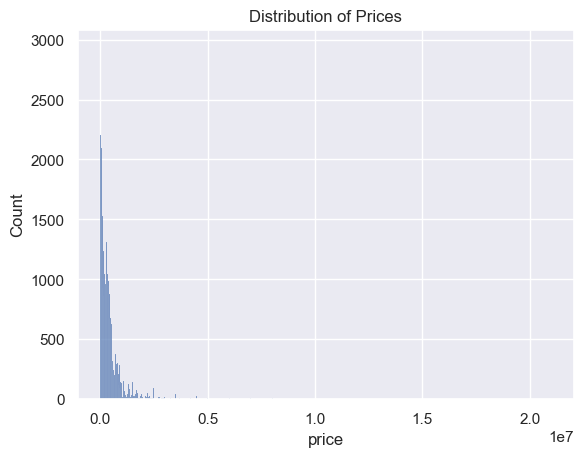

In [228]:

sns.histplot(data = GA_listings_crime_schools_merged, x = 'price')
plt.title('Distribution of Prices')

print('Skewness: ' + str(round(scipy.stats.skew(GA_listings_crime_schools_merged['price'], axis=0, bias=True),3)))
print('Kurtosis: ' + str(round(scipy.stats.kurtosis(GA_listings_crime_schools_merged['price'], axis=0, fisher=True, bias=True),3)))

# Skewness > 0 signifies more weight on the left tail of the distribution, so it is positively skewed.
# Kurtosis > 0 signifies it's a leptokurtic distribution, meaning there's a greater chance of extreme 
# positive or negative values

plt.show()

Skewness: -0.281
Kurtosis: -0.073


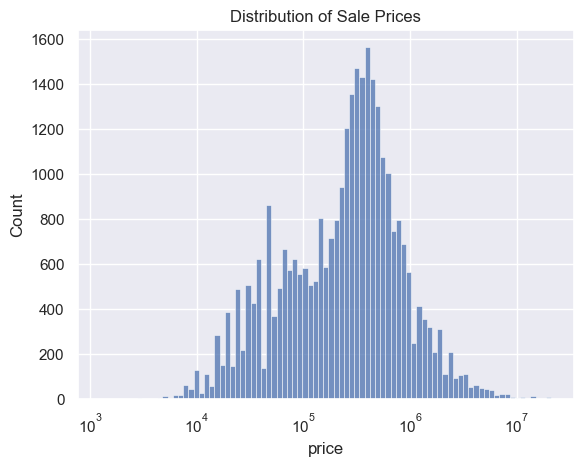

In [230]:

sns.histplot(data = GA_listings_crime_schools_merged, x = 'price', log_scale = True)
plt.title('Distribution of Sale Prices')

print('Skewness: ' + str(round(scipy.stats.skew(np.log10(GA_listings_crime_schools_merged['price']), axis=0, bias=True),3)))
print('Kurtosis: ' + str(round(scipy.stats.kurtosis(np.log10(GA_listings_crime_schools_merged['price']), axis=0, fisher=True, bias=True),3)))

# Skewness > 0 signifies more weight on the left tail of the distribution, so it is positively skewed.
# Kurtosis > 0 signifies it's a leptokurtic distribution, meaning there's a greater chance of extreme 
# positive or negative values
# Overall, both metrics were significantly reduce by getting the log of price

plt.show()


In [232]:
# Cycle through each column, fit an OLS model, and save the R2 value

import statsmodels.api as sm

rsquared_list = []
pvalue_list = []

for col in GA_listings_crime_schools_merged_reduced.drop(columns = ['price']).columns:
    temp_df = GA_listings_crime_schools_merged_reduced[[col]]
    if str(GA_listings_crime_schools_merged_reduced[col].dtype) == 'object':
        temp_df = pd.get_dummies(temp_df, columns=[col], drop_first=True)
        temp_df = temp_df.replace({False: 0, True: 1})
        
    temp_df = sm.add_constant(temp_df)
    model = sm.OLS(GA_listings_crime_schools_merged_reduced['price'], temp_df).fit()
    rsquared_list.append((col, model.rsquared))  
    pvalue_list.append((col, model.f_pvalue))
    
sorted_rsquared_list = sorted(rsquared_list, key=lambda x: x[1],reverse= True)
sorted_pvalue_list = sorted(pvalue_list, key=lambda x: x[1],reverse= False)

# Create column list for top x% of R2 values

top_percent = 0.25
top_rsquared_list = []

for i in list(range(round(top_percent * len(sorted_rsquared_list)))):
    top_rsquared_list.append(sorted_rsquared_list[i][0])

top_rsquared_list

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/4193218100.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df = temp_df.replace({False: 0, True: 1})
/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/4193218100.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df = temp_df.replace({False: 0, True: 1})
/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/4193218100.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

['zip',
 'city',
 'baths_full',
 'county_name',
 'baths_half',
 'property_type',
 'beds',
 'year_built',
 'other_crime_grade',
 'overall_crime_grade',
 'violent_crime_grade',
 'hs_private_school_count',
 'es_private_school_count',
 'ms_private_school_count',
 'hs_average_public_rating',
 'hs_school_count',
 'ms_school_count']

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3973353601.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


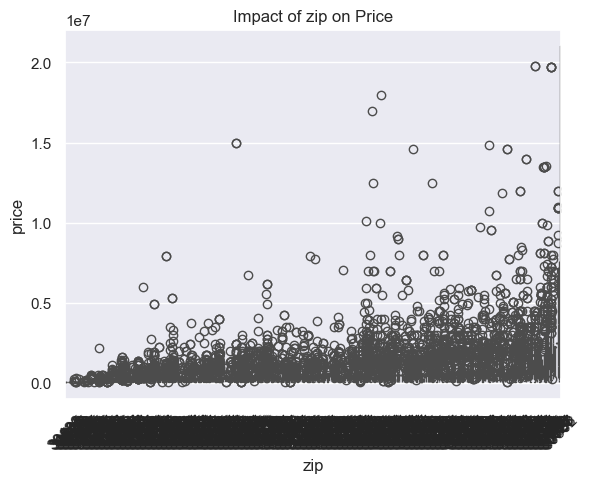

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3973353601.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


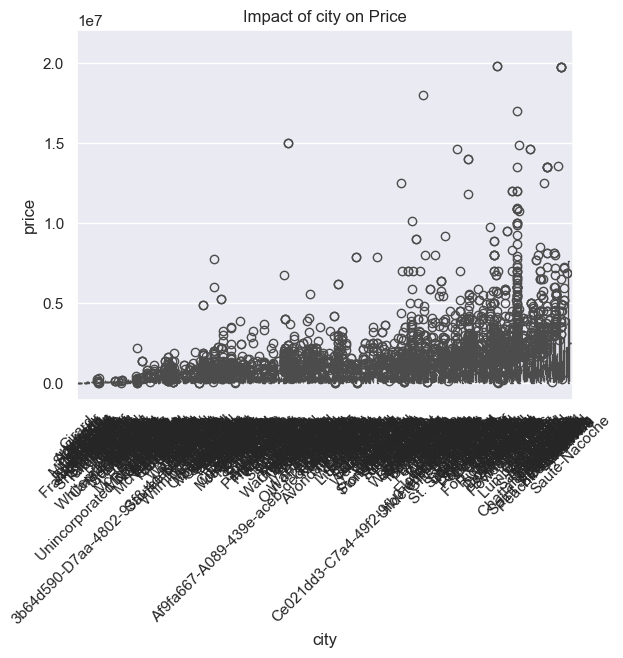

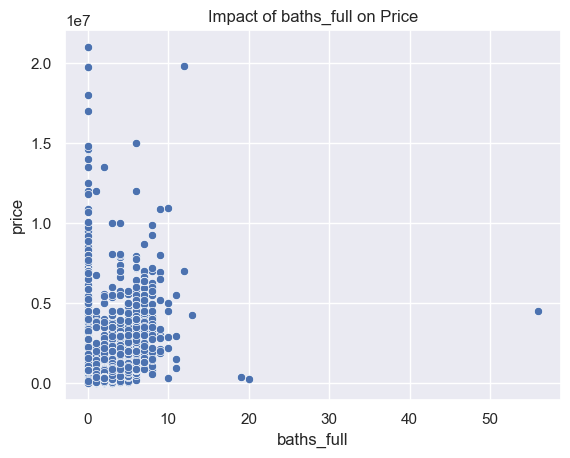

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3973353601.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


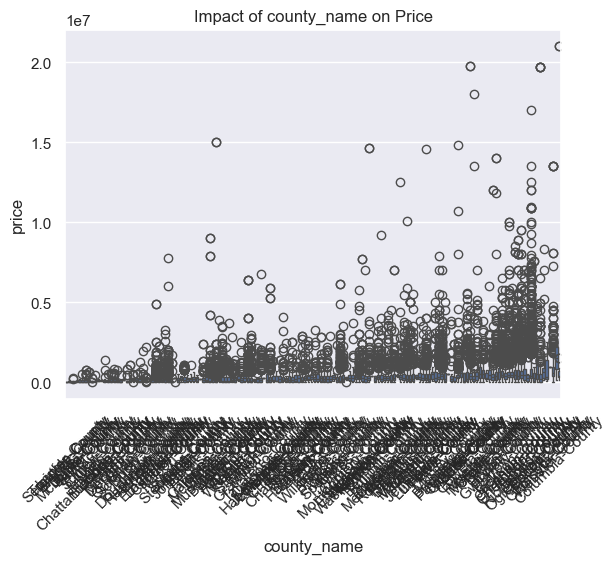

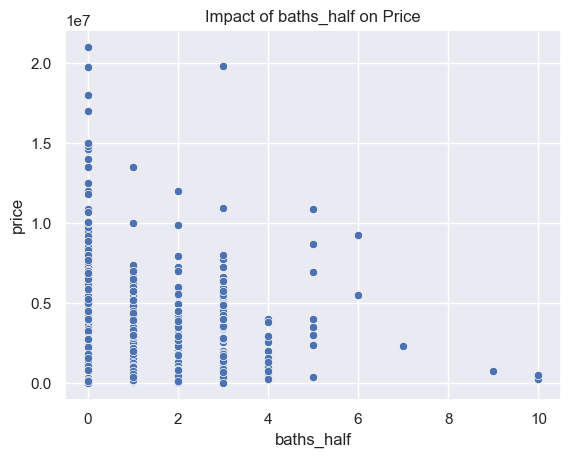

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3973353601.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


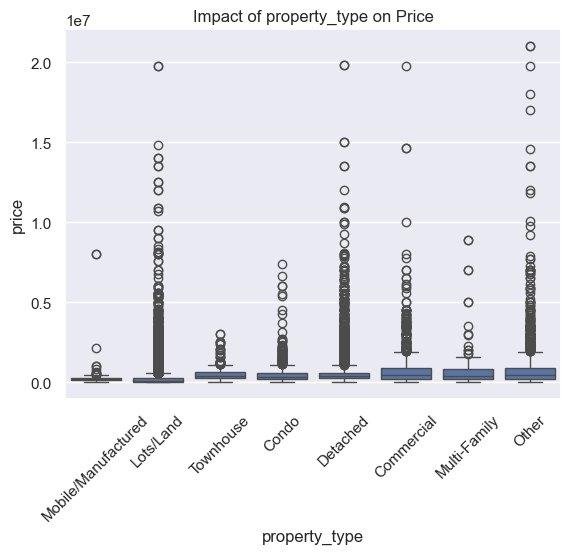

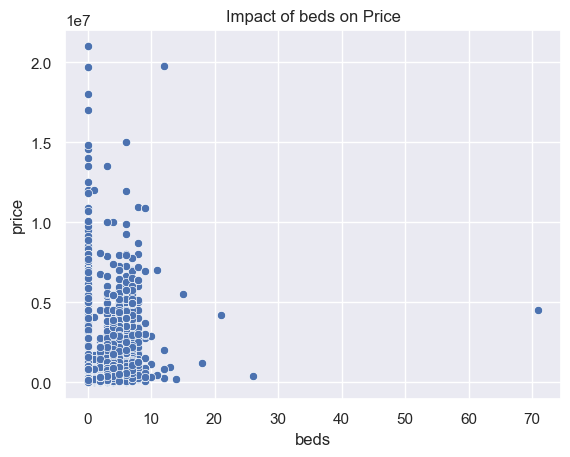

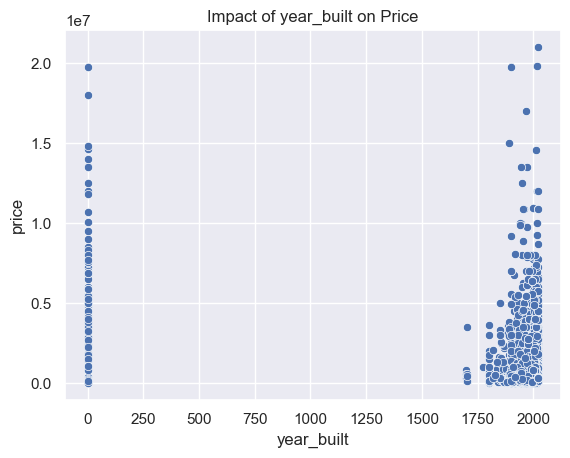

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3973353601.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


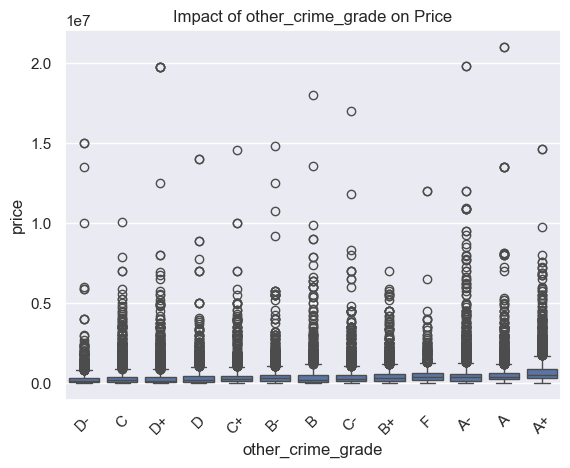

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3973353601.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


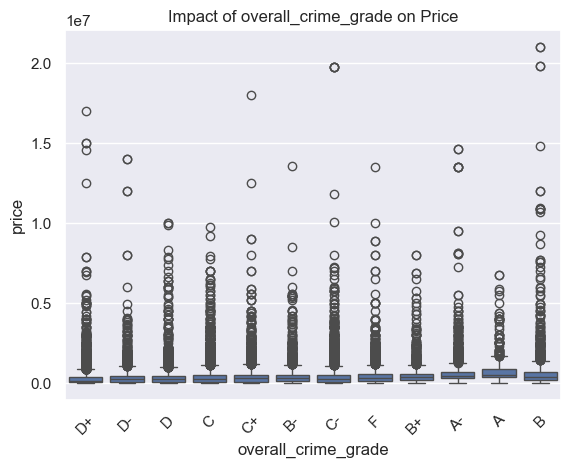

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3973353601.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


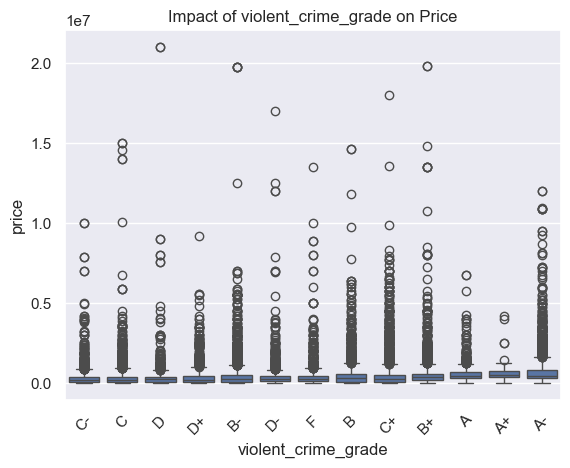

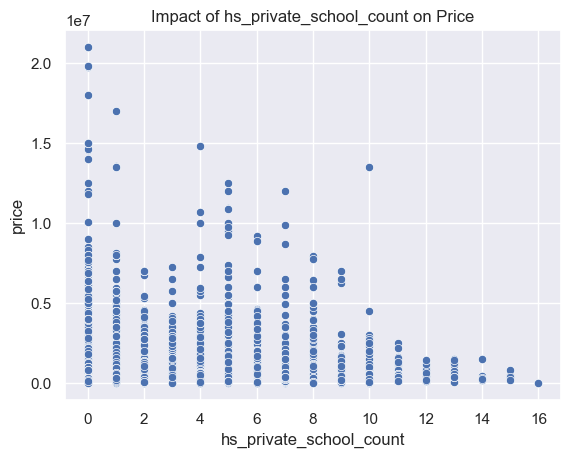

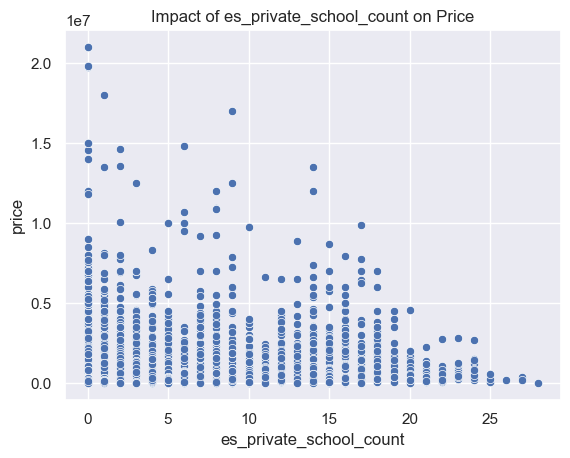

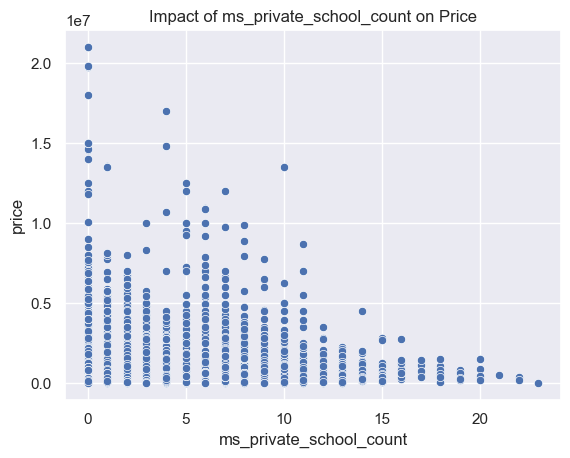

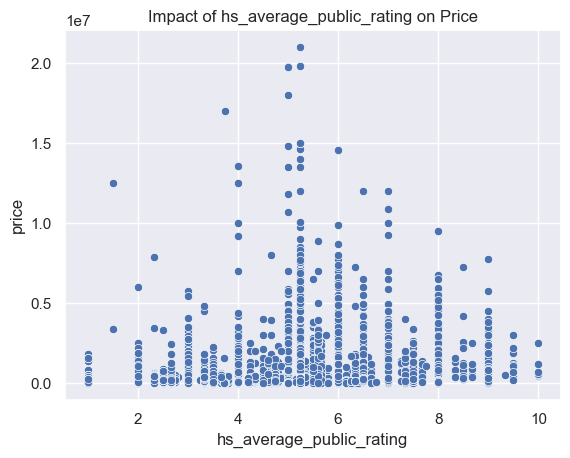

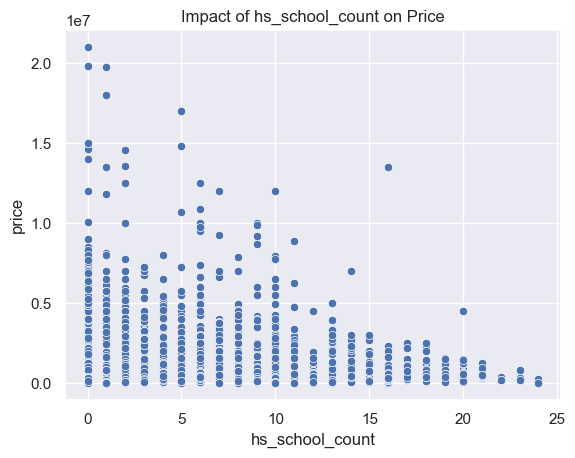

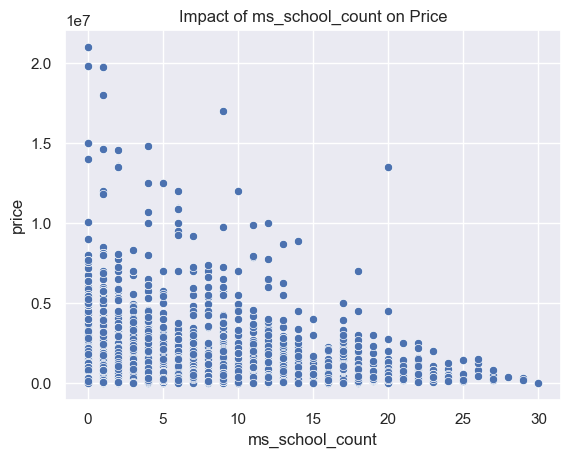

In [234]:
# Looping through top_rsquared_list and creating boxplots for categorical variables and 
# scatterplots for numerical variables

for col in top_rsquared_list:
    if GA_listings_crime_schools_merged_reduced[col].dtype == 'object':
        temp_df = GA_listings_crime_schools_merged_reduced.loc[:, [col,'price']]
        sorted_categories = temp_df.groupby(col)['price'].mean().sort_values().index
        temp_df[col] = pd.Categorical(temp_df[col], categories=sorted_categories, ordered=True)
        temp_df_sorted = temp_df.sort_values(by=col)
        plot = sns.boxplot(data = temp_df_sorted, x = col, y = 'price' )
        plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
        plt.title('Impact of ' + col + ' on Price')
        plt.show()
        
    elif GA_listings_crime_schools_merged_reduced[col].dtype in ['int64', 'float64']:
        temp_df = GA_listings_crime_schools_merged.loc[:, [col,'price']]
        sns.scatterplot(data = temp_df, x = col, y = 'price' )
        plt.title('Impact of ' + col + ' on Price')
        plt.show()

# Separation of Response and Features


In [237]:
# Create features and response columns for modeling

features = GA_listings_crime_schools_merged_reduced.drop(columns = 'price')

response = GA_listings_crime_schools_merged_reduced['price']

In [239]:
# Create a no zip code feature dataframe
features_nozip = features.drop(columns = 'zip')

# Dummification for Linear Model

In [242]:
#Dummification of Categorical Features

cat_features = features.select_dtypes(include=['object'])
cat_features = pd.get_dummies(data = cat_features, drop_first = True)
cat_features = cat_features.replace({False: 0, True: 1})

# Separating numerical features from dataframe 

num_features = features.select_dtypes(include=['int64', 'float64'])
num_features.shape

# Concatenating dummified categorical features with numerical features

features_dum_drop = pd.concat([cat_features, num_features],axis = 1)
features_dum_drop.shape

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/178762518.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_features = cat_features.replace({False: 0, True: 1})


(31005, 1423)

In [244]:
#Dummification of Categorical Features for No Zip Dataframe

cat_features_nozip = features_nozip.select_dtypes(include=['object'])
cat_features_nozip = pd.get_dummies(data = cat_features_nozip, drop_first = True)
cat_features_nozip = cat_features_nozip.replace({False: 0, True: 1})

# Separating numerical features from dataframe 

num_features_nozip = features_nozip.select_dtypes(include=['int64', 'float64'])
num_features_nozip.shape

# Concatenating dummified categorical features with numerical features

features_dum_drop_nozip = pd.concat([cat_features_nozip, num_features_nozip],axis = 1)
features_dum_drop_nozip.shape

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3261312043.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_features_nozip = cat_features_nozip.replace({False: 0, True: 1})


(31005, 832)

In [246]:
features_dum_drop.head()

city_Abbeville  city_Acworth  city_Adairsville  city_Adrian  city_Af9fa667-A089-439e-aceb-dece9bbc6457  city_Alamo  city_Alanta  city_Albany  city_Allenhurst  city_Alma  city_Alpharetta  city_Alto  city_Americus  city_Appling  city_Arabi  city_Aragon  city_Arcade  city_Arlington  city_Armuchee  city_Arnoldsville  city_Ashburn  city_Athens  city_Atlanta  city_Attapulgus  city_Auburn  city_Augusta  city_Austell  city_Avalon  city_Avera  city_Avondale Estates  city_Baconton  city_Bainbridge  city_Baldwin  city_Ball Ground  city_Ballground  city_Barnesville  city_Bartow  city_Baxley  city_Berkeley Lake  city_Bethlehem  city_Big Canoe  city_Bishop  city_Black Creek  city_Blackshear  city_Blairesville  city_Blairsville  city_Blakely  city_Blalirsville  city_Bloomingdale  city_Blue Ridge  city_Bogart  city_Bonaire  city_Bostwick  city_Bowdon  city_Bowersville  city_Bowman  city_Box Springs  city_Braselton  city_Braswell  city_Bremen  city_Bridgeboro  city_Brookhaven  city_Brooklet  \
0               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                 0                0                  0                 0             0                  0                  0                0            0             0              0            0                 0            0                 0               0              0            0                0                0              0   
1               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                 0                0                  0                 0             0                  0                  0                0            0             0              0            0                 0            0                 0               0              0            0                0                0              0   
2               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                 0                0                  0                 0             0                  0                  0                0            0             0              0            0                 0            0                 0               0              0            0                0                0              0   
3               0      

In [248]:
features_dum_drop_nozip.head()

city_Abbeville  city_Acworth  city_Adairsville  city_Adrian  city_Af9fa667-A089-439e-aceb-dece9bbc6457  city_Alamo  city_Alanta  city_Albany  city_Allenhurst  city_Alma  city_Alpharetta  city_Alto  city_Americus  city_Appling  city_Arabi  city_Aragon  city_Arcade  city_Arlington  city_Armuchee  city_Arnoldsville  city_Ashburn  city_Athens  city_Atlanta  city_Attapulgus  city_Auburn  city_Augusta  city_Austell  city_Avalon  city_Avera  city_Avondale Estates  city_Baconton  city_Bainbridge  city_Baldwin  city_Ball Ground  city_Ballground  city_Barnesville  city_Bartow  city_Baxley  city_Berkeley Lake  city_Bethlehem  city_Big Canoe  city_Bishop  city_Black Creek  city_Blackshear  city_Blairesville  city_Blairsville  city_Blakely  city_Blalirsville  city_Bloomingdale  city_Blue Ridge  city_Bogart  city_Bonaire  city_Bostwick  city_Bowdon  city_Bowersville  city_Bowman  city_Box Springs  city_Braselton  city_Braswell  city_Bremen  city_Bridgeboro  city_Brookhaven  city_Brooklet  \
0               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                 0                0                  0                 0             0                  0                  0                0            0             0              0            0                 0            0                 0               0              0            0                0                0              0   
1               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                 0                0                  0                 0             0                  0                  0                0            0             0              0            0                 0            0                 0               0              0            0                0                0              0   
2               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                 0                0                  0                 0             0                  0                  0                0            0             0              0            0                 0            0                 0               0              0            0                0                0              0   
3               0      

# LabelEncoding and OrdinalEncoding

In [251]:
features.select_dtypes(include=['object']).head()

city    county_name    zip property_type overall_crime_grade violent_crime_grade property_crime_grade other_crime_grade
0    Quitman  Brooks-County  31643     Lots/Land                  D-                   D                   D-                D+
1    Quitman  Brooks-County  31643      Detached                  D-                   D                   D-                D+
2   Woodbine  Camden-County  31569      Detached                  D+                  C+                   D-                B+
3  Kingsland  Camden-County  31548     Townhouse                  B-                  C-                   C+                B+
4  Kingsland  Camden-County  31548      Detached                  B-                  C-                   C+                B+

In [253]:
features_encoded = features.copy()
features_encoded_nozip = features_nozip.copy()

In [255]:
# OrdinalEncoding for crime grades

from sklearn.preprocessing import OrdinalEncoder

grade_order = [['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
              ['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
              ['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
              ['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']]

grades_ord_enc = OrdinalEncoder(categories= grade_order)

features_encoded[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']] = grades_ord_enc.fit_transform(features_encoded[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']])
features_encoded_nozip[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']] = grades_ord_enc.fit_transform(features_encoded_nozip[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']])

In [257]:
features_encoded[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']].head()

overall_crime_grade  violent_crime_grade  property_crime_grade  other_crime_grade
0                  1.0                  2.0                   1.0                3.0
1                  1.0                  2.0                   1.0                3.0
2                  3.0                  6.0                   1.0                9.0
3                  7.0                  4.0                   6.0                9.0
4                  7.0                  4.0                   6.0                9.0

In [259]:
# LabelEncoding remaining categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

nominal_columns = ['city','county_name', 'property_type']

for col in nominal_columns:
    features_encoded[col] = le.fit_transform(features_encoded[col])
    features_encoded_nozip[col] = le.fit_transform(features_encoded_nozip[col])



In [261]:
print(features_encoded.shape)
print(features_encoded_nozip.shape)


(31005, 67)
(31005, 66)


In [263]:
features_encoded.head()

latitude  longitude  city  county_name  beds  baths_full  baths_half  square_footage  lot_size  year_built  special_features  unit_count  transaction_type  listing_status  listing_special_features    zip  property_type  overall_crime_grade  violent_crime_grade  violent_crime_total_rate  violent_crime_assault_rate  violent_crime_robbery_rate  violent_crime_rape_rate  violent_crime_murder_rate  property_crime_grade  property_crime_total_rate  property_crime_theft_rate  property_crime_vehicle_theft_rate  property_crime_burglary_rate  property_crime_arson_rate  other_crime_grade  other_crime_total_rate  other_crime_kidnapping_rate  other_crime_drug_crimes_rate  other_crime_vandalism_rate  other_crime_identity_theft_rate  other_crime_animal_cruelty_rate  hs_school_count  hs_public_school_count  hs_private_school_count  hs_charter_school_count  hs_average_public_students_per_teacher  hs_average_public_rating  hs_average_parent_rating  hs_average_public_parent_rating  \
0  30.725605 -83.671772   395           13   0.0         0.0         0.0             0.0      4.93         0.0                 0         0.0                 1               0                         0  31643              3                  1.0                  2.0                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   1.0                      38.96                     28.720                              1.422                         8.751                     0.0656                3.0                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                0                       0                        0                        0                               15.955013                  5.234865                   2.65791                         2.293261   
1  30.781796 -83.558475   395           13   3.0         1.0         0.0          1460.0      0.00      1910.0                 0         1.0                 1               1                         0  31643              2                  1.0                  2.0                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   1.0                      38.96                     28.720                              1.422                         8.751                     0.0656                3.0                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                2                       2                        0                        0                               19.500000                  2.500000                   2.00000                         2.000000   
2  30.864096 -81.622765   555           19   3.0         2.0         0.0          1254.0      0.00      1985.0                 0         1.0                 1               1                         0  31569              2                  3.0                  6.0                     2.600                       1.778                      0.5553                   0.2425                     0.0247                   1.0                      32.39                     26.210                              1.025                         5.105                     0.0454                9.0                   5.921                       0.0802                        1.9190                       2.944                           0.9281                           0.0502                0                       0                        0                        0                               15.955013                  5.234865                   2.65791                         2.293261   
3  30.796300 -81.681675   266           19   2.0         2.0         0.0    

In [265]:
features_encoded_nozip.head()

latitude  longitude  city  county_name  beds  baths_full  baths_half  square_footage  lot_size  year_built  special_features  unit_count  transaction_type  listing_status  listing_special_features  property_type  overall_crime_grade  violent_crime_grade  violent_crime_total_rate  violent_crime_assault_rate  violent_crime_robbery_rate  violent_crime_rape_rate  violent_crime_murder_rate  property_crime_grade  property_crime_total_rate  property_crime_theft_rate  property_crime_vehicle_theft_rate  property_crime_burglary_rate  property_crime_arson_rate  other_crime_grade  other_crime_total_rate  other_crime_kidnapping_rate  other_crime_drug_crimes_rate  other_crime_vandalism_rate  other_crime_identity_theft_rate  other_crime_animal_cruelty_rate  hs_school_count  hs_public_school_count  hs_private_school_count  hs_charter_school_count  hs_average_public_students_per_teacher  hs_average_public_rating  hs_average_parent_rating  hs_average_public_parent_rating  \
0  30.725605 -83.671772   395           13   0.0         0.0         0.0             0.0      4.93         0.0                 0         0.0                 1               0                         0              3                  1.0                  2.0                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   1.0                      38.96                     28.720                              1.422                         8.751                     0.0656                3.0                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                0                       0                        0                        0                               15.955013                  5.234865                   2.65791                         2.293261   
1  30.781796 -83.558475   395           13   3.0         1.0         0.0          1460.0      0.00      1910.0                 0         1.0                 1               1                         0              2                  1.0                  2.0                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   1.0                      38.96                     28.720                              1.422                         8.751                     0.0656                3.0                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                2                       2                        0                        0                               19.500000                  2.500000                   2.00000                         2.000000   
2  30.864096 -81.622765   555           19   3.0         2.0         0.0          1254.0      0.00      1985.0                 0         1.0                 1               1                         0              2                  3.0                  6.0                     2.600                       1.778                      0.5553                   0.2425                     0.0247                   1.0                      32.39                     26.210                              1.025                         5.105                     0.0454                9.0                   5.921                       0.0802                        1.9190                       2.944                           0.9281                           0.0502                0                       0                        0                        0                               15.955013                  5.234865                   2.65791                         2.293261   
3  30.796300 -81.681675   266           19   2.0         2.0         0.0          1016.0      0.00      

# Train-Test-Split

In [268]:
# Train_test_split: test dataset is 20% of original dataframe, random_state turned on to ensure reproducibility

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.2, random_state=0)
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(features_dum_drop, response, test_size=0.2, random_state=0)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(features_encoded, response, test_size=0.2, random_state=0)


X_train_nozip, X_test_nozip, y_train_nozip, y_test_nozip = train_test_split(features_nozip, response, test_size=0.2, random_state=0)
X_train_drop_nozip, X_test_drop_nozip, y_train_drop_nozip, y_test_drop_nozip = train_test_split(features_dum_drop_nozip, response, test_size=0.2, random_state=0)
X_train_encoded_nozip, X_test_encoded_nozip, y_train_encoded_nozip, y_test_encoded_nozip = train_test_split(features_encoded_nozip, response, test_size=0.2, random_state=0)


# StandardScaler for Features_Encoded


In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_encoded_scaled = scaler.fit_transform(features_encoded)
features_encoded_scaled = pd.DataFrame(data=features_encoded_scaled, columns=features_encoded.columns)

features_encoded_scaled_nozip = scaler.fit_transform(features_encoded_nozip)
features_encoded_scaled_nozip = pd.DataFrame(data=features_encoded_scaled_nozip, columns=features_encoded_nozip.columns)


# StandardScaler for Linear Models

In [274]:

scaler = StandardScaler()

X_train_drop_scaled = scaler.fit_transform(X_train_drop)
X_train_drop_scaled = pd.DataFrame(data=X_train_drop_scaled, columns=X_train_drop.columns)

X_test_drop_scaled = scaler.transform(X_test_drop)
X_test_drop_scaled = pd.DataFrame(data=X_test_drop_scaled, columns=X_test_drop.columns)


y_train_drop_scaled = y_train_drop.copy()
y_test_drop_scaled = y_test_drop.copy()


# No zip dataframes

X_train_drop_scaled_nozip = scaler.fit_transform(X_train_drop_nozip)
X_train_drop_scaled_nozip = pd.DataFrame(data=X_train_drop_scaled_nozip, columns=X_train_drop_nozip.columns)

X_test_drop_scaled_nozip = scaler.transform(X_test_drop_nozip)
X_test_drop_scaled_nozip = pd.DataFrame(data=X_test_drop_scaled_nozip, columns=X_test_drop_nozip.columns)


y_train_drop_scaled_nozip = y_train_drop_nozip.copy()
y_test_drop_scaled_nozip = y_test_drop_nozip.copy()


# StandardScaler for PyTorch Models

In [277]:

scaler = StandardScaler()

X_train_encoded_scaled = scaler.fit_transform(X_train_encoded)
X_train_encoded_scaled = pd.DataFrame(data=X_train_encoded_scaled, columns=X_train_encoded.columns)

X_test_encoded_scaled = scaler.transform(X_test_encoded)
X_test_encoded_scaled = pd.DataFrame(data=X_test_encoded_scaled, columns=X_test_encoded.columns)


y_train_encoded_scaled = y_train_encoded.copy()
y_test_encoded_scaled = y_test_encoded.copy()


# No zip dataframes

X_train_encoded_scaled_nozip = scaler.fit_transform(X_train_encoded_nozip)
X_train_encoded_scaled_nozip = pd.DataFrame(data=X_train_encoded_scaled_nozip, columns=X_train_encoded_nozip.columns)

X_test_encoded_scaled_nozip = scaler.transform(X_test_encoded_nozip)
X_test_encoded_scaled_nozip = pd.DataFrame(data=X_test_encoded_scaled_nozip, columns=X_test_encoded_nozip.columns)


y_train_encoded_scaled_nozip = y_train_encoded_nozip.copy()
y_test_encoded_scaled_nozip = y_test_encoded_nozip.copy()

# StandardScaler for Full Feature DataFrame

In [280]:
scaler = StandardScaler()

features_dum_drop_scaled = scaler.fit_transform(features_dum_drop)
features_dum_drop_scaled = pd.DataFrame(data=features_dum_drop_scaled, columns=features_dum_drop.columns)

features_dum_drop_scaled_nozip = scaler.fit_transform(features_dum_drop_nozip)
features_dum_drop_scaled_nozip = pd.DataFrame(data=features_dum_drop_scaled_nozip, columns=features_dum_drop_nozip.columns)


# Data Export

In [283]:

current_directory = os.getcwd()

dataframes = {'X_train_drop_scaled': X_train_drop_scaled,
              'X_test_drop_scaled': X_test_drop_scaled,
              'y_train_drop_scaled': y_train_drop_scaled,
              'y_test_drop_scaled': y_test_drop_scaled,
              'X_train_encoded': X_train_encoded,
              'X_test_encoded': X_test_encoded, 
              'y_train_encoded': y_train_encoded, 
              'y_test_encoded': y_test_encoded, 
              'X_train_encoded_scaled': X_train_encoded_scaled,
              'X_test_encoded_scaled': X_test_encoded_scaled, 
              'y_train_encoded_scaled': y_train_encoded_scaled, 
              'y_test_encoded_scaled': y_test_encoded_scaled,
              'X_train': X_train,
              'X_test': X_test,
              'y_train': y_train,
              'y_test': y_test,
              'features': features,
              'response': response,
              'features_dum_drop': features_dum_drop,
              'features_encoded': features_encoded,
              'features_dum_drop_scaled': features_dum_drop_scaled,
              'features_encoded_scaled': features_encoded_scaled,
              
              'X_train_drop_scaled_nozip': X_train_drop_scaled_nozip,
              'X_test_drop_scaled_nozip': X_test_drop_scaled_nozip,
              'y_train_drop_scaled_nozip': y_train_drop_scaled_nozip,
              'y_test_drop_scaled_nozip': y_test_drop_scaled_nozip,
              'X_train_encoded_nozip': X_train_encoded_nozip,
              'X_test_encoded_nozip': X_test_encoded_nozip, 
              'y_train_encoded_nozip': y_train_encoded_nozip, 
              'y_test_encoded_nozip': y_test_encoded_nozip, 
              'X_train_encoded_scaled_nozip': X_train_encoded_scaled_nozip,
              'X_test_encoded_scaled_nozip': X_test_encoded_scaled_nozip, 
              'y_train_encoded_scaled_nozip': y_train_encoded_scaled_nozip, 
              'y_test_encoded_scaled_nozip': y_test_encoded_scaled_nozip,
              'X_train_nozip': X_train_nozip,
              'X_test_nozip': X_test_nozip,
              'y_train_nozip': y_train_nozip,
              'y_test_nozip': y_test_nozip,
              'features_nozip': features_nozip,
              'features_dum_drop_nozip': features_dum_drop_nozip,
              'features_encoded_nozip': features_encoded_nozip,
              'features_dum_drop_scaled_nozip': features_dum_drop_scaled_nozip,
              'features_encoded_scaled_nozip': features_encoded_scaled_nozip,
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    # Save the dataframe to a CSV file
    df.to_csv(file_path, sep='\t', index=False)

# Data Import

In [286]:
import os

current_directory = os.getcwd()

dataframes = ['X_train_drop_scaled.csv', 'X_test_drop_scaled.csv', 'y_train_drop_scaled.csv', 'y_test_drop_scaled.csv',
              'X_train_encoded.csv',
              'X_test_encoded.csv', 'y_train_encoded.csv', 'y_test_encoded.csv', 'X_train_encoded_scaled.csv',
              'X_test_encoded_scaled.csv', 'y_train_encoded_scaled.csv', 'y_test_encoded_scaled.csv', 'X_train.csv',
              'X_test.csv', 'y_train.csv', 'y_test.csv', 'features.csv',
              'response.csv', 'features_dum_drop.csv',
              'features_encoded.csv', 'features_dum_drop_scaled.csv', 'features_encoded_scaled.csv',
             
             'X_train_drop_scaled_nozip.csv', 'X_test_drop_scaled_nozip.csv', 'y_train_drop_scaled_nozip.csv', 'y_test_drop_scaled_nozip.csv',
              'X_train_encoded_nozip.csv',
              'X_test_encoded_nozip.csv', 'y_train_encoded_nozip.csv', 'y_test_encoded_nozip.csv', 'X_train_encoded_scaled_nozip.csv',
              'X_test_encoded_scaled_nozip.csv', 'y_train_encoded_scaled_nozip.csv', 'y_test_encoded_scaled_nozip.csv', 'X_train_nozip.csv',
              'X_test_nozip.csv', 'y_train_nozip.csv', 'y_test_nozip.csv', 'features_nozip.csv',
              'features_dum_drop_nozip.csv',
              'features_encoded_nozip.csv', 'features_dum_drop_scaled_nozip.csv', 'features_encoded_scaled_nozip.csv']

loaded_dataframes = {}

for file_name in dataframes:
    
    df_name = file_name.split('.csv')[0]
    file_path = os.path.join(current_directory, file_name)
    loaded_dataframes[df_name] = pd.read_csv(file_path, sep='\t')



In [287]:
features = loaded_dataframes['features']
features_dum_drop = loaded_dataframes['features_dum_drop']
features_encoded = loaded_dataframes['features_encoded']
features_dum_drop_scaled = loaded_dataframes['features_dum_drop_scaled']
features_encoded_scaled = loaded_dataframes['features_encoded_scaled']

response = loaded_dataframes['response']


X_train_drop_scaled = loaded_dataframes['X_train_drop_scaled']
X_test_drop_scaled = loaded_dataframes['X_test_drop_scaled']
y_train_drop_scaled = loaded_dataframes['y_train_drop_scaled']['price']
y_test_drop_scaled = loaded_dataframes['y_test_drop_scaled']['price']

X_train_encoded = loaded_dataframes['X_train_encoded']
X_test_encoded = loaded_dataframes['X_test_encoded']
y_train_encoded = loaded_dataframes['y_train_encoded']['price']
y_test_encoded = loaded_dataframes['y_test_encoded']['price']

X_train_encoded_scaled = loaded_dataframes['X_train_encoded_scaled']
X_test_encoded_scaled = loaded_dataframes['X_test_encoded_scaled']
y_train_encoded_scaled = loaded_dataframes['y_train_encoded_scaled']['price']
y_test_encoded_scaled = loaded_dataframes['y_test_encoded_scaled']['price']

In [290]:
features_nozip = loaded_dataframes['features_nozip']
features_dum_drop_nozip = loaded_dataframes['features_dum_drop_nozip']
features_encoded_nozip = loaded_dataframes['features_encoded_nozip']
features_dum_drop_scaled_nozip = loaded_dataframes['features_dum_drop_scaled_nozip']
features_encoded_scaled_nozip = loaded_dataframes['features_encoded_scaled_nozip']



X_train_drop_scaled_nozip = loaded_dataframes['X_train_drop_scaled_nozip']
X_test_drop_scaled_nozip = loaded_dataframes['X_test_drop_scaled_nozip']
y_train_drop_scaled_nozip = loaded_dataframes['y_train_drop_scaled_nozip']['price']
y_test_drop_scaled_nozip = loaded_dataframes['y_test_drop_scaled_nozip']['price']

X_train_encoded_nozip = loaded_dataframes['X_train_encoded_nozip']
X_test_encoded_nozip = loaded_dataframes['X_test_encoded_nozip']
y_train_encoded_nozip = loaded_dataframes['y_train_encoded_nozip']['price']
y_test_encoded_nozip = loaded_dataframes['y_test_encoded_nozip']['price']

X_train_encoded_scaled_nozip = loaded_dataframes['X_train_encoded_scaled_nozip']
X_test_encoded_scaled_nozip = loaded_dataframes['X_test_encoded_scaled_nozip']
y_train_encoded_scaled_nozip = loaded_dataframes['y_train_encoded_scaled_nozip']['price']
y_test_encoded_scaled_nozip = loaded_dataframes['y_test_encoded_scaled_nozip']['price']

# Setting KFold


In [293]:
# Setting KFold for cross-validation

from sklearn.model_selection import KFold

kf = KFold(shuffle = True, random_state = 0)

# Penalized Linear Regression - Lasso

## Lasso - Base Model - Cross Validation

In [297]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


scaler = StandardScaler()

lasso = Lasso(random_state = 0, alpha = 0.005)

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_drop_scaled_cv_r2 = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')
lasso_drop_scaled_cv_mae = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_error')
lasso_drop_scaled_cv_rmse = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'neg_root_mean_squared_error')
lasso_drop_scaled_cv_mape = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_percentage_error')


In [301]:
print('Mean cross-validation R2 score: ' + str(lasso_drop_scaled_cv_r2.mean()))
print('Std dev cross-validation R2 score: ' + str(lasso_drop_scaled_cv_r2.std()))

Mean cross-validation R2 score: 0.5102379692404935
Std dev cross-validation R2 score: 0.008153606108339357


In [303]:
print('Mean cross-validation MAE score: ' + str((lasso_drop_scaled_cv_mae * -1).mean()))
print('Std dev cross-validation MAE score: ' + str((lasso_drop_scaled_cv_mae * -1).std()))

Mean cross-validation MAE score: 0.6526682134396552
Std dev cross-validation MAE score: 0.0027609571804727423


In [305]:
print('Mean cross-validation RMSE score: ' + str((lasso_drop_scaled_cv_rmse * -1).mean()))
print('Std dev cross-validation RMSE score: ' + str((lasso_drop_scaled_cv_rmse * -1).std()))

Mean cross-validation RMSE score: 0.901135784184081
Std dev cross-validation RMSE score: 0.006232976276481655


In [307]:
print('Mean cross-validation MAPE score: ' + str((lasso_drop_scaled_cv_mape * -1).mean()))
print('Std dev cross-validation MAPE score: ' + str((lasso_drop_scaled_cv_mape * -1).std()))

Mean cross-validation MAPE score: 0.05418324928295456
Std dev cross-validation MAPE score: 0.00023131511520439252


## Lasso - Base Model - Hyperparameter Tuning

In [310]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state = 0)

grid = {'alpha': np.linspace(0.00001, 0.005, 20)}

gsCV = GridSearchCV(lasso, grid, cv = kf, return_train_score=True, n_jobs=-1)
gsCV.fit(X_train_drop_scaled, np.log(y_train_drop_scaled))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.509e+01, tolerance: 3.280e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.273e+03, tolerance: 3.321e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.666e+03, toler

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 2.72631579e-04, 5.35263158e-04, 7.97894737e-04,
       1.06052632e-03, 1.32315789e-03, 1.58578947e-03, 1.84842105e-03,
       2.11105263e-03, 2.37368421e-03, 2.63631579e-03, 2.89894737e-03,
       3.16157895e-03, 3.42421053e-03, 3.68684211e-03, 3.94947368e-03,
       4.21210526e-03, 4.47473684e-03, 4.73736842e-03, 5.00000000e-03])},
             return_train_score=True)

In [312]:
gsCV_lasso_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_lasso_train_vs_test_df['model_number'] = gsCV_lasso_train_vs_test_df['model_number'] + 1
gsCV_lasso_train_vs_test_df['score_difference'] = gsCV_lasso_train_vs_test_df['train_score'] - gsCV_lasso_train_vs_test_df['test_score']

gsCV_lasso_train_vs_test_df = gsCV_lasso_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_lasso_train_vs_test_df.head()


model_number  score_difference   score_type     score
0             1          0.107455  train_score  0.554544
1             2          0.102260  train_score  0.553740
2             3          0.098987  train_score  0.552827
3             4          0.095916  train_score  0.551982
4             5          0.093047  train_score  0.551100

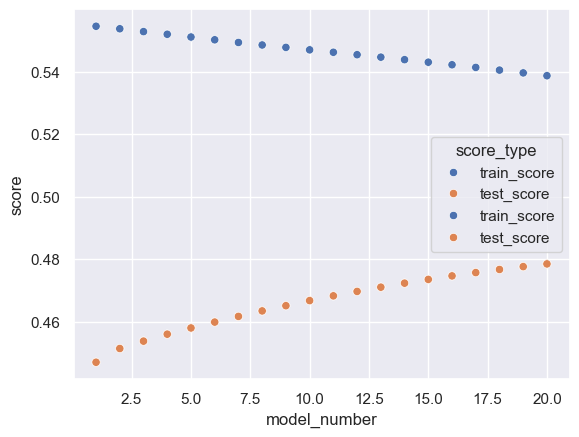

In [316]:
sns.scatterplot(data = gsCV_lasso_train_vs_test_df, y = 'score', x = 'model_number', hue = 'score_type')
plt.show()


In [318]:
print('Best estimators: ' + str(gsCV.best_estimator_))
print('Best score: ' + str(gsCV.best_score_))

Best estimators: Lasso(alpha=0.005, random_state=0)
Best score: 0.47853910800394817


In [320]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

# Assuming 'X' is your feature matrix and 'y' is your target variable

lasso_cv = LassoCV(alphas=None)

scaler = StandardScaler()

model_pipeline = Pipeline([('scaler', scaler), ('lasso_cv', lasso_cv)])
# Perform cross-validation

cv_models = []

for train_index, test_index in kf.split(features_dum_drop):
    X_train, X_test = features_dum_drop.iloc[train_index,:], features_dum_drop.iloc[test_index,:]
    y_train, y_test = response.iloc[train_index], response.iloc[test_index]
    # Fit the pipeline on the training data
    model_pipeline.fit(X_train, np.log(y_train))
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    # Calculate R-squared for the fold
    r2 = r2_score(np.log(y_test), y_pred)
    # Append the fitted model and R-squared to the list
    cv_models.append((model_pipeline.named_steps['lasso_cv'], r2))
# Access the optimal alpha and R-squared for each fold
optimal_alphas = [model[0].alpha_ for model in cv_models]
r2_scores = [model[1] for model in cv_models]
# Print the optimal alphas and R-squared for each fold
for fold, (alpha, r2) in enumerate(zip(optimal_alphas, r2_scores), 1):
    print(f"Fold {fold}: Optimal alpha = {alpha}, R-squared = {r2}")
print()
print(sum(r2_scores)/len(r2_scores))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when 

Fold 1: Optimal alpha = 0.004861473885862222, R-squared = 0.5099581302766107
Fold 2: Optimal alpha = 0.004861473885862222, R-squared = 0.5106581572299886
Fold 3: Optimal alpha = 0.004861473885862222, R-squared = 0.49546821622538173
Fold 4: Optimal alpha = 0.004861473885862222, R-squared = 0.5170226199788568
Fold 5: Optimal alpha = 0.004861473885862222, R-squared = 0.5209883402737714

0.5108190927969218


In [322]:
lasso.set_params(alpha = 0.004861473885862222)
lasso.fit(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))
print('Best train score: ' + str(lasso.score(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))))
print('Best test score: ' + str(lasso.score(X = X_test_drop_scaled,y = np.log(y_test_drop_scaled))))


Best train score: 0.5350881893017783
Best test score: 0.5086724198655757


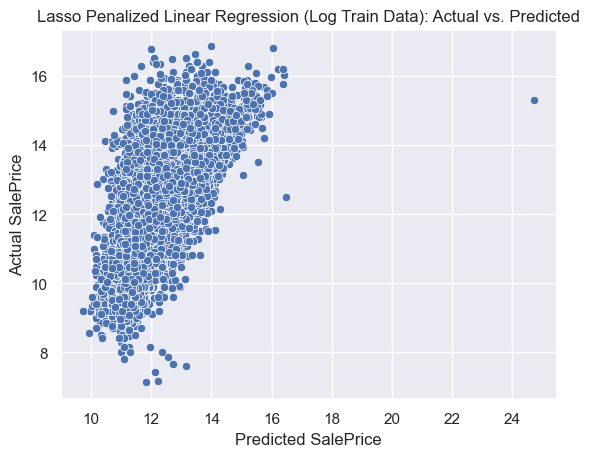

In [324]:
sns.scatterplot(x = lasso.predict(X_train_drop_scaled), y = np.log(y_train_drop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()


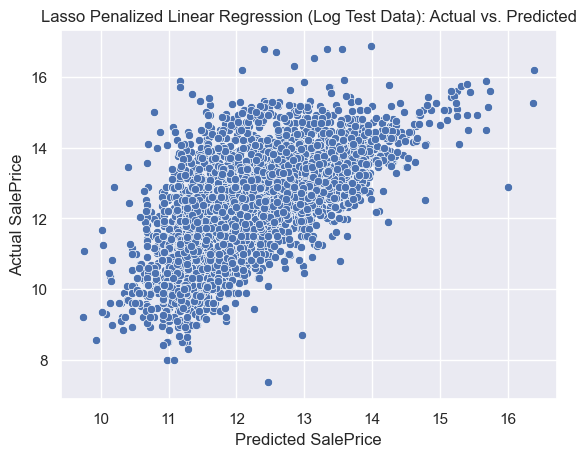

In [326]:
sns.scatterplot(x = lasso.predict(X_test_drop_scaled), y = np.log(y_test_drop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()


# Lasso - Post Tuning - Cross Validation

In [329]:

lasso = Lasso(alpha = 0.004861473885862222, random_state = 0)

scaler = StandardScaler()

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_drop_scaled_cv_tuned_r2 = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')
lasso_drop_scaled_cv_tuned_mae = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_error')
lasso_drop_scaled_cv_tuned_rmse = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'neg_root_mean_squared_error')
lasso_drop_scaled_cv_tuned_mape = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_percentage_error')



In [331]:
print('Mean cross-validation R2 score: ' + str(lasso_drop_scaled_cv_tuned_r2.mean()))
print('Std dev cross-validation R2 score: ' + str(lasso_drop_scaled_cv_tuned_r2.std()))

Mean cross-validation R2 score: 0.5104085761452107
Std dev cross-validation R2 score: 0.00820740194939667


In [333]:
print('Mean cross-validation MAE score: ' + str((lasso_drop_scaled_cv_tuned_mae * -1).mean()))
print('Std dev cross-validation MAE score: ' + str((lasso_drop_scaled_cv_tuned_mae * -1).std()))

Mean cross-validation MAE score: 0.6525319106622104
Std dev cross-validation MAE score: 0.002756924618491527


In [335]:
print('Mean cross-validation RMSE score: ' + str((lasso_drop_scaled_cv_tuned_rmse * -1).mean()))
print('Std dev cross-validation RMSE score: ' + str((lasso_drop_scaled_cv_tuned_rmse * -1).std()))

Mean cross-validation RMSE score: 0.9009782522540684
Std dev cross-validation RMSE score: 0.006275004321529047


In [337]:
print('Mean cross-validation MAPE score: ' + str((lasso_drop_scaled_cv_tuned_mape * -1).mean()))
print('Std dev cross-validation MAPE score: ' + str((lasso_drop_scaled_cv_tuned_mape * -1).std()))

Mean cross-validation MAPE score: 0.05416975238408748
Std dev cross-validation MAPE score: 0.0002315795410581352


In [339]:
lasso_drop_scaled_cv_tuned_mae = lasso_drop_scaled_cv_tuned_mae * -1
lasso_drop_scaled_cv_tuned_rmse = lasso_drop_scaled_cv_tuned_rmse * -1
lasso_drop_scaled_cv_tuned_mape = lasso_drop_scaled_cv_tuned_mape * -1

# No Zip

## Lasso - No Zip - Base Model - Cross Validation

In [343]:


scaler = StandardScaler()

lasso = Lasso(random_state = 0, alpha = 0.005)

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_drop_scaled_cv_nozip_r2 = cross_val_score(estimator = pipe, X = features_dum_drop_nozip, y = np.log(response), cv = kf, scoring = 'r2')
lasso_drop_scaled_cv_nozip_mae = cross_val_score(estimator = pipe, X = features_dum_drop_nozip, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_error')
lasso_drop_scaled_cv_nozip_rmse = cross_val_score(estimator = pipe, X = features_dum_drop_nozip, y = np.log(response), cv = kf, scoring = 'neg_root_mean_squared_error')
lasso_drop_scaled_cv_nozip_mape = cross_val_score(estimator = pipe, X = features_dum_drop_nozip, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_percentage_error')


In [344]:
print('Mean cross-validation R2 score: ' + str(lasso_drop_scaled_cv_nozip_r2.mean()))
print('Std dev cross-validation R2 score: ' + str(lasso_drop_scaled_cv_nozip_r2.std()))
print('Mean cross-validation MAE score: ' + str((lasso_drop_scaled_cv_nozip_mae * -1).mean()))
print('Std dev cross-validation MAE score: ' + str((lasso_drop_scaled_cv_nozip_mae * -1).std()))
print('Mean cross-validation RMSE score: ' + str((lasso_drop_scaled_cv_nozip_rmse * -1).mean()))
print('Std dev cross-validation RMSE score: ' + str((lasso_drop_scaled_cv_nozip_rmse * -1).std()))
print('Mean cross-validation MAPE score: ' + str((lasso_drop_scaled_cv_nozip_mape * -1).mean()))
print('Std dev cross-validation MAPE score: ' + str((lasso_drop_scaled_cv_nozip_mape * -1).std()))

Mean cross-validation R2 score: 0.5048671889005683
Std dev cross-validation R2 score: 0.008239028805349517
Mean cross-validation MAE score: 0.6574930324040493
Std dev cross-validation MAE score: 0.0023467788200517595
Mean cross-validation RMSE score: 0.9060648546170056
Std dev cross-validation RMSE score: 0.0064731013761378286
Mean cross-validation MAPE score: 0.05457294052284545
Std dev cross-validation MAPE score: 0.0001997381310712756


## Lasso - No Zip - Hyperparameter Tuning

In [348]:

# Assuming 'X' is your feature matrix and 'y' is your target variable

lasso_cv = LassoCV(alphas=None)

scaler = StandardScaler()

model_pipeline = Pipeline([('scaler', scaler), ('lasso_cv', lasso_cv)])
# Perform cross-validation

cv_models = []

for train_index, test_index in kf.split(features_dum_drop_nozip):
    X_train, X_test = features_dum_drop_nozip.iloc[train_index,:], features_dum_drop_nozip.iloc[test_index,:]
    y_train, y_test = response.iloc[train_index], response.iloc[test_index]
    # Fit the pipeline on the training data
    model_pipeline.fit(X_train, np.log(y_train))
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    # Calculate R-squared for the fold
    r2 = r2_score(np.log(y_test), y_pred)
    # Append the fitted model and R-squared to the list
    cv_models.append((model_pipeline.named_steps['lasso_cv'], r2))
# Access the optimal alpha and R-squared for each fold
optimal_alphas = [model[0].alpha_ for model in cv_models]
r2_scores = [model[1] for model in cv_models]
# Print the optimal alphas and R-squared for each fold
for fold, (alpha, r2) in enumerate(zip(optimal_alphas, r2_scores), 1):
    print(f"Fold {fold}: Optimal alpha = {alpha}, R-squared = {r2}")
print()
print(sum(r2_scores)/len(r2_scores))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when 

Fold 1: Optimal alpha = 0.004533826816740481, R-squared = 0.5043391207772572
Fold 2: Optimal alpha = 0.004533826816740481, R-squared = 0.506719892159168
Fold 3: Optimal alpha = 0.004533826816740481, R-squared = 0.49048204082484137
Fold 4: Optimal alpha = 0.004533826816740481, R-squared = 0.5109294836216867
Fold 5: Optimal alpha = 0.004533826816740481, R-squared = 0.5162709331788375

0.5057482941123581


In [350]:
lasso.set_params(alpha = 0.004533826816740481)
lasso.fit(X = X_train_drop_scaled_nozip,y = np.log(y_train_drop_scaled_nozip))
print('Best train score: ' + str(lasso.score(X = X_train_drop_scaled_nozip,y = np.log(y_train_drop_scaled_nozip))))
print('Best test score: ' + str(lasso.score(X = X_test_drop_scaled_nozip,y = np.log(y_test_drop_scaled_nozip))))


Best train score: 0.5280619030133118
Best test score: 0.5034076360600276


## Lasso - No Zip - Post Tuning - Cross Validation

In [353]:

lasso = Lasso(alpha = 0.004533826816740481, random_state = 0)

scaler = StandardScaler()

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_drop_scaled_cv_tuned_nozip_r2 = cross_val_score(estimator = pipe, X = features_dum_drop_nozip, y = np.log(response), cv = kf, scoring = 'r2')
lasso_drop_scaled_cv_tuned_nozip_mae = cross_val_score(estimator = pipe, X = features_dum_drop_nozip, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_error')
lasso_drop_scaled_cv_tuned_nozip_rmse = cross_val_score(estimator = pipe, X = features_dum_drop_nozip, y = np.log(response), cv = kf, scoring = 'neg_root_mean_squared_error')
lasso_drop_scaled_cv_tuned_nozip_mape = cross_val_score(estimator = pipe, X = features_dum_drop_nozip, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_percentage_error')



In [355]:
print('Mean cross-validation R2 score: ' + str(lasso_drop_scaled_cv_tuned_nozip_r2.mean()))
print('Std dev cross-validation R2 score: ' + str(lasso_drop_scaled_cv_tuned_nozip_r2.std()))
print('Mean cross-validation MAE score: ' + str((lasso_drop_scaled_cv_tuned_nozip_mae * -1).mean()))
print('Std dev cross-validation MAE score: ' + str((lasso_drop_scaled_cv_tuned_nozip_mae * -1).std()))
print('Mean cross-validation RMSE score: ' + str((lasso_drop_scaled_cv_tuned_nozip_rmse * -1).mean()))
print('Std dev cross-validation RMSE score: ' + str((lasso_drop_scaled_cv_tuned_nozip_rmse * -1).std()))
print('Mean cross-validation MAPE score: ' + str((lasso_drop_scaled_cv_tuned_nozip_mape * -1).mean()))
print('Std dev cross-validation MAPE score: ' + str((lasso_drop_scaled_cv_tuned_nozip_mape * -1).std()))

Mean cross-validation R2 score: 0.5054676951571183
Std dev cross-validation R2 score: 0.00847052559555566
Mean cross-validation MAE score: 0.6569878104041156
Std dev cross-validation MAE score: 0.002388606440439805
Mean cross-validation RMSE score: 0.9055129886244309
Std dev cross-validation RMSE score: 0.006668105394541225
Mean cross-validation MAPE score: 0.05452426652916914
Std dev cross-validation MAPE score: 0.00020472526763719287


In [357]:
lasso_drop_scaled_cv_tuned_nozip_mae = lasso_drop_scaled_cv_tuned_nozip_mae * -1
lasso_drop_scaled_cv_tuned_nozip_rmse = lasso_drop_scaled_cv_tuned_nozip_rmse * -1
lasso_drop_scaled_cv_tuned_nozip_mape = lasso_drop_scaled_cv_tuned_nozip_mape * -1

# Time Trials for Models

In [360]:
import time

i = 1
lasso_times = []
lasso = Lasso(alpha = 0.004533826816740481, random_state = 0)


while i <= 5:
    start = time.time()

    lasso.fit(X = features_dum_drop_scaled, y = np.log(response))
    
    end = time.time()
    
    lasso_time = end - start
    lasso_times.append(lasso_time)
    
    i = i + 1

lasso_times

[7.324054956436157,
 7.084093809127808,
 5.964875936508179,
 5.994190692901611,
 6.303085088729858]

In [363]:

i = 1
lasso_times_nozip = []
lasso = Lasso(alpha = 0.004533826816740481, random_state = 0)


while i <= 5:
    start = time.time()

    lasso.fit(X = features_dum_drop_scaled_nozip, y = np.log(response))
    
    end = time.time()
    
    lasso_time = end - start
    lasso_times_nozip.append(lasso_time)
    
    i = i + 1

lasso_times_nozip

[2.381561040878296,
 2.3152310848236084,
 2.636178970336914,
 2.1284677982330322,
 2.1085081100463867]

# Model Results

In [366]:
lasso_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                     'Model Durations': lasso_times,
                                      'Lasso Penalized Regression_Drop_Scaled R2': lasso_drop_scaled_cv_tuned_r2,
                                      'Lasso Penalized Regression_Drop_Scaled MAE': lasso_drop_scaled_cv_tuned_mae,
                                      'Lasso Penalized Regression_Drop_Scaled RMSE': lasso_drop_scaled_cv_tuned_rmse,
                                      'Lasso Penalized Regression_Drop_Scaled MAPE': lasso_drop_scaled_cv_tuned_mape,
                                     }
                             )

lasso_results

Model Number  Model Durations  Lasso Penalized Regression_Drop_Scaled R2  Lasso Penalized Regression_Drop_Scaled MAE  Lasso Penalized Regression_Drop_Scaled RMSE  Lasso Penalized Regression_Drop_Scaled MAPE
0           1.0         7.324055                                   0.508672                                    0.653847                                     0.901829                                     0.054372
1           2.0         7.084094                                   0.509713                                    0.652289                                     0.898756                                     0.054168
2           3.0         5.964876                                   0.496634                                    0.656140                                     0.911606                                     0.054367
3           4.0         5.994191                                   0.516034                                    0.652665                                     0.900559                                     0.054204
4           5.0         6.303085                                   0.520988                                    0.647718                                     0.892141                                     0.053737

In [368]:
lasso_nozip_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                     'Model Durations': lasso_times_nozip,
                                      'Lasso Penalized Regression_Drop_Scaled_NoZip R2': lasso_drop_scaled_cv_tuned_nozip_r2,
                                      'Lasso Penalized Regression_Drop_Scaled_NoZip MAE': lasso_drop_scaled_cv_tuned_nozip_mae,
                                      'Lasso Penalized Regression_Drop_Scaled_NoZip RMSE': lasso_drop_scaled_cv_tuned_nozip_rmse,
                                      'Lasso Penalized Regression_Drop_Scaled_NoZip MAPE': lasso_drop_scaled_cv_tuned_nozip_mape,
                                     }
                             )

lasso_nozip_results

Model Number  Model Durations  Lasso Penalized Regression_Drop_Scaled_NoZip R2  Lasso Penalized Regression_Drop_Scaled_NoZip MAE  Lasso Penalized Regression_Drop_Scaled_NoZip RMSE  Lasso Penalized Regression_Drop_Scaled_NoZip MAPE
0           1.0         2.381561                                         0.503408                                          0.658181                                           0.906648                                           0.054742
1           2.0         2.315231                                         0.506296                                          0.656443                                           0.901883                                           0.054499
2           3.0         2.636179                                         0.490902                                          0.660229                                           0.916782                                           0.054672
3           4.0         2.128468                                         0.510462                                          0.657134                                           0.905729                                           0.054556
4           5.0         2.108508                                         0.516271                                          0.652953                                           0.896523                                           0.054152

In [370]:

current_directory = os.getcwd()

dataframes = {'lasso_results': lasso_results,
              'lasso_results_nozip': lasso_nozip_results,
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    df.to_csv(file_path, sep='\t', index=False)

# XGBoost

# XGBoost - Base Model

In [376]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)


xgb.fit(X_train_encoded, np.log(y_train_encoded))


print('Best train score: ' + str(r2_score(np.log(y_train_encoded), xgb.predict(X_train_encoded))))
print('Best test score: ' + str(r2_score(np.log(y_test_encoded), xgb.predict(X_test_encoded))))


Best train score: 0.8766247048386615
Best test score: 0.7866579178228974


# XGBoost - Base Model - Cross Validation


In [379]:

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

xgb_encoded_cv_r2 = cross_val_score(estimator = xgb, X = features_encoded, y = np.log(response), cv = kf, scoring = 'r2')
xgb_encoded_cv_mae = cross_val_score(estimator = xgb, X = features_encoded, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_error')
xgb_encoded_cv_rmse = cross_val_score(estimator = xgb, X = features_encoded, y = np.log(response), cv = kf, scoring = 'neg_root_mean_squared_error')
xgb_encoded_cv_mape = cross_val_score(estimator = xgb, X = features_encoded, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_percentage_error')



In [381]:

print('Mean cross-validation score: ' + str(xgb_encoded_cv_r2.mean()))
print('Std dev cross-validation score: ' + str(xgb_encoded_cv_r2.std()))

Mean cross-validation score: 0.7918786406517029
Std dev cross-validation score: 0.005417762729055031


In [383]:

print('Mean cross-validation score: ' + str((xgb_encoded_cv_mae * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_mae * -1).std()))

Mean cross-validation score: 0.40306795580910837
Std dev cross-validation score: 0.004057676572340848


In [385]:

print('Mean cross-validation score: ' + str((xgb_encoded_cv_rmse * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_rmse * -1).std()))

Mean cross-validation score: 0.5874181138270433
Std dev cross-validation score: 0.008538089768828415


In [387]:

print('Mean cross-validation score: ' + str((xgb_encoded_cv_mape * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_mape * -1).std()))

Mean cross-validation score: 0.033438824655528276
Std dev cross-validation score: 0.0003569617681932584


# XGBoost - Hyperparameter Tuning 

In [391]:
xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

param = {'learning_rate': [0.033, 0.1, 0.133, 0.3, 0.4],
         'subsample': [0.3, 0.6, 1],
         'n_estimators': [40, 50, 60],
         'max_depth':range(3,10,2)
        }

gsCV = GridSearchCV(xgb, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_encoded, np.log(y_train_encoded))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.033, 0.1, 0.133, 0.3, 0.4],
                         'max_depth': range(3, 10, 2),
                         'n_estimators': [40, 50, 60],
                         'subsample': [0.3, 0.6, 1]},
             return_train_score=True)

In [392]:
gsCV_xgb_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_xgb_train_vs_test_df['model_number'] = gsCV_xgb_train_vs_test_df['model_number'] + 1
gsCV_xgb_train_vs_test_df['score_difference'] = gsCV_xgb_train_vs_test_df['train_score'] - gsCV_xgb_train_vs_test_df['test_score']

gsCV_xgb_train_vs_test_df = gsCV_xgb_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_xgb_train_vs_test_df


model_number  score_difference   score_type     score
0               1          0.003638  train_score  0.529840
1               2          0.004133  train_score  0.528464
2               3          0.004225  train_score  0.527548
3               4          0.004075  train_score  0.565406
4               5          0.004500  train_score  0.563936
5               6          0.004468  train_score  0.563006
6               7          0.004538  train_score  0.591527
7               8          0.004819  train_score  0.589686
8               9          0.004946  train_score  0.589071
9              10          0.010485  train_score  0.615996
10             11          0.010678  train_score  0.616446
11             12          0.011343  train_score  0.616179
12             13          0.012122  train_score  0.653147
13             14          0.012501  train_score  0.653586
14             15          0.013234  train_score  0.653303
15             16          0.013450  train_score  0.678342
16             17          0.013789  train_score  0.679020
17             18          0.014812  train_score  0.677873
18             19          0.024366  train_score  0.670686
19             20          0.027880  train_score  0.677289
20             21          0.029744  train_score  0.680378
21             22          0.027886  train_score  0.710753
22             23          0.032493  train_score  0.717988
23             24          0.034766  train_score  0.722053
24             25          0.031292  train_score  0.737581
25             26          0.036556  train_score  0.746169
26             27          0.039085  train_score  0.749744
27             28          0.040095  train_score  0.711352
28             29          0.049270  train_score  0.727842
29             30          0.056796  train_score  0.737281
30             31          0.046645  train_score  0.754595
31             32          0.056740  train_score  0.772288
32             33          0.065549  train_score  0.782738
33             34          0.052030  train_score  0.783110
34             35          0.063308  train_score  0.802407
35             36          0.072657  train_score  0.813103
36             37          0.008568  train_score  0.672128
37             38          0.006643  train_score  0.672027
38             39          0.007413  train_score  0.671841
39             40          0.008968  train_score  0.690558
40             41          0.007805  train_score  0.690568
41             42          0.008443  train_score  0.689986
42             43          0.010006  train_score  0.703551
43             44          0.009091  train_score  0.703123
44             45          0.009718  train_score  0.702782
45             46          0.022129  train_score  0.744086
46             47          0.022355  train_score  0.747106
47             48          0.023471  train_score  0.748793
48             49          0.024613  train_score  0.757497
49             50          0.025471  train_score  0.761570
50             51          0.026941  train_score  0.763555
51             52          0.027104  train_score  0.767526
52             53          0.028291  train_score  0.771952
53             54          0.029819  train_score  0.772892
54             55          0.046912  train_score  0.798931
55             56          0.052929  train_score  0.810655
56             57          0.056840  train_score  0.816572
57             58          0.051555  train_score  0.812047
58             59          0.058709  train_score  0.825082
59             60          0.062188  train_score  0.829500
60             61          0.056552  train_score  0.822251
61             62          0.063389  train_score  0.835801
62             63          0.065731  train_score  0.838358
63             64          0.073705  train_score  0.843752
64             65          0.088216  train_score  0.868537
65             66          0.097394  train_score  0.880059
66             67          0.079818  train_score  0.

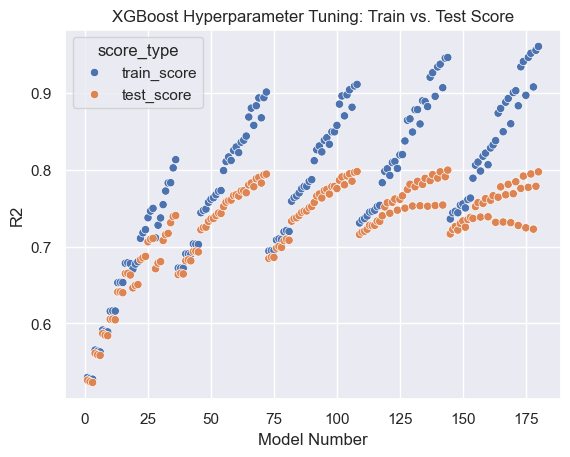

In [393]:
sns.scatterplot(data = gsCV_xgb_train_vs_test_df.loc[gsCV_xgb_train_vs_test_df['score'] > 0,:], y = 'score', x = 'model_number', hue = 'score_type')
plt.title('XGBoost Hyperparameter Tuning: Train vs. Test Score')
plt.xlabel('Model Number')
plt.ylabel('R2')
plt.show()


In [397]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.799499769792259
Best parameters: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 60, 'subsample': 1}


In [399]:
# Testing colsample_bytree and min_child_weight

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

param = {'learning_rate': [0.3],
         'subsample': [1],
         'colsample_bytree': [0.7, 0.8, 0.9],
         'n_estimators': [60, 80, 100],
         'max_depth':range(4,17,4),
         'min_child_weight':range(1,6,2)
        }

gsCV = GridSearchCV(xgb, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_encoded, np.log(y_train_encoded))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.3], 'max_depth': range(4, 17, 4),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [60, 80, 100], 'subsample': [1]},
             return_train_score=True)

In [400]:
gsCV_xgb_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_xgb_train_vs_test_df['model_number'] = gsCV_xgb_train_vs_test_df['model_number'] + 1
gsCV_xgb_train_vs_test_df['score_difference'] = gsCV_xgb_train_vs_test_df['train_score'] - gsCV_xgb_train_vs_test_df['test_score']

gsCV_xgb_train_vs_test_df = gsCV_xgb_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_xgb_train_vs_test_df


model_number  score_difference   score_type     score
0               1          0.032523  train_score  0.785654
1               2          0.037632  train_score  0.797643
2               3          0.042778  train_score  0.807831
3               4          0.032927  train_score  0.786310
4               5          0.038903  train_score  0.798385
5               6          0.044342  train_score  0.809185
6               7          0.032044  train_score  0.785772
7               8          0.037198  train_score  0.797395
8               9          0.042352  train_score  0.807267
9              10          0.118992  train_score  0.914684
10             11          0.130484  train_score  0.930766
11             12          0.139932  train_score  0.943231
12             13          0.118602  train_score  0.913023
13             14          0.129464  train_score  0.928208
14             15          0.138375  train_score  0.940218
15             16          0.113375  train_score  0.908831
16             17          0.125179  train_score  0.925110
17             18          0.133952  train_score  0.936113
18             19          0.172685  train_score  0.985793
19             20          0.176560  train_score  0.990503
20             21          0.178611  train_score  0.993071
21             22          0.170164  train_score  0.980986
22             23          0.174289  train_score  0.986571
23             24          0.176820  train_score  0.989747
24             25          0.167429  train_score  0.975580
25             26          0.172780  train_score  0.982060
26             27          0.175988  train_score  0.986215
27             28          0.189711  train_score  0.996027
28             29          0.190314  train_score  0.996371
29             30          0.190574  train_score  0.996472
30             31          0.186991  train_score  0.994089
31             32          0.188138  train_score  0.995267
32             33          0.188921  train_score  0.995839
33             34          0.183907  train_score  0.990930
34             35          0.185928  train_score  0.993249
35             36          0.187289  train_score  0.994490
36             37          0.033267  train_score  0.786288
37             38          0.037959  train_score  0.797670
38             39          0.043244  train_score  0.807867
39             40          0.033768  train_score  0.786603
40             41          0.039519  train_score  0.798985
41             42          0.045555  train_score  0.808920
42             43          0.034016  train_score  0.786285
43             44          0.039945  train_score  0.797803
44             45          0.045495  train_score  0.808355
45             46          0.123783  train_score  0.919850
46             47          0.134030  train_score  0.934879
47             48          0.142895  train_score  0.946132
48             49          0.121188  train_score  0.914824
49             50          0.131553  train_score  0.930119
50             51          0.140255  train_score  0.941698
51             52          0.117674  train_score  0.912196
52             53          0.127850  train_score  0.926709
53             54          0.136103  train_score  0.938090
54             55          0.177590  train_score  0.986922
55             56          0.181052  train_score  0.990969
56             57          0.183258  train_score  0.993357
57             58          0.175050  train_score  0.982403
58             59          0.178888  train_score  0.987443
59             60          0.181332  train_score  0.990575
60             61          0.170034  train_score  0.976601
61             62          0.174810  train_score  0.982691
62             63          0.178015  train_score  0.986751
63             64          0.191500  train_score  0.996076
64             65          0.192045  train_score  0.996389
65             66          0.192300  train_score  0.996485
66             67          0.188483  train_score  0.

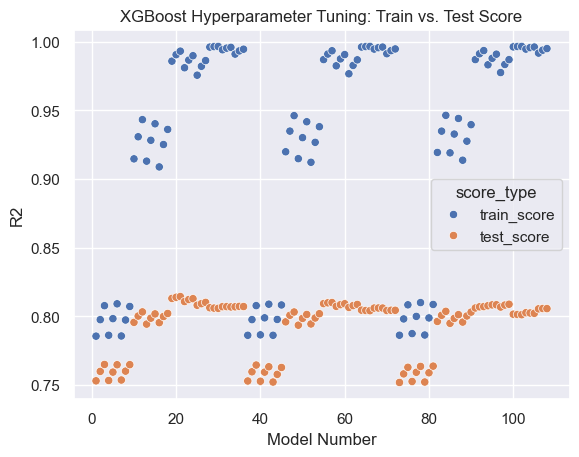

In [401]:
sns.scatterplot(data = gsCV_xgb_train_vs_test_df.loc[gsCV_xgb_train_vs_test_df['score'] > 0,:], y = 'score', x = 'model_number', hue = 'score_type')
plt.title('XGBoost Hyperparameter Tuning: Train vs. Test Score')
plt.xlabel('Model Number')
plt.ylabel('R2')
plt.show()


In [402]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.8144602224951729
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}


In [407]:
xgb.set_params(
    colsample_bytree = 0.7,
    min_child_weight = 1,
    learning_rate = 0.3, 
    max_depth = 12, 
    subsample = 1, 
    n_estimators = 100)
xgb.fit(X = X_train_encoded, y = np.log(y_train_encoded))
print('Best train score: ' + str(xgb.score(X = X_train_encoded,y = np.log(y_train_encoded))))
print('Best test score: ' + str(xgb.score(X = X_test_encoded,y = np.log(y_test_encoded))))


Best train score: 0.9908335452929184
Best test score: 0.8250726289786572


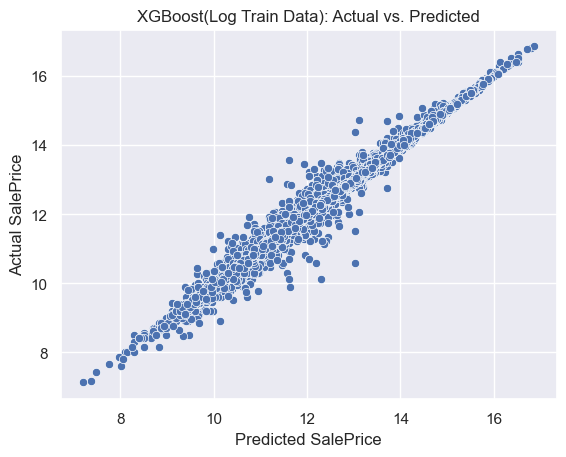

In [409]:
sns.scatterplot(x = xgb.predict(X_train_encoded), y = np.log(y_train_encoded))
plt.title('XGBoost(Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

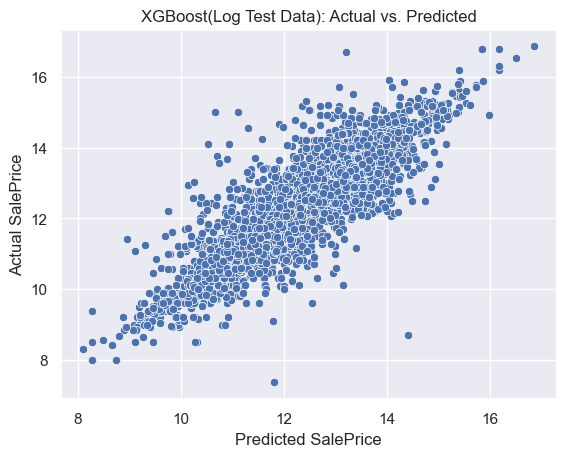

In [411]:
sns.scatterplot(x = xgb.predict(X_test_encoded), y = np.log(y_test_encoded))
plt.title('XGBoost(Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

# XGBoost - Post Tuning - Cross Validation


In [415]:

xgb = XGBRegressor(objective ='reg:squarederror', 
                   random_state=0, 
                   colsample_bytree = 0.7,
                   min_child_weight = 1,
                   learning_rate = 0.3, 
                   max_depth = 12, 
                   subsample = 1, 
                   n_estimators = 100)

xgb_encoded_cv_tuned_r2 = cross_val_score(estimator = xgb, X = features_encoded, y = np.log(response), cv = kf, scoring = 'r2')
xgb_encoded_cv_tuned_mae = cross_val_score(estimator = xgb, X = features_encoded, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_error')
xgb_encoded_cv_tuned_rmse = cross_val_score(estimator = xgb, X = features_encoded, y = np.log(response), cv = kf, scoring = 'neg_root_mean_squared_error')
xgb_encoded_cv_tuned_mape = cross_val_score(estimator = xgb, X = features_encoded, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_percentage_error')


In [416]:

print('Mean cross-validation score: ' + str(xgb_encoded_cv_tuned_r2.mean()))
print('Std dev cross-validation score: ' + str(xgb_encoded_cv_tuned_r2.std()))

Mean cross-validation score: 0.825538980960846
Std dev cross-validation score: 0.004461439726535287


In [417]:

print('Mean cross-validation score: ' + str((xgb_encoded_cv_tuned_mae * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_tuned_mae * -1).std()))

Mean cross-validation score: 0.32290770606308045
Std dev cross-validation score: 0.003741783136438726


In [418]:

print('Mean cross-validation score: ' + str((xgb_encoded_cv_tuned_rmse * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_tuned_rmse * -1).std()))

Mean cross-validation score: 0.5378338666119733
Std dev cross-validation score: 0.008391026539246966


In [419]:

print('Mean cross-validation score: ' + str((xgb_encoded_cv_tuned_mape * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_tuned_mape * -1).std()))

Mean cross-validation score: 0.026556816648514236
Std dev cross-validation score: 0.00029730405867661275


In [420]:
xgb_encoded_cv_tuned_mae = xgb_encoded_cv_tuned_mae * -1
xgb_encoded_cv_tuned_rmse = xgb_encoded_cv_tuned_rmse * -1
xgb_encoded_cv_tuned_mape = xgb_encoded_cv_tuned_mape * -1

# No Zip

## XGBoost - No Zip - Base Model - Cross Validation

In [429]:

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

xgb_encoded_cv_nozip_r2 = cross_val_score(estimator = xgb, X = features_encoded_nozip, y = np.log(response), cv = kf, scoring = 'r2')
xgb_encoded_cv_nozip_mae = cross_val_score(estimator = xgb, X = features_encoded_nozip, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_error')
xgb_encoded_cv_nozip_rmse = cross_val_score(estimator = xgb, X = features_encoded_nozip, y = np.log(response), cv = kf, scoring = 'neg_root_mean_squared_error')
xgb_encoded_cv_nozip_mape = cross_val_score(estimator = xgb, X = features_encoded_nozip, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_percentage_error')



In [430]:

print('Mean cross-validation score: ' + str(xgb_encoded_cv_nozip_r2.mean()))
print('Std dev cross-validation score: ' + str(xgb_encoded_cv_nozip_r2.std()))

print('Mean cross-validation score: ' + str((xgb_encoded_cv_nozip_mae * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_nozip_mae * -1).std()))

print('Mean cross-validation score: ' + str((xgb_encoded_cv_nozip_rmse * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_nozip_rmse * -1).std()))

print('Mean cross-validation score: ' + str((xgb_encoded_cv_nozip_mape * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_nozip_mape * -1).std()))

Mean cross-validation score: 0.7915182471275329
Std dev cross-validation score: 0.004567724139400799
Mean cross-validation score: 0.4041747533576716
Std dev cross-validation score: 0.003526530119184977
Mean cross-validation score: 0.5879348000013789
Std dev cross-validation score: 0.006981275521489684
Mean cross-validation score: 0.03351994010695778
Std dev cross-validation score: 0.00031933876780738946


## XGBoost - No Zip - Hyperparameter Tuning

In [434]:
xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

param = {'learning_rate': [0.033, 0.1, 0.133, 0.3, 0.4],
         'subsample': [0.3, 0.6, 1],
         'n_estimators': [40, 50, 60],
         'max_depth':range(3,10,2)
        }

gsCV = GridSearchCV(xgb, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_encoded_nozip, np.log(y_train_encoded_nozip))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.033, 0.1, 0.133, 0.3, 0.4],
                         'max_depth': range(3, 10, 2),
                         'n_estimators': [40, 50, 60],
                         'subsample': [0.3, 0.6, 1]},
             return_train_score=True)

In [435]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.8014252421847772
Best parameters: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 60, 'subsample': 1}


In [438]:
xgb.set_params(learning_rate = 0.3, max_depth = 9, subsample = 1, n_estimators = 60)
xgb.fit(X = X_train_encoded_nozip, y = np.log(y_train_encoded_nozip))
print('Best train score: ' + str(xgb.score(X = X_train_encoded_nozip,y = np.log(y_train_encoded_nozip))))
print('Best test score: ' + str(xgb.score(X = X_test_encoded_nozip,y = np.log(y_test_encoded_nozip))))


Best train score: 0.9399504503132262
Best test score: 0.8063251195246812


In [440]:
# Testing colsample_bytree and min_child_weight

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

param = {'learning_rate': [0.3],
         'subsample': [1],
         'colsample_bytree': [0.7, 0.8, 0.9],
         'n_estimators': [60, 80, 100],
         'max_depth':range(4,17,4),
         'min_child_weight':range(1,6,2)
        }


gsCV = GridSearchCV(xgb, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_encoded_nozip, np.log(y_train_encoded_nozip))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.3], 'max_depth': range(4, 17, 4),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [60, 80, 100], 'subsample': [1]},
             return_train_score=True)

In [441]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.8111741634140902
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}


In [446]:
xgb.set_params(
    learning_rate = 0.3,
    #subsample = 1,
    colsample_bytree = 0.8,
    min_child_weight = 3,
    max_depth = 12, 
    subsample = 1, 
    n_estimators = 100)
xgb.fit(X = X_train_encoded_nozip, y = np.log(y_train_encoded_nozip))
print('Best train score: ' + str(xgb.score(X = X_train_encoded_nozip,y = np.log(y_train_encoded_nozip))))
print('Best test score: ' + str(xgb.score(X = X_test_encoded_nozip,y = np.log(y_test_encoded_nozip))))


Best train score: 0.9885310858572226
Best test score: 0.820487886264781


## XGBoost - No Zip - Post Tuning - Cross Validation

In [449]:

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0, 
                   learning_rate = 0.3,
                   #subsample = 1,
                   colsample_bytree = 0.8,
                   min_child_weight = 3,
                   max_depth = 12, 
                   subsample = 1, 
                   n_estimators = 100           
                  )

xgb_encoded_cv_tuned_nozip_r2 = cross_val_score(estimator = xgb, X = features_encoded_nozip, y = np.log(response), cv = kf, scoring = 'r2')
xgb_encoded_cv_tuned_nozip_mae = cross_val_score(estimator = xgb, X = features_encoded_nozip, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_error')
xgb_encoded_cv_tuned_nozip_rmse = cross_val_score(estimator = xgb, X = features_encoded_nozip, y = np.log(response), cv = kf, scoring = 'neg_root_mean_squared_error')
xgb_encoded_cv_tuned_nozip_mape = cross_val_score(estimator = xgb, X = features_encoded_nozip, y = np.log(response), cv = kf, scoring = 'neg_mean_absolute_percentage_error')


In [450]:

print('Mean cross-validation score: ' + str(xgb_encoded_cv_tuned_nozip_r2.mean()))
print('Std dev cross-validation score: ' + str(xgb_encoded_cv_tuned_nozip_r2.std()))

print('Mean cross-validation score: ' + str((xgb_encoded_cv_tuned_nozip_mae * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_tuned_nozip_mae * -1).std()))

print('Mean cross-validation score: ' + str((xgb_encoded_cv_tuned_nozip_rmse * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_tuned_nozip_rmse * -1).std()))

print('Mean cross-validation score: ' + str((xgb_encoded_cv_tuned_nozip_mape * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_encoded_cv_tuned_nozip_mape * -1).std()))

Mean cross-validation score: 0.8245045900344848
Std dev cross-validation score: 0.0030017473477704022
Mean cross-validation score: 0.32944557361478444
Std dev cross-validation score: 0.003987291284490725
Mean cross-validation score: 0.539443780738315
Std dev cross-validation score: 0.0061182825360649624
Mean cross-validation score: 0.0271289112248441
Std dev cross-validation score: 0.00032488174479751637


In [451]:
xgb_encoded_cv_tuned_nozip_mae = xgb_encoded_cv_tuned_nozip_mae * -1
xgb_encoded_cv_tuned_nozip_rmse = xgb_encoded_cv_tuned_nozip_rmse * -1
xgb_encoded_cv_tuned_nozip_mape = xgb_encoded_cv_tuned_nozip_mape * -1

# Time Trials for Models

In [457]:
import time

i = 1
xgb_times = []

xgb.set_params(
    learning_rate = 0.3,
    #subsample = 1,
    colsample_bytree = 0.8,
    min_child_weight = 3,
    max_depth = 12, 
    subsample = 1, 
    n_estimators = 100)

while i <= 5:
    start = time.time()

    xgb.fit(X = features_encoded, y = np.log(response))
    
    end = time.time()
    
    xgb_time = end - start
    xgb_times.append(xgb_time)
    
    i = i + 1

xgb_times

[1.05342698097229,
 1.2617461681365967,
 1.0318241119384766,
 1.0331988334655762,
 1.0563499927520752]

In [459]:
i = 1
xgb_times_nozip = []

xgb.set_params(
    learning_rate = 0.3,
    #subsample = 1,
    colsample_bytree = 0.8,
    min_child_weight = 3,
    max_depth = 12, 
    subsample = 1, 
    n_estimators = 100)

while i <= 5:
    start = time.time()

    xgb.fit(X = features_encoded_nozip, y = np.log(response))
    
    end = time.time()
    
    xgb_time = end - start
    xgb_times_nozip.append(xgb_time)
    
    i = i + 1

xgb_times_nozip

[1.015259027481079,
 0.9852631092071533,
 0.9611692428588867,
 0.998140811920166,
 0.9673829078674316]

# Model Results

In [462]:
xgb_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                     'Model Durations': xgb_times,
                                      'XGBoost_Encoded R2': xgb_encoded_cv_tuned_r2,
                                      'XGBoost_Encoded MAE': xgb_encoded_cv_tuned_mae,
                                      'XGBoost_Encoded RMSE': xgb_encoded_cv_tuned_rmse,
                                      'XGBoost_Encoded MAPE': xgb_encoded_cv_tuned_mape  
                                     }
                             )

xgb_results

Model Number  Model Durations  XGBoost_Encoded R2  XGBoost_Encoded MAE  XGBoost_Encoded RMSE  XGBoost_Encoded MAPE
0           1.0         1.053427            0.824908             0.321318              0.538359              0.026396
1           2.0         1.261746            0.831726             0.316477              0.526532              0.026052
2           3.0         1.031824            0.829389             0.323950              0.530724              0.026689
3           4.0         1.033199            0.819891             0.326984              0.549380              0.026850
4           5.0         1.056350            0.821781             0.325810              0.544174              0.026797

In [464]:
xgb_nozip_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                     'Model Durations': xgb_times_nozip,
                                      'XGBoost_Encoded_NoZip R2': xgb_encoded_cv_tuned_nozip_r2,
                                      'XGBoost_Encoded_NoZip MAE': xgb_encoded_cv_tuned_nozip_mae,
                                      'XGBoost_Encoded_NoZip RMSE': xgb_encoded_cv_tuned_nozip_rmse,
                                      'XGBoost_Encoded_NoZip MAPE': xgb_encoded_cv_tuned_nozip_mape  
                                     }
                             )

xgb_nozip_results

Model Number  Model Durations  XGBoost_Encoded_NoZip R2  XGBoost_Encoded_NoZip MAE  XGBoost_Encoded_NoZip RMSE  XGBoost_Encoded_NoZip MAPE
0           1.0         1.015259                  0.824724                   0.326583                    0.538641                    0.026874
1           2.0         0.985263                  0.829376                   0.323024                    0.530196                    0.026623
2           3.0         0.961169                  0.824505                   0.333196                    0.538267                    0.027464
3           4.0         0.998141                  0.819920                   0.332799                    0.549335                    0.027388
4           5.0         0.967383                  0.823997                   0.331625                    0.540779                    0.027295

In [466]:

current_directory = os.getcwd()

dataframes = {'xgb_results': xgb_results,
              'xgb_nozip_results': xgb_nozip_results
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    df.to_csv(file_path, sep='\t', index=False)

# SHAP Analysis

In [471]:
import shap
shap. initjs()

xgb.set_params(learning_rate = 0.3, max_depth = 9, subsample = 1, n_estimators = 60)


shap_model = xgb.fit(X = features_encoded, y = (response))

explainer = shap.TreeExplainer(shap_model)
shap_values = explainer(features_encoded)


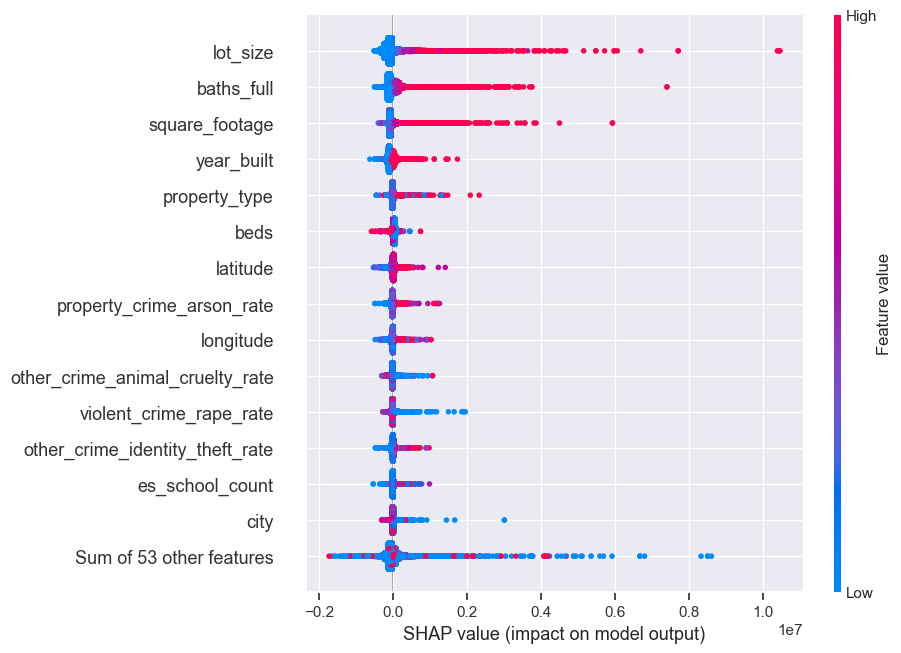

In [475]:
shap.plots.beeswarm(shap_values, max_display = 15)


# Assessing Outlier Removal


In [477]:
# Calculate quantiles and maximum/minimum values for Price

q1 = np.percentile(GA_listings_crime_schools_merged['price'], 25)
q3 = np.percentile(GA_listings_crime_schools_merged['price'], 75)
IQR = q3 - q1

outlier_maximum_level_price = q3 + 1.5*IQR
outlier_minimum_level_price = q1 - 1.5*IQR

print("Maximum level: " + str(outlier_maximum_level_price))
print("Minimum level: " + str(outlier_minimum_level_price))



Maximum level: 1170090.0
Minimum level: -558054.0


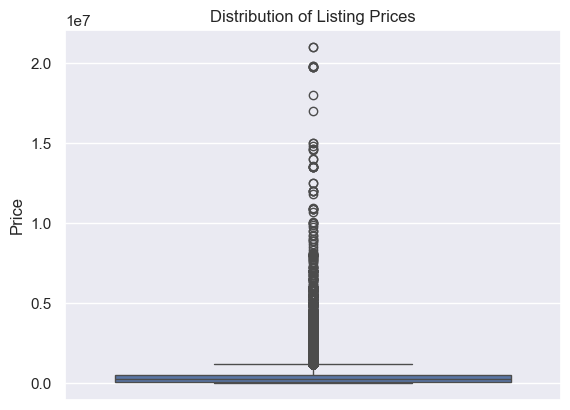

In [479]:
sns.boxplot(data = GA_listings_crime_schools_merged, y = 'price')
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


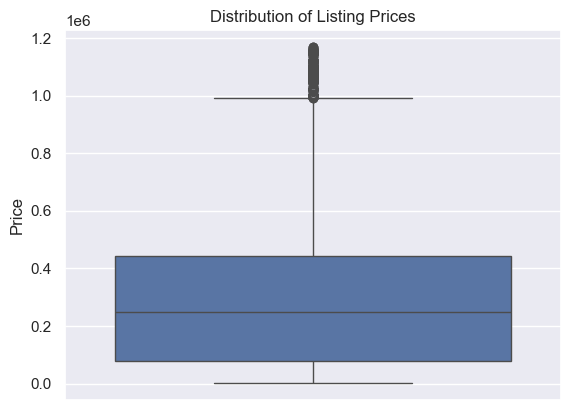

In [481]:
sns.boxplot(data = GA_listings_crime_schools_merged.loc[GA_listings_crime_schools_merged['price'] < outlier_maximum_level, :] , y = 'price')
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


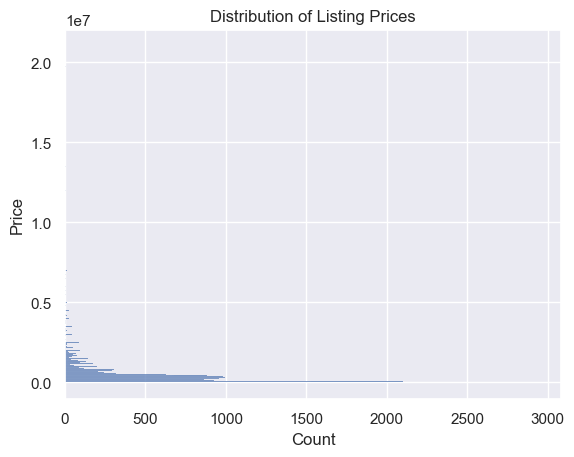

In [483]:
sns.histplot(data = GA_listings_crime_schools_merged, y = 'price', log_scale = False)
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


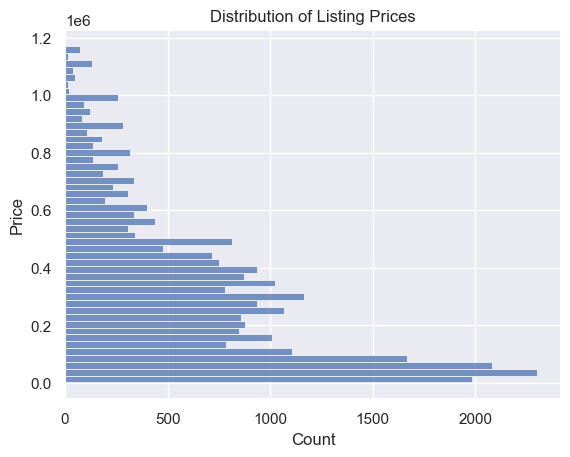

In [485]:
sns.histplot(data = GA_listings_crime_schools_merged.loc[GA_listings_crime_schools_merged['price'] < outlier_maximum_level, :] , y = 'price', log_scale = False)
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


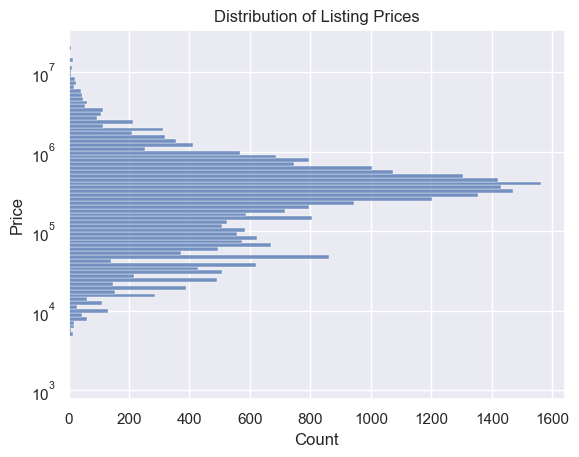

In [487]:
sns.histplot(data = GA_listings_crime_schools_merged, y = 'price', log_scale = True)
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


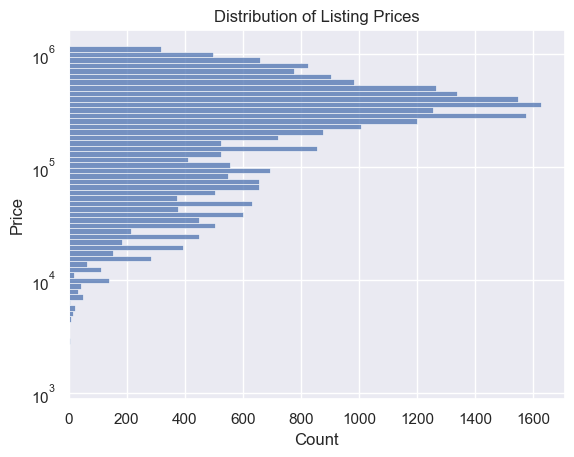

In [489]:
sns.histplot(data = GA_listings_crime_schools_merged.loc[GA_listings_crime_schools_merged['price'] < outlier_maximum_level, :] , y = 'price', log_scale = True)
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


In [491]:
print("Rows removed for Price: ", + GA_listings_crime_schools_merged.loc[GA_listings_crime_schools_merged['price'] > outlier_maximum_level_price, :].shape[0])



Rows removed for Price:  2548


In [493]:
# Removing extremely low log data points due to sparcity

GA_listings_crime_schools_merged = GA_listings_crime_schools_merged[np.log(GA_listings_crime_schools_merged['price']) > 5]

GA_listings_crime_schools_merged.shape

(31005, 76)

In [495]:
# Calculate quantiles and maximum/minimum values for square_footage

q1 = np.percentile(GA_listings_crime_schools_merged['square_footage'], 25)
q3 = np.percentile(GA_listings_crime_schools_merged['square_footage'], 75)
IQR = q3 - q1

outlier_maximum_level_square_footage = q3 + 1.5*IQR
outlier_minimum_level_square_footage = q1 - 1.5*IQR

print("Maximum level: " + str(outlier_maximum_level_square_footage))
print("Minimum level: " + str(outlier_minimum_level_square_footage))



Maximum level: 4430.0
Minimum level: -2658.0


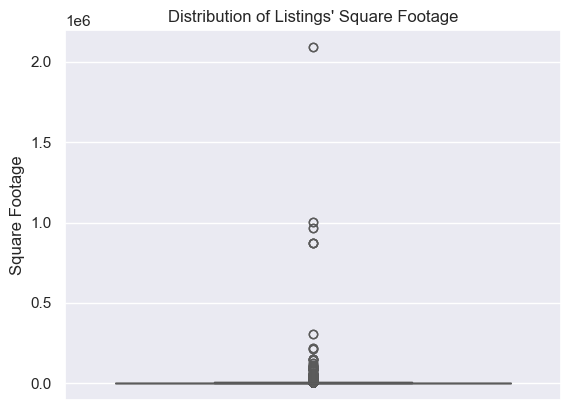

In [499]:
sns.boxplot(data = GA_listings_crime_schools_merged, y = 'square_footage')
plt.ylabel('Square Footage')
plt.title("Distribution of Listings' Square Footage")
plt.show()


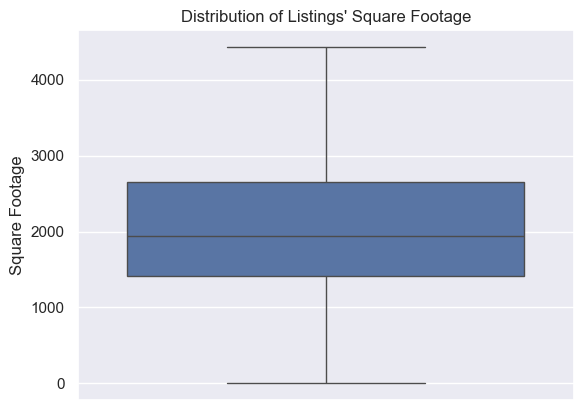

In [501]:
sns.boxplot(data = GA_listings_crime_schools_merged.loc[(GA_listings_crime_schools_merged['square_footage'] < outlier_maximum_level_square_footage) & (GA_listings_crime_schools_merged['square_footage'] > 0), :], y = ('square_footage'))
plt.ylabel('Square Footage')
plt.title("Distribution of Listings' Square Footage")
plt.show()


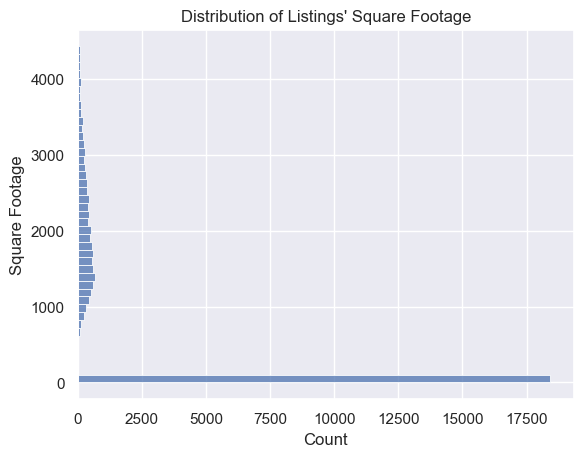

In [505]:
sns.histplot(data = GA_listings_crime_schools_merged.loc[GA_listings_crime_schools_merged['square_footage'] < outlier_maximum_level_square_footage, :], y = 'square_footage', log_scale = False)
plt.ylabel('Square Footage')
plt.title("Distribution of Listings' Square Footage")
plt.show()


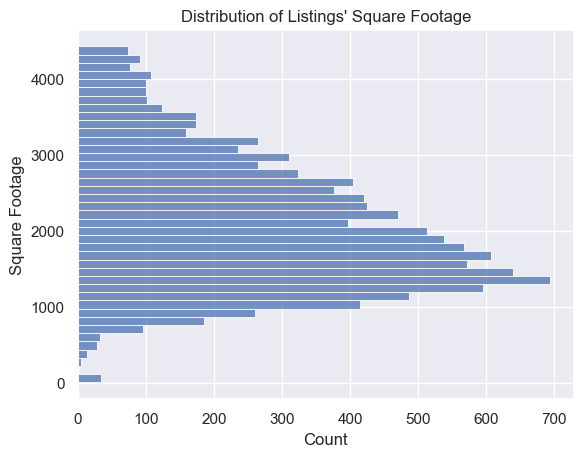

In [507]:
sns.histplot(data = GA_listings_crime_schools_merged.loc[(GA_listings_crime_schools_merged['square_footage'] < outlier_maximum_level_square_footage) & (GA_listings_crime_schools_merged['square_footage'] > 0), :], y = ('square_footage'))
plt.ylabel('Square Footage')
plt.title("Distribution of Listings' Square Footage")
plt.show()


In [509]:
print("Rows removed by Square Footage: " + str(GA_listings_crime_schools_merged.loc[GA_listings_crime_schools_merged['square_footage'] > outlier_maximum_level_square_footage, :].shape[0]))

Rows removed by Square Footage: 1158


In [511]:

GA_listings_crime_schools_merged_outliers = GA_listings_crime_schools_merged.loc[
    (GA_listings_crime_schools_merged['price'] < outlier_maximum_level_price) &
    (GA_listings_crime_schools_merged['square_footage'] < outlier_maximum_level_square_footage),
    :
]

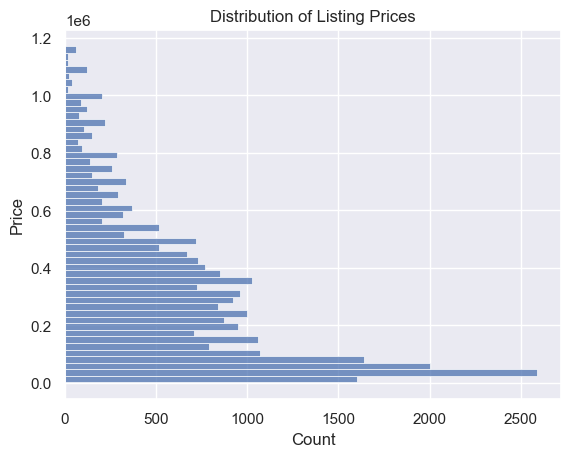

In [513]:
sns.histplot(data = GA_listings_crime_schools_merged_outliers, y = 'price', log_scale = False)
plt.ylabel('Price')
plt.title('Distribution of Listing Prices')
plt.show()


Skewness: 1.03
Kurtosis: 0.578


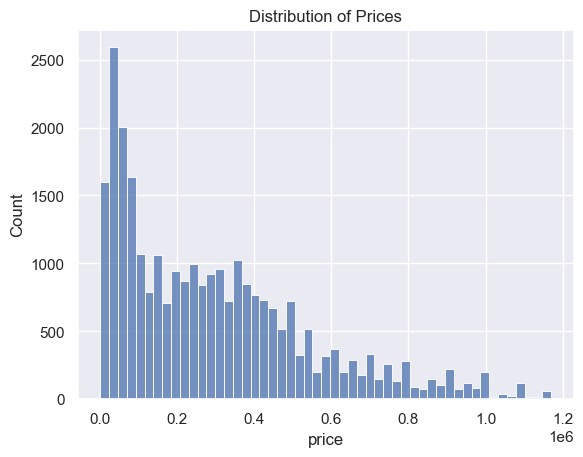

In [515]:

sns.histplot(data = GA_listings_crime_schools_merged_outliers, x = 'price')
plt.title('Distribution of Prices')

print('Skewness: ' + str(round(scipy.stats.skew(GA_listings_crime_schools_merged_outliers['price'], axis=0, bias=True),3)))
print('Kurtosis: ' + str(round(scipy.stats.kurtosis(GA_listings_crime_schools_merged_outliers['price'], axis=0, fisher=True, bias=True),3)))

# Skewness > 0 signifies more weight on the left tail of the distribution, so it is positively skewed.
# Kurtosis > 0 signifies it's a leptokurtic distribution, meaning there's a greater chance of extreme 
# positive or negative values

plt.show()


Skewness: -0.683
Kurtosis: -0.311


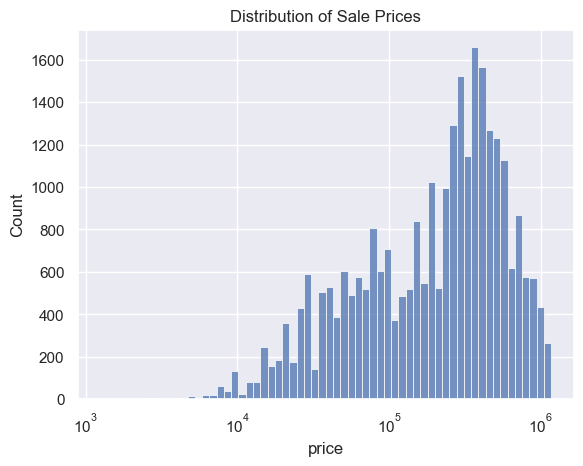

In [517]:

sns.histplot(data = GA_listings_crime_schools_merged_outliers, x = 'price', log_scale = True)
plt.title('Distribution of Sale Prices')

print('Skewness: ' + str(round(scipy.stats.skew(np.log10(GA_listings_crime_schools_merged_outliers['price']), axis=0, bias=True),3)))
print('Kurtosis: ' + str(round(scipy.stats.kurtosis(np.log10(GA_listings_crime_schools_merged_outliers['price']), axis=0, fisher=True, bias=True),3)))

# Skewness > 0 signifies more weight on the left tail of the distribution, so it is positively skewed.
# Kurtosis > 0 signifies it's a leptokurtic distribution, meaning there's a greater chance of extreme 
# positive or negative values
# Overall, both metrics were significantly reduce by getting the log of price

plt.show()

# Feature Reduction

In [520]:
GA_listings_crime_schools_merged_outliers_reduced = GA_listings_crime_schools_merged_outliers.drop(columns = ['home_index', 'full_street_address','details','census_state_name','census_county_name','census_state_abbr','census_zcta5_geoid','census_cbsa_geoid_count'])

GA_listings_crime_schools_merged_outliers_reduced.shape

(27981, 68)

# Multicolinearity


In [523]:
numerical_cols = []

for col in GA_listings_crime_schools_merged_outliers.drop(columns= 'price').columns:
    if str(GA_listings_crime_schools_merged_outliers[col].dtype) == 'float64' or str(GA_listings_crime_schools_merged_outliers[col].dtype) == 'int64':
        numerical_cols.append(col)


sns.heatmap(GA_listings_crime_schools_merged_outliers[numerical_cols].corr())

<Axes: >

In [525]:
correlations = []
corr_threshold = 0.70

for i, col_x in enumerate(GA_listings_crime_schools_merged_outliers[numerical_cols].columns):
    for col_y in GA_listings_crime_schools_merged_outliers[numerical_cols].columns[i+1:]:
        correlation = GA_listings_crime_schools_merged_outliers[numerical_cols][col_x].corr(GA_listings_crime_schools_merged_outliers[numerical_cols][col_y])
        if abs(correlation) >= corr_threshold:
            correlations.append((col_x, col_y, correlation))
        
correlations

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarn

[('beds', 'baths_full', 0.9280742924755837),
 ('beds', 'square_footage', 0.7963905871936012),
 ('beds', 'year_built', 0.8054979770114539),
 ('beds', 'unit_count', 0.7908705887660402),
 ('baths_full', 'square_footage', 0.7871290301048255),
 ('baths_full', 'year_built', 0.7731938959043713),
 ('baths_full', 'unit_count', 0.7544074685099209),
 ('year_built', 'unit_count', 0.7928615466778371),
 ('special_features', 'listing_special_features', 1.0),
 ('violent_crime_total_rate',
  'violent_crime_assault_rate',
  0.9508536039443426),
 ('violent_crime_total_rate',
  'violent_crime_robbery_rate',
  0.8790698624351788),
 ('violent_crime_total_rate', 'violent_crime_rape_rate', 0.7463874899007079),
 ('violent_crime_robbery_rate', 'violent_crime_rape_rate', 0.7070794914250564),
 ('violent_crime_rape_rate', 'violent_crime_murder_rate', 0.8306783535315464),
 ('violent_crime_rape_rate',
  'property_crime_vehicle_theft_rate',
  0.7858116575142856),
 ('violent_crime_rape_rate', 'es_harter_school_count',

# Exploratory Data Analysis


In [530]:
# Cycle through each column, fit an OLS model, and save the R2 value

import statsmodels.api as sm

rsquared_list = []
pvalue_list = []

for col in GA_listings_crime_schools_merged_outliers_reduced.drop(columns = ['price']).columns:
    temp_df = GA_listings_crime_schools_merged_outliers_reduced[[col]]
    if str(GA_listings_crime_schools_merged_outliers_reduced[col].dtype) == 'object':
        temp_df = pd.get_dummies(temp_df, columns=[col], drop_first=True)
        temp_df = temp_df.replace({False: 0, True: 1})
        
    temp_df = sm.add_constant(temp_df)
    model = sm.OLS(GA_listings_crime_schools_merged_outliers_reduced['price'], temp_df).fit()
    rsquared_list.append((col, model.rsquared))  
    pvalue_list.append((col, model.f_pvalue))
    
sorted_rsquared_list = sorted(rsquared_list, key=lambda x: x[1],reverse= True)
sorted_pvalue_list = sorted(pvalue_list, key=lambda x: x[1],reverse= False)

# Create column list for top x% of R2 values

top_percent = 0.25
top_rsquared_list = []

for i in list(range(round(top_percent * len(sorted_rsquared_list)))):
    top_rsquared_list.append(sorted_rsquared_list[i][0])

top_rsquared_list

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/466586941.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df = temp_df.replace({False: 0, True: 1})
/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/466586941.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df = temp_df.replace({False: 0, True: 1})
/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/466586941.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

['zip',
 'baths_full',
 'city',
 'property_type',
 'square_footage',
 'year_built',
 'beds',
 'county_name',
 'unit_count',
 'baths_half',
 'other_crime_grade',
 'overall_crime_grade',
 'violent_crime_grade',
 'es_private_school_count',
 'ms_private_school_count',
 'es_school_count',
 'hs_private_school_count']

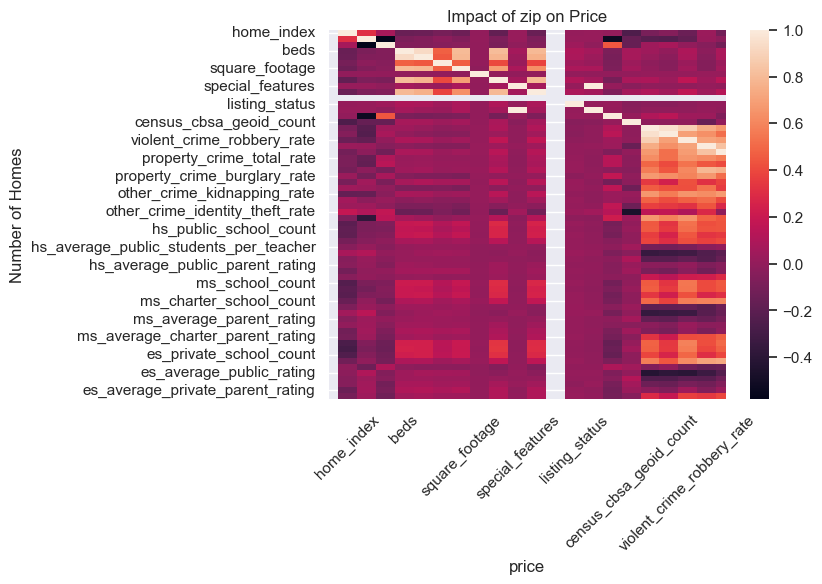

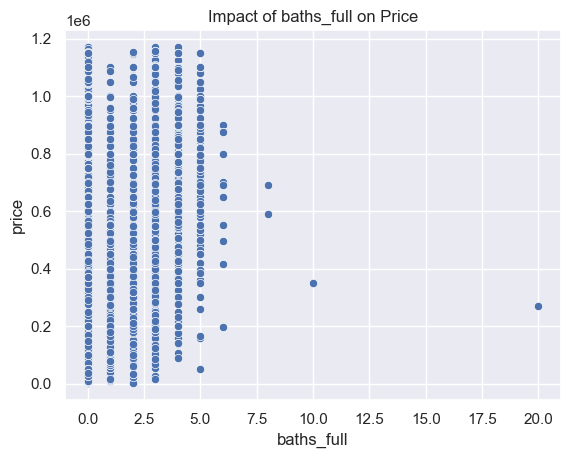

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3529635462.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


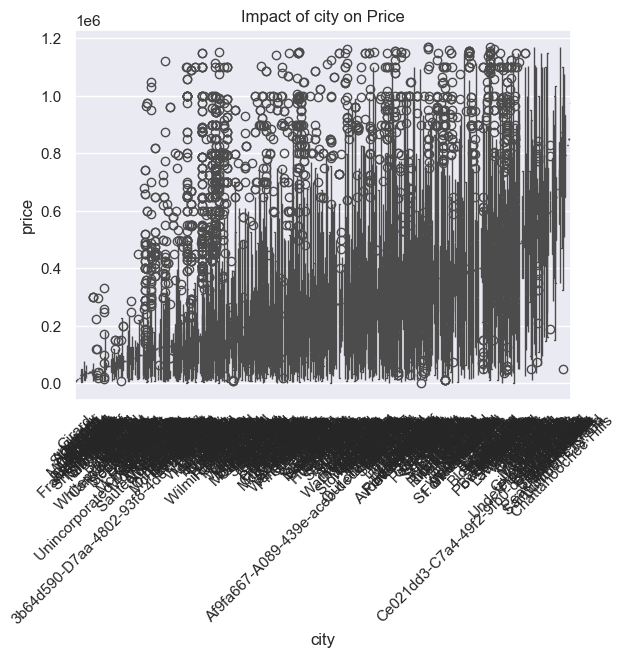

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3529635462.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


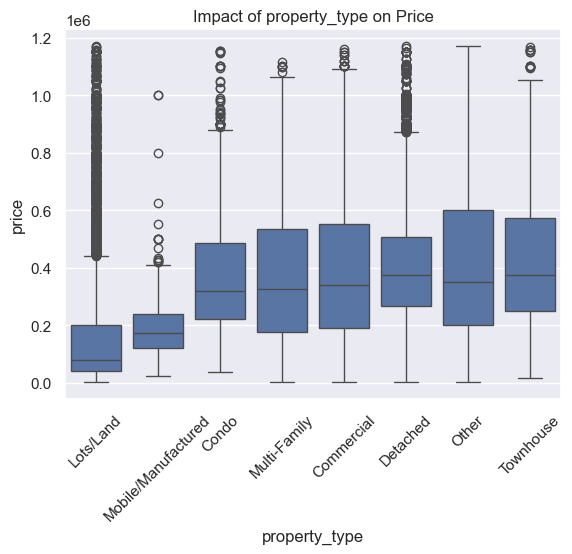

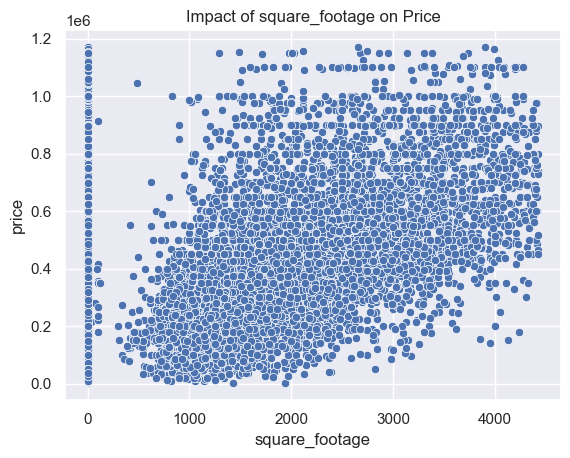

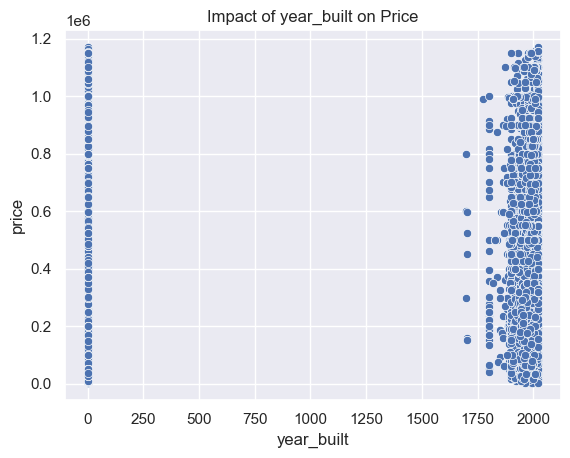

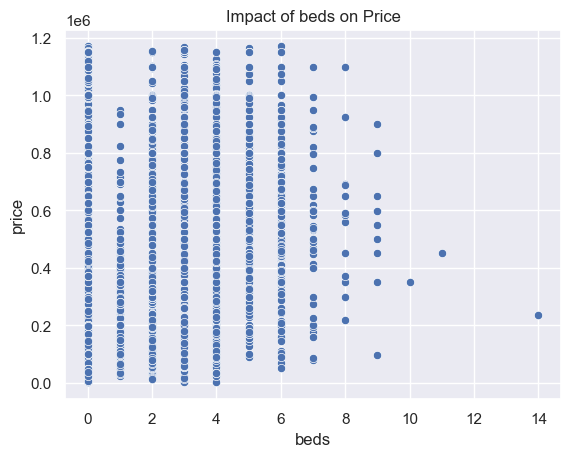

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3529635462.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


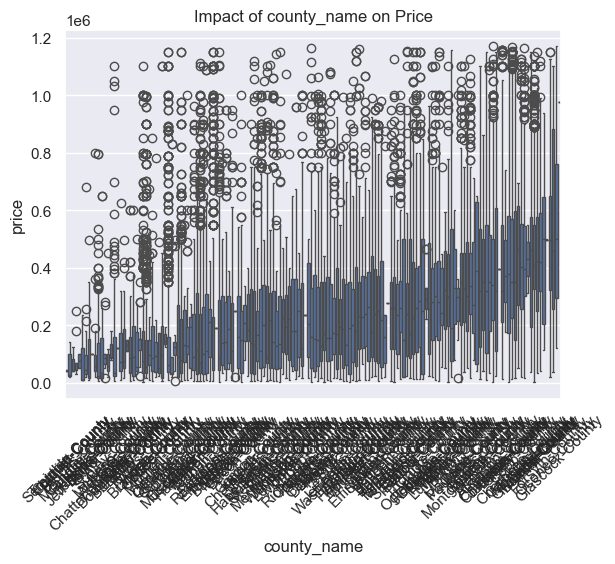

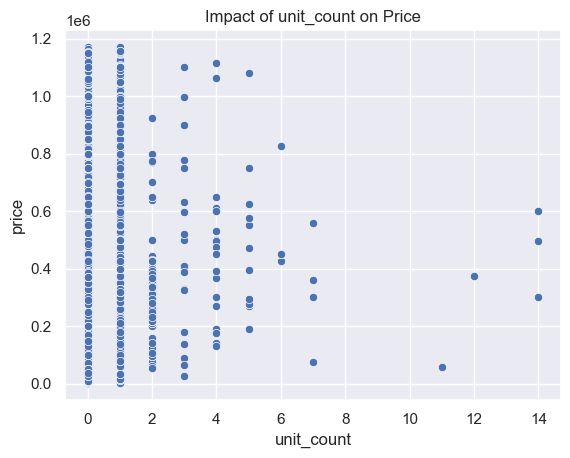

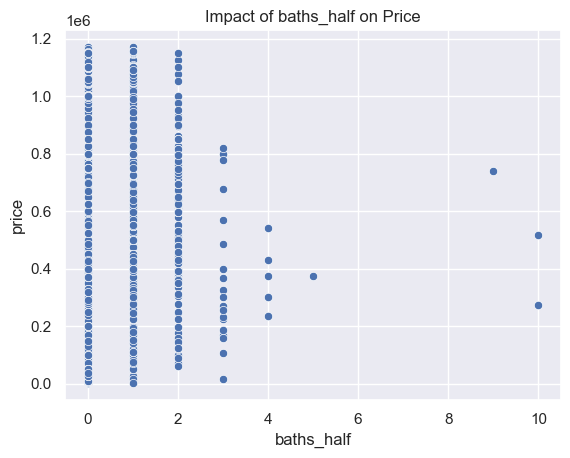

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3529635462.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


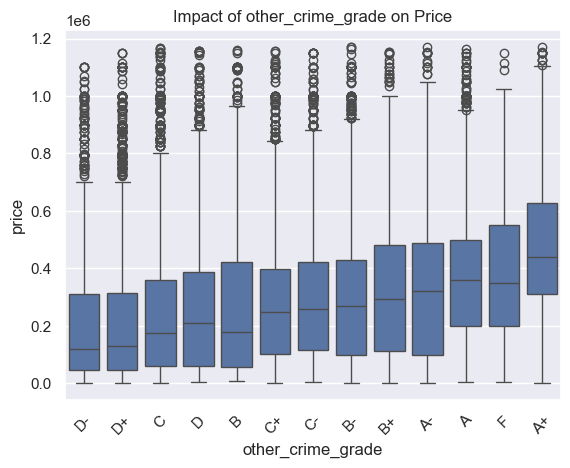

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3529635462.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


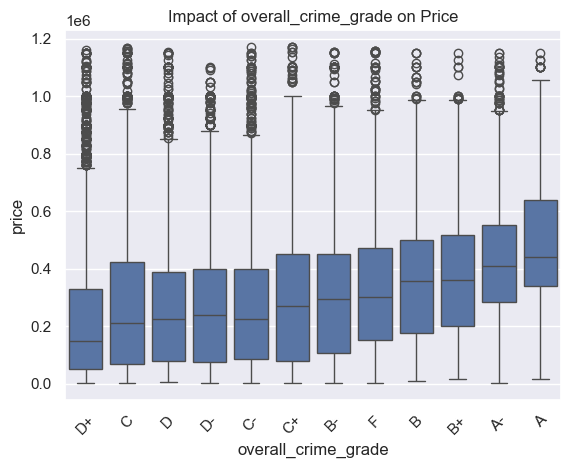

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/3529635462.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


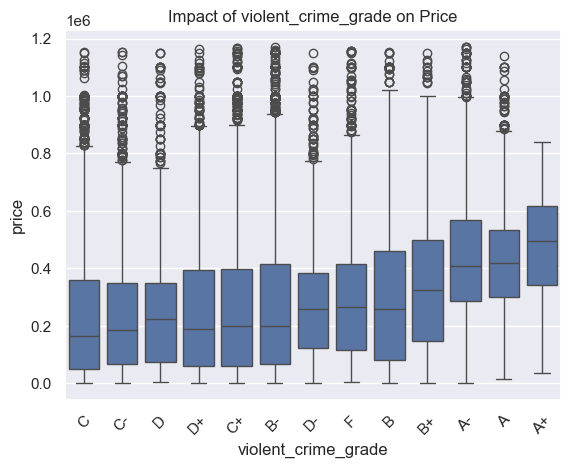

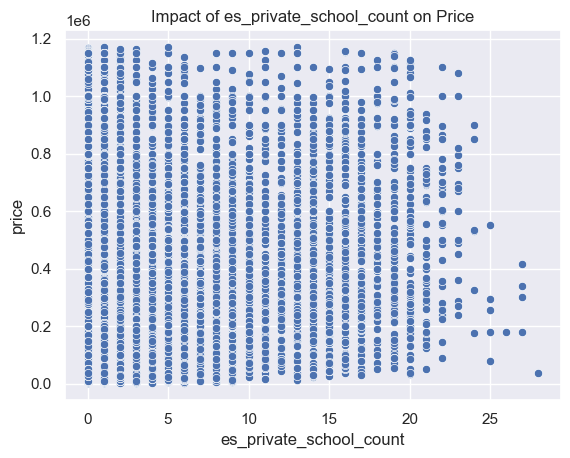

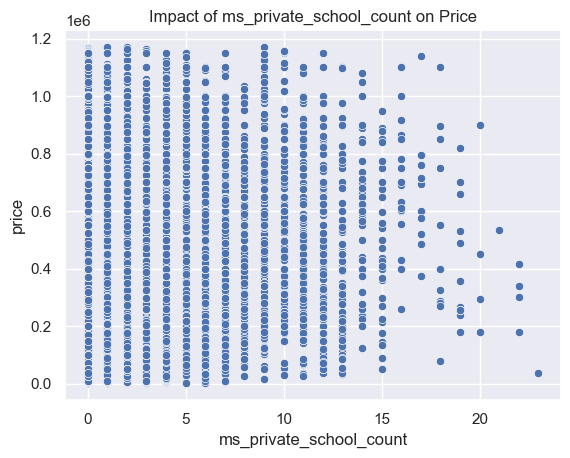

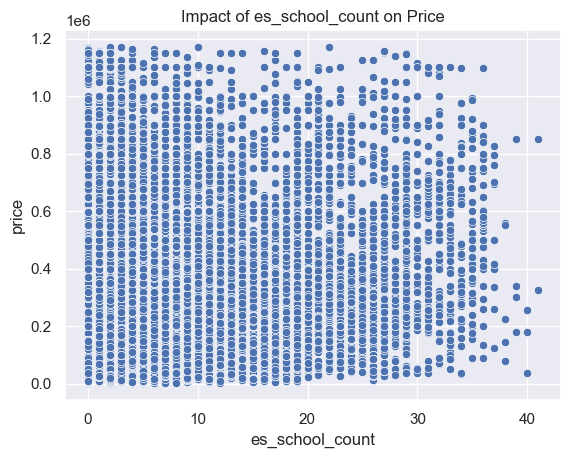

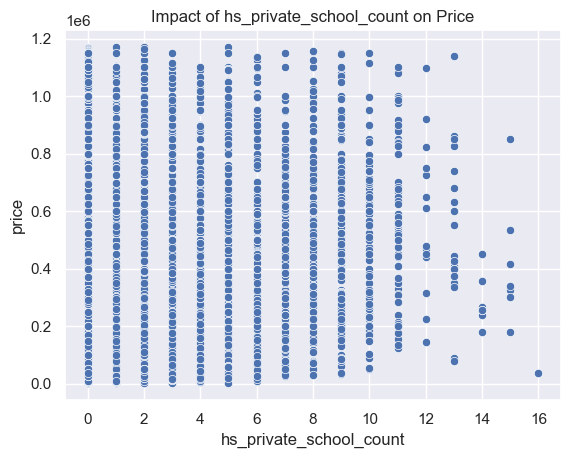

In [531]:
# Looping through top_rsquared_list and creating boxplots for categorical variables and 
# scatterplots for numerical variables

for col in top_rsquared_list:
    if GA_listings_crime_schools_merged_outliers_reduced[col].dtype == 'object':
        temp_df = GA_listings_crime_schools_merged_outliers_reduced.loc[:, [col,'price']]
        sorted_categories = temp_df.groupby(col)['price'].mean().sort_values().index
        temp_df[col] = pd.Categorical(temp_df[col], categories=sorted_categories, ordered=True)
        temp_df_sorted = temp_df.sort_values(by=col)
        plot = sns.boxplot(data = temp_df_sorted, x = col, y = 'price' )
        plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
        plt.title('Impact of ' + col + ' on Price')
        plt.show()
        
    elif GA_listings_crime_schools_merged_outliers_reduced[col].dtype in ['int64', 'float64']:
        temp_df = GA_listings_crime_schools_merged_outliers.loc[:, [col,'price']]
        sns.scatterplot(data = temp_df, x = col, y = 'price' )
        plt.title('Impact of ' + col + ' on Price')
        plt.show()

# Separation of Response and Features


In [535]:
# Create features and response columns for modeling

features_outliers = GA_listings_crime_schools_merged_outliers_reduced.drop(columns = 'price')

response_outliers = GA_listings_crime_schools_merged_outliers_reduced['price']

In [537]:
# Create a no zip code feature dataframe
features_outliers_nozip = features_outliers.drop(columns = 'zip')

# Dummification for Linear Model

In [540]:
#Dummification of Categorical Features

cat_features_outliers = features_outliers.select_dtypes(include=['object'])
cat_features_outliers = pd.get_dummies(data = cat_features_outliers, drop_first = True)
cat_features_outliers = cat_features_outliers.replace({False: 0, True: 1})

# Separating numerical features from dataframe 

num_features_outliers = features_outliers.select_dtypes(include=['int64', 'float64'])
num_features_outliers.shape

# Concatenating dummified categorical features with numerical features

features_outliers_dum_drop = pd.concat([cat_features_outliers, num_features_outliers],axis = 1)
features_outliers_dum_drop.shape

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/2763978967.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_features_outliers = cat_features_outliers.replace({False: 0, True: 1})


(27981, 1408)

In [541]:
#Dummification of Categorical Features for No Zip Dataframe

cat_features_outliers_nozip = features_outliers_nozip.select_dtypes(include=['object'])
cat_features_outliers_nozip = pd.get_dummies(data = cat_features_outliers_nozip, drop_first = True)
cat_features_outliers_nozip = cat_features_outliers_nozip.replace({False: 0, True: 1})

# Separating numerical features from dataframe 

num_features_outliers_nozip = features_outliers_nozip.select_dtypes(include=['int64', 'float64'])
num_features_outliers_nozip.shape

# Concatenating dummified categorical features with numerical features

features_outliers_dum_drop_nozip = pd.concat([cat_features_outliers_nozip, num_features_outliers_nozip],axis = 1)
features_outliers_dum_drop_nozip.shape

/var/folders/y7/3944zvgd1vl909042ycfg4fw0000gn/T/ipykernel_2216/2112046009.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_features_outliers_nozip = cat_features_outliers_nozip.replace({False: 0, True: 1})


(27981, 824)

In [542]:
features_outliers_dum_drop.head()

city_Abbeville  city_Acworth  city_Adairsville  city_Adrian  city_Af9fa667-A089-439e-aceb-dece9bbc6457  city_Alamo  city_Alanta  city_Albany  city_Allenhurst  city_Alma  city_Alpharetta  city_Alto  city_Americus  city_Appling  city_Arabi  city_Aragon  city_Arcade  city_Arlington  city_Armuchee  city_Arnoldsville  city_Ashburn  city_Athens  city_Atlanta  city_Attapulgus  city_Auburn  city_Augusta  city_Austell  city_Avalon  city_Avera  city_Avondale Estates  city_Baconton  city_Bainbridge  city_Baldwin  city_Ball Ground  city_Ballground  city_Barnesville  city_Bartow  city_Baxley  city_Berkeley Lake  city_Bethlehem  city_Big Canoe  city_Bishop  city_Blackshear  city_Blairesville  city_Blairsville  city_Blakely  city_Blalirsville  city_Bloomingdale  city_Blue Ridge  city_Bogart  city_Bonaire  city_Bowdon  city_Bowersville  city_Bowman  city_Box Springs  city_Braselton  city_Braswell  city_Bremen  city_Bridgeboro  city_Brookhaven  city_Brooklet  city_Brooks  city_Brunswick  \
0               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                0                  0                 0             0                  0                  0                0            0             0            0                 0            0                 0               0              0            0                0                0              0            0               0   
1               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                0                  0                 0             0                  0                  0                0            0             0            0                 0            0                 0               0              0            0                0                0              0            0               0   
2               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                0                  0                 0             0                  0                  0                0            0             0            0                 0            0                 0               0              0            0                0                0              0            0               0   
3               0             0        

In [543]:
features_outliers_dum_drop_nozip.head()

city_Abbeville  city_Acworth  city_Adairsville  city_Adrian  city_Af9fa667-A089-439e-aceb-dece9bbc6457  city_Alamo  city_Alanta  city_Albany  city_Allenhurst  city_Alma  city_Alpharetta  city_Alto  city_Americus  city_Appling  city_Arabi  city_Aragon  city_Arcade  city_Arlington  city_Armuchee  city_Arnoldsville  city_Ashburn  city_Athens  city_Atlanta  city_Attapulgus  city_Auburn  city_Augusta  city_Austell  city_Avalon  city_Avera  city_Avondale Estates  city_Baconton  city_Bainbridge  city_Baldwin  city_Ball Ground  city_Ballground  city_Barnesville  city_Bartow  city_Baxley  city_Berkeley Lake  city_Bethlehem  city_Big Canoe  city_Bishop  city_Blackshear  city_Blairesville  city_Blairsville  city_Blakely  city_Blalirsville  city_Bloomingdale  city_Blue Ridge  city_Bogart  city_Bonaire  city_Bowdon  city_Bowersville  city_Bowman  city_Box Springs  city_Braselton  city_Braswell  city_Bremen  city_Bridgeboro  city_Brookhaven  city_Brooklet  city_Brooks  city_Brunswick  \
0               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                0                  0                 0             0                  0                  0                0            0             0            0                 0            0                 0               0              0            0                0                0              0            0               0   
1               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                0                  0                 0             0                  0                  0                0            0             0            0                 0            0                 0               0              0            0                0                0              0            0               0   
2               0             0                 0            0                                          0           0            0            0                0          0                0          0              0             0           0            0            0               0              0                  0             0            0             0                0            0             0             0            0           0                      0              0                0             0                 0                0                 0            0            0                   0               0               0            0                0                  0                 0             0                  0                  0                0            0             0            0                 0            0                 0               0              0            0                0                0              0            0               0   
3               0             0        

# LabelEncoding and OrdinalEncoding

In [545]:
features_outliers.select_dtypes(include=['object']).head()

city    county_name    zip property_type overall_crime_grade violent_crime_grade property_crime_grade other_crime_grade
0    Quitman  Brooks-County  31643     Lots/Land                  D-                   D                   D-                D+
1    Quitman  Brooks-County  31643      Detached                  D-                   D                   D-                D+
2   Woodbine  Camden-County  31569      Detached                  D+                  C+                   D-                B+
3  Kingsland  Camden-County  31548     Townhouse                  B-                  C-                   C+                B+
4  Kingsland  Camden-County  31548      Detached                  B-                  C-                   C+                B+

In [546]:
features_outliers_encoded = features_outliers.copy()
features_outliers_encoded_nozip = features_outliers_nozip.copy()

In [547]:
# OrdinalEncoding for crime grades

from sklearn.preprocessing import OrdinalEncoder

grade_order = [['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
              ['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
              ['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
              ['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']]

grades_ord_enc = OrdinalEncoder(categories= grade_order)

features_outliers_encoded[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']] = grades_ord_enc.fit_transform(features_outliers_encoded[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']])
features_outliers_encoded_nozip[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']] = grades_ord_enc.fit_transform(features_outliers_encoded_nozip[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']])

In [548]:
features_outliers_encoded[['overall_crime_grade', 'violent_crime_grade', 'property_crime_grade', 'other_crime_grade']].head()

overall_crime_grade  violent_crime_grade  property_crime_grade  other_crime_grade
0                  1.0                  2.0                   1.0                3.0
1                  1.0                  2.0                   1.0                3.0
2                  3.0                  6.0                   1.0                9.0
3                  7.0                  4.0                   6.0                9.0
4                  7.0                  4.0                   6.0                9.0

In [549]:
# LabelEncoding remaining categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

nominal_columns = ['city','county_name', 'property_type']

for col in nominal_columns:
    features_outliers_encoded[col] = le.fit_transform(features_outliers_encoded[col])
    features_outliers_encoded_nozip[col] = le.fit_transform(features_outliers_encoded_nozip[col])



In [559]:
print(features_outliers_encoded.shape)
print(features_outliers_encoded_nozip.shape)


(27981, 67)
(27981, 66)


In [561]:
features_outliers_encoded.head()

latitude  longitude  city  county_name  beds  baths_full  baths_half  square_footage  lot_size  year_built  special_features  unit_count  transaction_type  listing_status  listing_special_features    zip  property_type  overall_crime_grade  violent_crime_grade  violent_crime_total_rate  violent_crime_assault_rate  violent_crime_robbery_rate  violent_crime_rape_rate  violent_crime_murder_rate  property_crime_grade  property_crime_total_rate  property_crime_theft_rate  property_crime_vehicle_theft_rate  property_crime_burglary_rate  property_crime_arson_rate  other_crime_grade  other_crime_total_rate  other_crime_kidnapping_rate  other_crime_drug_crimes_rate  other_crime_vandalism_rate  other_crime_identity_theft_rate  other_crime_animal_cruelty_rate  hs_school_count  hs_public_school_count  hs_private_school_count  hs_charter_school_count  hs_average_public_students_per_teacher  hs_average_public_rating  hs_average_parent_rating  hs_average_public_parent_rating  \
0  30.725605 -83.671772   388           13   0.0         0.0         0.0             0.0      4.93         0.0                 0         0.0                 1               0                         0  31643              3                  1.0                  2.0                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   1.0                      38.96                     28.720                              1.422                         8.751                     0.0656                3.0                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                0                       0                        0                        0                               15.955013                  5.234865                   2.65791                         2.293261   
1  30.781796 -83.558475   388           13   3.0         1.0         0.0          1460.0      0.00      1910.0                 0         1.0                 1               1                         0  31643              2                  1.0                  2.0                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   1.0                      38.96                     28.720                              1.422                         8.751                     0.0656                3.0                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                2                       2                        0                        0                               19.500000                  2.500000                   2.00000                         2.000000   
2  30.864096 -81.622765   547           19   3.0         2.0         0.0          1254.0      0.00      1985.0                 0         1.0                 1               1                         0  31569              2                  3.0                  6.0                     2.600                       1.778                      0.5553                   0.2425                     0.0247                   1.0                      32.39                     26.210                              1.025                         5.105                     0.0454                9.0                   5.921                       0.0802                        1.9190                       2.944                           0.9281                           0.0502                0                       0                        0                        0                               15.955013                  5.234865                   2.65791                         2.293261   
3  30.796300 -81.681675   260           19   2.0         2.0         0.0    

In [563]:
features_outliers_encoded_nozip.head()

latitude  longitude  city  county_name  beds  baths_full  baths_half  square_footage  lot_size  year_built  special_features  unit_count  transaction_type  listing_status  listing_special_features  property_type  overall_crime_grade  violent_crime_grade  violent_crime_total_rate  violent_crime_assault_rate  violent_crime_robbery_rate  violent_crime_rape_rate  violent_crime_murder_rate  property_crime_grade  property_crime_total_rate  property_crime_theft_rate  property_crime_vehicle_theft_rate  property_crime_burglary_rate  property_crime_arson_rate  other_crime_grade  other_crime_total_rate  other_crime_kidnapping_rate  other_crime_drug_crimes_rate  other_crime_vandalism_rate  other_crime_identity_theft_rate  other_crime_animal_cruelty_rate  hs_school_count  hs_public_school_count  hs_private_school_count  hs_charter_school_count  hs_average_public_students_per_teacher  hs_average_public_rating  hs_average_parent_rating  hs_average_public_parent_rating  \
0  30.725605 -83.671772   388           13   0.0         0.0         0.0             0.0      4.93         0.0                 0         0.0                 1               0                         0              3                  1.0                  2.0                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   1.0                      38.96                     28.720                              1.422                         8.751                     0.0656                3.0                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                0                       0                        0                        0                               15.955013                  5.234865                   2.65791                         2.293261   
1  30.781796 -83.558475   388           13   3.0         1.0         0.0          1460.0      0.00      1910.0                 0         1.0                 1               1                         0              2                  1.0                  2.0                     4.708                       3.334                      1.0670                   0.2660                     0.0411                   1.0                      38.96                     28.720                              1.422                         8.751                     0.0656                3.0                  14.060                       0.1256                        1.8120                      11.280                           0.7543                           0.0842                2                       2                        0                        0                               19.500000                  2.500000                   2.00000                         2.000000   
2  30.864096 -81.622765   547           19   3.0         2.0         0.0          1254.0      0.00      1985.0                 0         1.0                 1               1                         0              2                  3.0                  6.0                     2.600                       1.778                      0.5553                   0.2425                     0.0247                   1.0                      32.39                     26.210                              1.025                         5.105                     0.0454                9.0                   5.921                       0.0802                        1.9190                       2.944                           0.9281                           0.0502                0                       0                        0                        0                               15.955013                  5.234865                   2.65791                         2.293261   
3  30.796300 -81.681675   260           19   2.0         2.0         0.0          1016.0      0.00      

# Train-Test-Split

In [566]:
# Train_test_split: test dataset is 20% of original dataframe, random_state turned on to ensure reproducibility

from sklearn.model_selection import train_test_split

X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(features_outliers, response_outliers, test_size=0.2, random_state=0)
X_train_outliers_drop, X_test_outliers_drop, y_train_outliers_drop, y_test_outliers_drop = train_test_split(features_outliers_dum_drop, response_outliers, test_size=0.2, random_state=0)
X_train_outliers_encoded, X_test_outliers_encoded, y_train_outliers_encoded, y_test_outliers_encoded = train_test_split(features_outliers_encoded, response_outliers, test_size=0.2, random_state=0)


X_train_outliers_nozip, X_test_outliers_nozip, y_train_outliers_nozip, y_test_outliers_nozip = train_test_split(features_outliers_nozip, response_outliers, test_size=0.2, random_state=0)
X_train_outliers_drop_nozip, X_test_outliers_drop_nozip, y_train_outliers_drop_nozip, y_test_outliers_drop_nozip = train_test_split(features_outliers_dum_drop_nozip, response_outliers, test_size=0.2, random_state=0)
X_train_outliers_encoded_nozip, X_test_outliers_encoded_nozip, y_train_outliers_encoded_nozip, y_test_outliers_encoded_nozip = train_test_split(features_outliers_encoded_nozip, response_outliers, test_size=0.2, random_state=0)


# StandardScaler for Features_Encoded


In [569]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_outliers_encoded_scaled = scaler.fit_transform(features_outliers_encoded)
features_outliers_encoded_scaled = pd.DataFrame(data=features_outliers_encoded_scaled, columns=features_outliers_encoded.columns)

features_outliers_encoded_scaled_nozip = scaler.fit_transform(features_outliers_encoded_nozip)
features_outliers_encoded_scaled_nozip = pd.DataFrame(data=features_outliers_encoded_scaled_nozip, columns=features_outliers_encoded_nozip.columns)


# StandardScaler for Linear Models

In [572]:

scaler = StandardScaler()

X_train_outliers_drop_scaled = scaler.fit_transform(X_train_outliers_drop)
X_train_outliers_drop_scaled = pd.DataFrame(data=X_train_outliers_drop_scaled, columns=X_train_outliers_drop.columns)

X_test_outliers_drop_scaled = scaler.transform(X_test_outliers_drop)
X_test_outliers_drop_scaled = pd.DataFrame(data=X_test_outliers_drop_scaled, columns=X_test_outliers_drop.columns)


y_train_outliers_drop_scaled = y_train_outliers_drop.copy()
y_test_outliers_drop_scaled = y_test_outliers_drop.copy()


# No zip dataframes

X_train_outliers_drop_scaled_nozip = scaler.fit_transform(X_train_outliers_drop_nozip)
X_train_outliers_drop_scaled_nozip = pd.DataFrame(data=X_train_outliers_drop_scaled_nozip, columns=X_train_outliers_drop_nozip.columns)

X_test_outliers_drop_scaled_nozip = scaler.transform(X_test_outliers_drop_nozip)
X_test_outliers_drop_scaled_nozip = pd.DataFrame(data=X_test_outliers_drop_scaled_nozip, columns=X_test_outliers_drop_nozip.columns)


y_train_outliers_drop_scaled_nozip = y_train_outliers_drop_nozip.copy()
y_test_outliers_drop_scaled_nozip = y_test_outliers_drop_nozip.copy()


# StandardScaler for PyTorch Models

In [575]:

scaler = StandardScaler()

X_train_outliers_encoded_scaled = scaler.fit_transform(X_train_outliers_encoded)
X_train_outliers_encoded_scaled = pd.DataFrame(data=X_train_outliers_encoded_scaled, columns=X_train_outliers_encoded.columns)

X_test_outliers_encoded_scaled = scaler.transform(X_test_outliers_encoded)
X_test_outliers_encoded_scaled = pd.DataFrame(data=X_test_outliers_encoded_scaled, columns=X_test_outliers_encoded.columns)


y_train_outliers_encoded_scaled = y_train_outliers_encoded.copy()
y_test_outliers_encoded_scaled = y_test_outliers_encoded.copy()


# No zip dataframes

X_train_outliers_encoded_scaled_nozip = scaler.fit_transform(X_train_outliers_encoded_nozip)
X_train_outliers_encoded_scaled_nozip = pd.DataFrame(data=X_train_outliers_encoded_scaled_nozip, columns=X_train_outliers_encoded_nozip.columns)

X_test_outliers_encoded_scaled_nozip = scaler.transform(X_test_outliers_encoded_nozip)
X_test_outliers_encoded_scaled_nozip = pd.DataFrame(data=X_test_outliers_encoded_scaled_nozip, columns=X_test_outliers_encoded_nozip.columns)


y_train_outliers_encoded_scaled_nozip = y_train_outliers_encoded_nozip.copy()
y_test_outliers_encoded_scaled_nozip = y_test_outliers_encoded_nozip.copy()

# StandardScaler for Full Feature DataFrame

In [578]:
scaler = StandardScaler()

features_outliers_dum_drop_scaled = scaler.fit_transform(features_outliers_dum_drop)
features_outliers_dum_drop_scaled = pd.DataFrame(data=features_outliers_dum_drop_scaled, columns=features_outliers_dum_drop.columns)

features_outliers_dum_drop_scaled_nozip = scaler.fit_transform(features_outliers_dum_drop_nozip)
features_outliers_dum_drop_scaled_nozip = pd.DataFrame(data=features_outliers_dum_drop_scaled_nozip, columns=features_outliers_dum_drop_nozip.columns)


# Data Export

In [581]:

current_directory = os.getcwd()

dataframes = {'X_train_outliers_drop_scaled': X_train_outliers_drop_scaled,
              'X_test_outliers_drop_scaled': X_test_outliers_drop_scaled,
              'y_train_outliers_drop_scaled': y_train_outliers_drop_scaled,
              'y_test_outliers_drop_scaled': y_test_outliers_drop_scaled,
              'X_train_outliers_encoded': X_train_outliers_encoded,
              'X_test_outliers_encoded': X_test_outliers_encoded, 
              'y_train_outliers_encoded': y_train_outliers_encoded, 
              'y_test_outliers_encoded': y_test_outliers_encoded, 
              'X_train_outliers_encoded_scaled': X_train_outliers_encoded_scaled,
              'X_test_outliers_encoded_scaled': X_test_outliers_encoded_scaled, 
              'y_train_outliers_encoded_scaled': y_train_outliers_encoded_scaled, 
              'y_test_outliers_encoded_scaled': y_test_outliers_encoded_scaled,
              'X_train_outliers': X_train_outliers,
              'X_test_outliers': X_test_outliers,
              'y_train_outliers': y_train_outliers,
              'y_test_outliers': y_test_outliers,
              'features_outliers': features_outliers,
              'response_outliers': response_outliers,
              'features_outliers_dum_drop': features_outliers_dum_drop,
              'features_outliers_encoded': features_outliers_encoded,
              'features_outliers_dum_drop_scaled': features_outliers_dum_drop_scaled,
              'features_outliers_encoded_scaled': features_outliers_encoded_scaled,
              
              'X_train_outliers_drop_scaled_nozip': X_train_outliers_drop_scaled_nozip,
              'X_test_outliers_drop_scaled_nozip': X_test_outliers_drop_scaled_nozip,
              'y_train_outliers_drop_scaled_nozip': y_train_outliers_drop_scaled_nozip,
              'y_test_outliers_drop_scaled_nozip': y_test_outliers_drop_scaled_nozip,
              'X_train_outliers_encoded_nozip': X_train_outliers_encoded_nozip,
              'X_test_outliers_encoded_nozip': X_test_outliers_encoded_nozip, 
              'y_train_outliers_encoded_nozip': y_train_outliers_encoded_nozip, 
              'y_test_outliers_encoded_nozip': y_test_outliers_encoded_nozip, 
              'X_train_outliers_encoded_scaled_nozip': X_train_outliers_encoded_scaled_nozip,
              'X_test_outliers_encoded_scaled_nozip': X_test_outliers_encoded_scaled_nozip, 
              'y_train_outliers_encoded_scaled_nozip': y_train_outliers_encoded_scaled_nozip, 
              'y_test_outliers_encoded_scaled_nozip': y_test_outliers_encoded_scaled_nozip,
              'X_train_outliers_nozip': X_train_outliers_nozip,
              'X_test_outliers_nozip': X_test_outliers_nozip,
              'y_train_outliers_nozip': y_train_outliers_nozip,
              'y_test_outliers_nozip': y_test_outliers_nozip,
              'features_outliers_nozip': features_outliers_nozip,
              'features_outliers_dum_drop_nozip': features_outliers_dum_drop_nozip,
              'features_outliers_encoded_nozip': features_outliers_encoded_nozip,
              'features_outliers_dum_drop_scaled_nozip': features_outliers_dum_drop_scaled_nozip,
              'features_outliers_encoded_scaled_nozip': features_outliers_encoded_scaled_nozip,
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    # Save the dataframe to a CSV file
    df.to_csv(file_path, sep='\t', index=False)

# Data Import

In [583]:
import os

current_directory = os.getcwd()

dataframes = ['X_train_outliers_drop_scaled.csv', 'X_test_outliers_drop_scaled.csv', 'y_train_outliers_drop_scaled.csv', 'y_test_outliers_drop_scaled.csv',
              'X_train_outliers_encoded.csv',
              'X_test_outliers_encoded.csv', 'y_train_outliers_encoded.csv', 'y_test_outliers_encoded.csv', 'X_train_outliers_encoded_scaled.csv',
              'X_test_outliers_encoded_scaled.csv', 'y_train_outliers_encoded_scaled.csv', 'y_test_outliers_encoded_scaled.csv', 'X_train_outliers.csv',
              'X_test_outliers.csv', 'y_train_outliers.csv', 'y_test_outliers.csv', 'features_outliers.csv',
              'response_outliers.csv', 'features_outliers_dum_drop.csv',
              'features_outliers_encoded.csv', 'features_outliers_dum_drop_scaled.csv', 'features_outliers_encoded_scaled.csv',
             
             'X_train_outliers_drop_scaled_nozip.csv', 'X_test_outliers_drop_scaled_nozip.csv', 'y_train_outliers_drop_scaled_nozip.csv', 'y_test_outliers_drop_scaled_nozip.csv',
              'X_train_outliers_encoded_nozip.csv',
              'X_test_outliers_encoded_nozip.csv', 'y_train_outliers_encoded_nozip.csv', 'y_test_outliers_encoded_nozip.csv', 'X_train_outliers_encoded_scaled_nozip.csv',
              'X_test_outliers_encoded_scaled_nozip.csv', 'y_train_outliers_encoded_scaled_nozip.csv', 'y_test_outliers_encoded_scaled_nozip.csv', 'X_train_outliers_nozip.csv',
              'X_test_outliers_nozip.csv', 'y_train_outliers_nozip.csv', 'y_test_outliers_nozip.csv', 'features_outliers_nozip.csv',
              'features_outliers_dum_drop_nozip.csv',
              'features_outliers_encoded_nozip.csv', 'features_outliers_dum_drop_scaled_nozip.csv', 'features_outliers_encoded_scaled_nozip.csv']

loaded_dataframes = {}

for file_name in dataframes:
    
    df_name = file_name.split('.csv')[0]
    file_path = os.path.join(current_directory, file_name)
    loaded_dataframes[df_name] = pd.read_csv(file_path, sep='\t')



In [586]:
features_outliers = loaded_dataframes['features_outliers']
features_outliers_dum_drop = loaded_dataframes['features_outliers_dum_drop']
features_outliers_encoded = loaded_dataframes['features_outliers_encoded']
features_outliers_dum_drop_scaled = loaded_dataframes['features_outliers_dum_drop_scaled']
features_outliers_encoded_scaled = loaded_dataframes['features_outliers_encoded_scaled']

response_outliers = loaded_dataframes['response_outliers']


X_train_outliers_drop_scaled = loaded_dataframes['X_train_outliers_drop_scaled']
X_test_outliers_drop_scaled = loaded_dataframes['X_test_outliers_drop_scaled']
y_train_outliers_drop_scaled = loaded_dataframes['y_train_outliers_drop_scaled']['price']
y_test_outliers_drop_scaled = loaded_dataframes['y_test_outliers_drop_scaled']['price']

X_train_outliers_encoded = loaded_dataframes['X_train_outliers_encoded']
X_test_outliers_encoded = loaded_dataframes['X_test_outliers_encoded']
y_train_outliers_encoded = loaded_dataframes['y_train_outliers_encoded']['price']
y_test_outliers_encoded = loaded_dataframes['y_test_outliers_encoded']['price']

X_train_outliers_encoded_scaled = loaded_dataframes['X_train_outliers_encoded_scaled']
X_test_outliers_encoded_scaled = loaded_dataframes['X_test_outliers_encoded_scaled']
y_train_outliers_encoded_scaled = loaded_dataframes['y_train_outliers_encoded_scaled']['price']
y_test_outliers_encoded_scaled = loaded_dataframes['y_test_outliers_encoded_scaled']['price']

In [587]:
features_outliers_nozip = loaded_dataframes['features_outliers_nozip']
features_outliers_dum_drop_nozip = loaded_dataframes['features_outliers_dum_drop_nozip']
features_outliers_encoded_nozip = loaded_dataframes['features_outliers_encoded_nozip']
features_outliers_dum_drop_scaled_nozip = loaded_dataframes['features_outliers_dum_drop_scaled_nozip']
features_outliers_encoded_scaled_nozip = loaded_dataframes['features_outliers_encoded_scaled_nozip']



X_train_outliers_drop_scaled_nozip = loaded_dataframes['X_train_outliers_drop_scaled_nozip']
X_test_outliers_drop_scaled_nozip = loaded_dataframes['X_test_outliers_drop_scaled_nozip']
y_train_outliers_drop_scaled_nozip = loaded_dataframes['y_train_outliers_drop_scaled_nozip']['price']
y_test_outliers_drop_scaled_nozip = loaded_dataframes['y_test_outliers_drop_scaled_nozip']['price']

X_train_outliers_encoded_nozip = loaded_dataframes['X_train_outliers_encoded_nozip']
X_test_outliers_encoded_nozip = loaded_dataframes['X_test_outliers_encoded_nozip']
y_train_outliers_encoded_nozip = loaded_dataframes['y_train_outliers_encoded_nozip']['price']
y_test_outliers_encoded_nozip = loaded_dataframes['y_test_outliers_encoded_nozip']['price']

X_train_outliers_encoded_scaled_nozip = loaded_dataframes['X_train_outliers_encoded_scaled_nozip']
X_test_outliers_encoded_scaled_nozip = loaded_dataframes['X_test_outliers_encoded_scaled_nozip']
y_train_outliers_encoded_scaled_nozip = loaded_dataframes['y_train_outliers_encoded_scaled_nozip']['price']
y_test_outliers_encoded_scaled_nozip = loaded_dataframes['y_test_outliers_encoded_scaled_nozip']['price']

# Penalized Linear Regression - Lasso

## Lasso - Base Model - Cross Validation

In [602]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


scaler = StandardScaler()

lasso = Lasso(random_state = 0, alpha = 0.005)

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_outliers_drop_scaled_cv_r2 = cross_val_score(estimator = pipe, X = features_outliers_dum_drop, y = np.log(response_outliers), cv = kf, scoring = 'r2')
lasso_outliers_drop_scaled_cv_mae = cross_val_score(estimator = pipe, X = features_outliers_dum_drop, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_error')
lasso_outliers_drop_scaled_cv_rmse = cross_val_score(estimator = pipe, X = features_outliers_dum_drop, y = np.log(response_outliers), cv = kf, scoring = 'neg_root_mean_squared_error')
lasso_outliers_drop_scaled_cv_mape = cross_val_score(estimator = pipe, X = features_outliers_dum_drop, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_percentage_error')


In [603]:
print('Mean cross-validation R2 score: ' + str(lasso_outliers_drop_scaled_cv_r2.mean()))
print('Std dev cross-validation R2 score: ' + str(lasso_outliers_drop_scaled_cv_r2.std()))

Mean cross-validation R2 score: 0.5285544372084487
Std dev cross-validation R2 score: 0.011532427776470665


In [604]:
print('Mean cross-validation MAE score: ' + str((lasso_outliers_drop_scaled_cv_mae * -1).mean()))
print('Std dev cross-validation MAE score: ' + str((lasso_outliers_drop_scaled_cv_mae * -1).std()))

Mean cross-validation MAE score: 0.5714864601089993
Std dev cross-validation MAE score: 0.007802770269430748


In [605]:
print('Mean cross-validation RMSE score: ' + str((lasso_outliers_drop_scaled_cv_rmse * -1).mean()))
print('Std dev cross-validation RMSE score: ' + str((lasso_outliers_drop_scaled_cv_rmse * -1).std()))

Mean cross-validation RMSE score: 0.7801445821045718
Std dev cross-validation RMSE score: 0.011721971228921732


In [606]:
print('Mean cross-validation MAPE score: ' + str((lasso_outliers_drop_scaled_cv_mape * -1).mean()))
print('Std dev cross-validation MAPE score: ' + str((lasso_outliers_drop_scaled_cv_mape * -1).std()))

Mean cross-validation MAPE score: 0.0488962214308525
Std dev cross-validation MAPE score: 0.0007396734220198229


## Lasso - Base Model - Hyperparameter Tuning

In [613]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state = 0)

grid = {'alpha': np.linspace(0.00001, 0.005, 20)}

gsCV = GridSearchCV(lasso, grid, cv = kf, return_train_score=True, n_jobs=-1)
gsCV.fit(X_train_outliers_drop_scaled, np.log(y_train_outliers_drop_scaled))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+02, tolerance: 2.297e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.846e+03, tolerance: 2.297e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.578e+01, toler

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 2.72631579e-04, 5.35263158e-04, 7.97894737e-04,
       1.06052632e-03, 1.32315789e-03, 1.58578947e-03, 1.84842105e-03,
       2.11105263e-03, 2.37368421e-03, 2.63631579e-03, 2.89894737e-03,
       3.16157895e-03, 3.42421053e-03, 3.68684211e-03, 3.94947368e-03,
       4.21210526e-03, 4.47473684e-03, 4.73736842e-03, 5.00000000e-03])},
             return_train_score=True)

In [614]:
gsCV_lasso_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_lasso_train_vs_test_df['model_number'] = gsCV_lasso_train_vs_test_df['model_number'] + 1
gsCV_lasso_train_vs_test_df['score_difference'] = gsCV_lasso_train_vs_test_df['train_score'] - gsCV_lasso_train_vs_test_df['test_score']

gsCV_lasso_train_vs_test_df = gsCV_lasso_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_lasso_train_vs_test_df.head()


model_number  score_difference   score_type     score
0             1          0.049822  train_score  0.577724
1             2          0.045081  train_score  0.576641
2             3          0.042791  train_score  0.575527
3             4          0.041161  train_score  0.574565
4             5          0.039682  train_score  0.573569

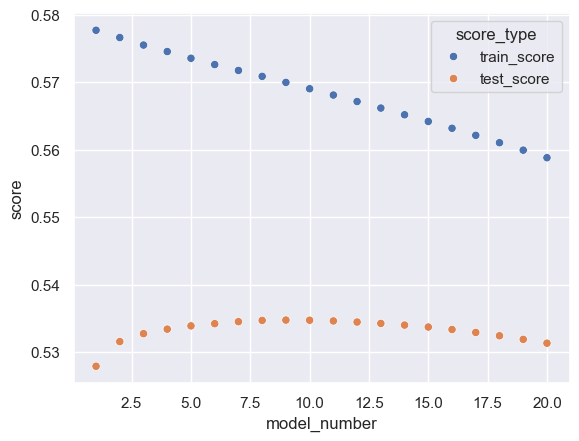

In [617]:
sns.scatterplot(data = gsCV_lasso_train_vs_test_df, y = 'score', x = 'model_number', hue = 'score_type')
plt.show()


In [619]:
print('Best estimators: ' + str(gsCV.best_estimator_))
print('Best score: ' + str(gsCV.best_score_))

Best estimators: Lasso(alpha=0.0021110526315789475, random_state=0)
Best score: 0.5347484489195204


In [621]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

# Assuming 'X' is your feature matrix and 'y' is your target variable

lasso_cv = LassoCV(alphas=None)

scaler = StandardScaler()

model_pipeline = Pipeline([('scaler', scaler), ('lasso_cv', lasso_cv)])
# Perform cross-validation

cv_models = []

for train_index, test_index in kf.split(features_outliers_dum_drop):
    X_train, X_test = features_outliers_dum_drop.iloc[train_index,:], features_outliers_dum_drop.iloc[test_index,:]
    y_train, y_test = response_outliers.iloc[train_index], response_outliers.iloc[test_index]
    # Fit the pipeline on the training data
    model_pipeline.fit(X_train, np.log(y_train))
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    # Calculate R-squared for the fold
    r2 = r2_score(np.log(y_test), y_pred)
    # Append the fitted model and R-squared to the list
    cv_models.append((model_pipeline.named_steps['lasso_cv'], r2))
# Access the optimal alpha and R-squared for each fold
optimal_alphas = [model[0].alpha_ for model in cv_models]
r2_scores = [model[1] for model in cv_models]
# Print the optimal alphas and R-squared for each fold
for fold, (alpha, r2) in enumerate(zip(optimal_alphas, r2_scores), 1):
    print(f"Fold {fold}: Optimal alpha = {alpha}, R-squared = {r2}")
print()
print(sum(r2_scores)/len(r2_scores))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3671632996174594, tolerance: 2.24630500264938
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vecto

Fold 1: Optimal alpha = 0.004355037177063965, R-squared = 0.5131997094808853
Fold 2: Optimal alpha = 0.004355037177063965, R-squared = 0.5370389260368332
Fold 3: Optimal alpha = 0.004355037177063965, R-squared = 0.5467295171087341
Fold 4: Optimal alpha = 0.004355037177063965, R-squared = 0.5253114396348477
Fold 5: Optimal alpha = 0.004355037177063965, R-squared = 0.5357734256365745

0.531610603579575


In [623]:
lasso.set_params(alpha = 0.004355037177063965)
lasso.fit(X = X_train_outliers_drop_scaled,y = np.log(y_train_outliers_drop_scaled))
print('Best train score: ' + str(lasso.score(X = X_train_outliers_drop_scaled,y = np.log(y_train_outliers_drop_scaled))))
print('Best test score: ' + str(lasso.score(X = X_test_outliers_drop_scaled,y = np.log(y_test_outliers_drop_scaled))))


Best train score: 0.5580249133619951
Best test score: 0.5114806064410111


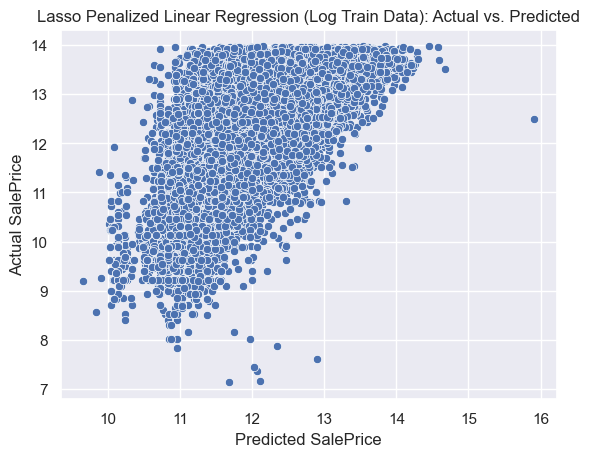

In [625]:
sns.scatterplot(x = lasso.predict(X_train_outliers_drop_scaled), y = np.log(y_train_outliers_drop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

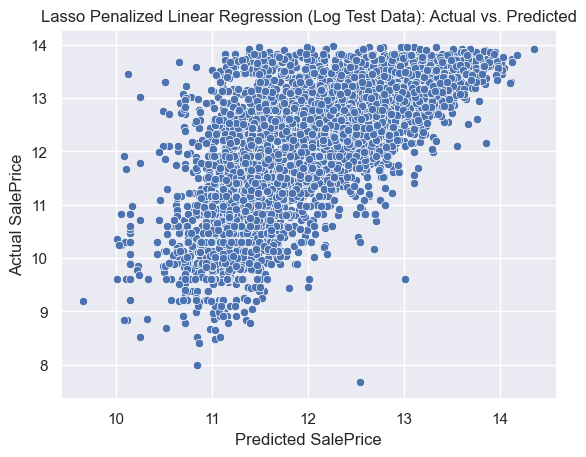

In [627]:
sns.scatterplot(x = lasso.predict(X_test_outliers_drop_scaled), y = np.log(y_test_outliers_drop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

# Lasso - Post Tuning - Cross Validation

In [630]:

lasso = Lasso(alpha = 0.004355037177063965, random_state = 0)

scaler = StandardScaler()

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_outliers_drop_scaled_cv_tuned_r2 = cross_val_score(estimator = pipe, X = features_outliers_dum_drop, y = np.log(response_outliers), cv = kf, scoring = 'r2')
lasso_outliers_drop_scaled_cv_tuned_mae = cross_val_score(estimator = pipe, X = features_outliers_dum_drop, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_error')
lasso_outliers_drop_scaled_cv_tuned_rmse = cross_val_score(estimator = pipe, X = features_outliers_dum_drop, y = np.log(response_outliers), cv = kf, scoring = 'neg_root_mean_squared_error')
lasso_outliers_drop_scaled_cv_tuned_mape = cross_val_score(estimator = pipe, X = features_outliers_dum_drop, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_percentage_error')



In [631]:
print('Mean cross-validation R2 score: ' + str(lasso_outliers_drop_scaled_cv_tuned_r2.mean()))
print('Std dev cross-validation R2 score: ' + str(lasso_outliers_drop_scaled_cv_tuned_r2.std()))

Mean cross-validation R2 score: 0.5299322309286172
Std dev cross-validation R2 score: 0.011322027488502806


In [632]:
print('Mean cross-validation MAE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_mae * -1).mean()))
print('Std dev cross-validation MAE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_mae * -1).std()))

Mean cross-validation MAE score: 0.5704014182472421
Std dev cross-validation MAE score: 0.00782399149375981


In [633]:
print('Mean cross-validation RMSE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_rmse * -1).mean()))
print('Std dev cross-validation RMSE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_rmse * -1).std()))

Mean cross-validation RMSE score: 0.7790060828544277
Std dev cross-validation RMSE score: 0.011625650465212436


In [634]:
print('Mean cross-validation MAPE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_mape * -1).mean()))
print('Std dev cross-validation MAPE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_mape * -1).std()))

Mean cross-validation MAPE score: 0.048793430663319676
Std dev cross-validation MAPE score: 0.000741708761423226


In [635]:
lasso_outliers_drop_scaled_cv_tuned_mae = lasso_outliers_drop_scaled_cv_tuned_mae * -1
lasso_outliers_drop_scaled_cv_tuned_rmse = lasso_outliers_drop_scaled_cv_tuned_rmse * -1
lasso_outliers_drop_scaled_cv_tuned_mape = lasso_outliers_drop_scaled_cv_tuned_mape * -1

# No Zip

## Lasso - No Zip - Base Model - Cross Validation

In [644]:


scaler = StandardScaler()

lasso = Lasso(random_state = 0, alpha = 0.005)

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_outliers_drop_scaled_cv_nozip_r2 = cross_val_score(estimator = pipe, X = features_outliers_dum_drop_nozip, y = np.log(response_outliers), cv = kf, scoring = 'r2')
lasso_outliers_drop_scaled_cv_nozip_mae = cross_val_score(estimator = pipe, X = features_outliers_dum_drop_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_error')
lasso_outliers_drop_scaled_cv_nozip_rmse = cross_val_score(estimator = pipe, X = features_outliers_dum_drop_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_root_mean_squared_error')
lasso_outliers_drop_scaled_cv_nozip_mape = cross_val_score(estimator = pipe, X = features_outliers_dum_drop_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_percentage_error')


In [645]:
print('Mean cross-validation R2 score: ' + str(lasso_outliers_drop_scaled_cv_nozip_r2.mean()))
print('Std dev cross-validation R2 score: ' + str(lasso_outliers_drop_scaled_cv_nozip_r2.std()))
print('Mean cross-validation MAE score: ' + str((lasso_outliers_drop_scaled_cv_nozip_mae * -1).mean()))
print('Std dev cross-validation MAE score: ' + str((lasso_outliers_drop_scaled_cv_nozip_mae * -1).std()))
print('Mean cross-validation RMSE score: ' + str((lasso_outliers_drop_scaled_cv_nozip_rmse * -1).mean()))
print('Std dev cross-validation RMSE score: ' + str((lasso_outliers_drop_scaled_cv_nozip_rmse * -1).std()))
print('Mean cross-validation MAPE score: ' + str((lasso_outliers_drop_scaled_cv_nozip_mape * -1).mean()))
print('Std dev cross-validation MAPE score: ' + str((lasso_outliers_drop_scaled_cv_nozip_mape * -1).std()))

Mean cross-validation R2 score: 0.522305004514464
Std dev cross-validation R2 score: 0.011437000629772674
Mean cross-validation MAE score: 0.5763531811785519
Std dev cross-validation MAE score: 0.007759947605640544
Mean cross-validation RMSE score: 0.7853011780738608
Std dev cross-validation RMSE score: 0.011657593010967101
Mean cross-validation MAPE score: 0.04930315277837731
Std dev cross-validation MAPE score: 0.000739915157248374


## Lasso - No Zip - Hyperparameter Tuning

In [647]:

# Assuming 'X' is your feature matrix and 'y' is your target variable

lasso_cv = LassoCV(alphas=None)

scaler = StandardScaler()

model_pipeline = Pipeline([('scaler', scaler), ('lasso_cv', lasso_cv)])
# Perform cross-validation

cv_models = []

for train_index, test_index in kf.split(features_outliers_dum_drop_nozip):
    X_train, X_test = features_outliers_dum_drop_nozip.iloc[train_index,:], features_outliers_dum_drop_nozip.iloc[test_index,:]
    y_train, y_test = response_outliers.iloc[train_index], response_outliers.iloc[test_index]
    # Fit the pipeline on the training data
    model_pipeline.fit(X_train, np.log(y_train))
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    # Calculate R-squared for the fold
    r2 = r2_score(np.log(y_test), y_pred)
    # Append the fitted model and R-squared to the list
    cv_models.append((model_pipeline.named_steps['lasso_cv'], r2))
# Access the optimal alpha and R-squared for each fold
optimal_alphas = [model[0].alpha_ for model in cv_models]
r2_scores = [model[1] for model in cv_models]
# Print the optimal alphas and R-squared for each fold
for fold, (alpha, r2) in enumerate(zip(optimal_alphas, r2_scores), 1):
    print(f"Fold {fold}: Optimal alpha = {alpha}, R-squared = {r2}")
print()
print(sum(r2_scores)/len(r2_scores))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when 

Fold 1: Optimal alpha = 0.00575710284746019, R-squared = 0.5068525527363636
Fold 2: Optimal alpha = 0.00575710284746019, R-squared = 0.529632821007862
Fold 3: Optimal alpha = 0.00575710284746019, R-squared = 0.5375725760379615
Fold 4: Optimal alpha = 0.00575710284746019, R-squared = 0.5191381993637803
Fold 5: Optimal alpha = 0.00575710284746019, R-squared = 0.5271512333310375

0.524069476495401


In [651]:
lasso.set_params(alpha = 0.00575710284746019)
lasso.fit(X = X_train_outliers_drop_scaled_nozip,y = np.log(y_train_outliers_drop_scaled_nozip))
print('Best train score: ' + str(lasso.score(X = X_train_outliers_drop_scaled_nozip,y = np.log(y_train_outliers_drop_scaled_nozip))))
print('Best test score: ' + str(lasso.score(X = X_test_outliers_drop_scaled_nozip,y = np.log(y_test_outliers_drop_scaled_nozip))))


Best train score: 0.5440550167398182
Best test score: 0.5006950130512742


## Lasso - No Zip - Post Tuning - Cross Validation

In [654]:

lasso = Lasso(alpha = 0.00575710284746019, random_state = 0)

scaler = StandardScaler()

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_outliers_drop_scaled_cv_tuned_nozip_r2 = cross_val_score(estimator = pipe, X = features_outliers_dum_drop_nozip, y = np.log(response_outliers), cv = kf, scoring = 'r2')
lasso_outliers_drop_scaled_cv_tuned_nozip_mae = cross_val_score(estimator = pipe, X = features_outliers_dum_drop_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_error')
lasso_outliers_drop_scaled_cv_tuned_nozip_rmse = cross_val_score(estimator = pipe, X = features_outliers_dum_drop_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_root_mean_squared_error')
lasso_outliers_drop_scaled_cv_tuned_nozip_mape = cross_val_score(estimator = pipe, X = features_outliers_dum_drop_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_percentage_error')



In [655]:
print('Mean cross-validation R2 score: ' + str(lasso_outliers_drop_scaled_cv_tuned_nozip_r2.mean()))
print('Std dev cross-validation R2 score: ' + str(lasso_outliers_drop_scaled_cv_tuned_nozip_r2.std()))
print('Mean cross-validation MAE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_nozip_mae * -1).mean()))
print('Std dev cross-validation MAE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_nozip_mae * -1).std()))
print('Mean cross-validation RMSE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_nozip_rmse * -1).mean()))
print('Std dev cross-validation RMSE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_nozip_rmse * -1).std()))
print('Mean cross-validation MAPE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_nozip_mape * -1).mean()))
print('Std dev cross-validation MAPE score: ' + str((lasso_outliers_drop_scaled_cv_tuned_nozip_mape * -1).std()))

Mean cross-validation R2 score: 0.5204802672972612
Std dev cross-validation R2 score: 0.011684465957983819
Mean cross-validation MAE score: 0.5778710279218215
Std dev cross-validation MAE score: 0.007838625215174798
Mean cross-validation RMSE score: 0.7867969623346905
Std dev cross-validation RMSE score: 0.011766869326189896
Mean cross-validation MAPE score: 0.04944302334855079
Std dev cross-validation MAPE score: 0.0007469012033479014


In [656]:
lasso_outliers_drop_scaled_cv_tuned_nozip_mae = lasso_outliers_drop_scaled_cv_tuned_nozip_mae * -1
lasso_outliers_drop_scaled_cv_tuned_nozip_rmse = lasso_outliers_drop_scaled_cv_tuned_nozip_rmse * -1
lasso_outliers_drop_scaled_cv_tuned_nozip_mape = lasso_outliers_drop_scaled_cv_tuned_nozip_mape * -1

# Time Trials for Models

In [660]:
import time

i = 1
lasso_outliers_times = []
lasso = Lasso(alpha = 0.004355037177063965, random_state = 0)


while i <= 5:
    start = time.time()

    lasso.fit(X = features_outliers_dum_drop_scaled, y = np.log(response_outliers))
    
    end = time.time()
    
    lasso_time = end - start
    lasso_outliers_times.append(lasso_time)
    
    i = i + 1

lasso_outliers_times

[3.9774813652038574,
 3.3273189067840576,
 3.8692188262939453,
 4.817968130111694,
 3.4274301528930664]

In [661]:

i = 1
lasso_outliers_times_nozip = []
lasso = Lasso(alpha = 0.00575710284746019, random_state = 0)


while i <= 5:
    start = time.time()

    lasso.fit(X = features_outliers_dum_drop_scaled_nozip, y = np.log(response_outliers))
    
    end = time.time()
    
    lasso_time = end - start
    lasso_outliers_times_nozip.append(lasso_time)
    
    i = i + 1

lasso_outliers_times_nozip

[1.4208850860595703,
 1.2984867095947266,
 1.3383610248565674,
 1.9903349876403809,
 1.6581192016601562]

# Model Results

In [664]:
lasso_outliers_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                     'Model Durations': lasso_outliers_times,
                                      'Lasso Penalized Regression_Outliers_Drop_Scaled R2': lasso_outliers_drop_scaled_cv_tuned_r2,
                                      'Lasso Penalized Regression_Outliers_Drop_Scaled MAE': lasso_outliers_drop_scaled_cv_tuned_mae,
                                      'Lasso Penalized Regression_Outliers_Drop_Scaled RMSE': lasso_outliers_drop_scaled_cv_tuned_rmse,
                                      'Lasso Penalized Regression_Outliers_Drop_Scaled MAPE': lasso_outliers_drop_scaled_cv_tuned_mape,
                                     }
                             )

lasso_outliers_results

Model Number  Model Durations  Lasso Penalized Regression_Outliers_Drop_Scaled R2  Lasso Penalized Regression_Outliers_Drop_Scaled MAE  Lasso Penalized Regression_Outliers_Drop_Scaled RMSE  Lasso Penalized Regression_Outliers_Drop_Scaled MAPE
0           1.0         3.977481                                           0.511481                                            0.581238                                             0.796872                                              0.049649   
1           2.0         3.327319                                           0.534440                                            0.568160                                             0.774318                                              0.048611   
2           3.0         3.869219                                           0.544308                                            0.557638                                             0.761185                                              0.047559   
3           4.0         4.817968                                           0.523658                                            0.570031                                             0.779559                                              0.048683   
4           5.0         3.427430                                           0.535773                                            0.574939                                             0.783097                                              0.049465

In [666]:
lasso_outliers_nozip_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                     'Model Durations': lasso_outliers_times_nozip,
                                      'Lasso Penalized Regression_Outliers_Drop_Scaled_NoZip R2': lasso_outliers_drop_scaled_cv_tuned_nozip_r2,
                                      'Lasso Penalized Regression_Outliers_Drop_Scaled_NoZip MAE': lasso_outliers_drop_scaled_cv_tuned_nozip_mae,
                                      'Lasso Penalized Regression_Outliers_Drop_Scaled_NoZip RMSE': lasso_outliers_drop_scaled_cv_tuned_nozip_rmse,
                                      'Lasso Penalized Regression_OUltiers_Drop_Scaled_NoZip MAPE': lasso_outliers_drop_scaled_cv_tuned_nozip_mape,
                                     }
                             )

lasso_outliers_nozip_results

Model Number  Model Durations  Lasso Penalized Regression_Outliers_Drop_Scaled_NoZip R2  Lasso Penalized Regression_Outliers_Drop_Scaled_NoZip MAE  Lasso Penalized Regression_Outliers_Drop_Scaled_NoZip RMSE  Lasso Penalized Regression_OUltiers_Drop_Scaled_NoZip MAPE
0           1.0         1.420885                                           0.500695                                                  0.588932                                                   0.805620                                                    0.050313         
1           2.0         1.298487                                           0.525213                                                  0.575751                                                   0.781954                                                    0.049278         
2           3.0         1.338361                                           0.534396                                                  0.565243                                                   0.769419                                                    0.048207         
3           4.0         1.990335                                           0.514946                                                  0.577059                                                   0.786655                                                    0.049297         
4           5.0         1.658119                                           0.527151                                                  0.582371                                                   0.790336                                                    0.050119

In [668]:

current_directory = os.getcwd()

dataframes = {'lasso_outliers_results': lasso_outliers_results,
              'lasso_outliers_results_nozip': lasso_outliers_nozip_results,
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    df.to_csv(file_path, sep='\t', index=False)

# XGBoost

# XGBoost - Base Model

In [672]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)


xgb.fit(X_train_outliers_encoded, np.log(y_train_outliers_encoded))


print('Best train score: ' + str(r2_score(np.log(y_train_outliers_encoded), xgb.predict(X_train_outliers_encoded))))
print('Best test score: ' + str(r2_score(np.log(y_test_outliers_encoded), xgb.predict(X_test_outliers_encoded))))


Best train score: 0.8725458195640058
Best test score: 0.7857501429985532


# XGBoost - Base Model - Cross Validation


In [675]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

xgb_outliers_encoded_cv_r2 = cross_val_score(estimator = xgb, X = features_outliers_encoded, y = np.log(response_outliers), cv = kf, scoring = 'r2')
xgb_outliers_encoded_cv_mae = cross_val_score(estimator = xgb, X = features_outliers_encoded, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_error')
xgb_outliers_encoded_cv_rmse = cross_val_score(estimator = xgb, X = features_outliers_encoded, y = np.log(response_outliers), cv = kf, scoring = 'neg_root_mean_squared_error')
xgb_outliers_encoded_cv_mape = cross_val_score(estimator = xgb, X = features_outliers_encoded, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_percentage_error')



In [676]:

print('Mean cross-validation score: ' + str(xgb_outliers_encoded_cv_r2.mean()))
print('Std dev cross-validation score: ' + str(xgb_outliers_encoded_cv_r2.std()))

Mean cross-validation score: 0.7878668308258057
Std dev cross-validation score: 0.00759701114234752


In [677]:

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_mae * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_mae * -1).std()))

Mean cross-validation score: 0.36103777665810755
Std dev cross-validation score: 0.007132049937511042


In [678]:

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_rmse * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_rmse * -1).std()))

Mean cross-validation score: 0.523292988972199
Std dev cross-validation score: 0.011617391983596289


In [679]:

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_mape * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_mape * -1).std()))

Mean cross-validation score: 0.030797885340414072
Std dev cross-validation score: 0.0006377609165355082


# XGBoost - Hyperparameter Tuning 

In [686]:
xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

param = {'learning_rate': [0.2, 0.3, 0.4],
         'subsample': [0.3, 0.6, 1],
         #'colsample_bytree': [0.7, 0.8, 0.9],
         'n_estimators': [60, 80, 100],
         'max_depth':range(4,17,4),
         #'min_child_weight':range(1,6,2)
        }

gsCV = GridSearchCV(xgb, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_outliers_encoded, np.log(y_train_outliers_encoded))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': range(4, 17, 4),
                         'n_estimators': [60, 80, 100],
                         'subsample': [0.3, 0.6, 1]},
             return_train_score=True)

In [688]:
gsCV_xgb_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_xgb_train_vs_test_df['model_number'] = gsCV_xgb_train_vs_test_df['model_number'] + 1
gsCV_xgb_train_vs_test_df['score_difference'] = gsCV_xgb_train_vs_test_df['train_score'] - gsCV_xgb_train_vs_test_df['test_score']

gsCV_xgb_train_vs_test_df = gsCV_xgb_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_xgb_train_vs_test_df


model_number  score_difference   score_type     score
0               1          0.028726  train_score  0.756144
1               2          0.029177  train_score  0.759961
2               3          0.026962  train_score  0.759239
3               4          0.034718  train_score  0.768532
4               5          0.034412  train_score  0.774117
5               6          0.032041  train_score  0.771909
6               7          0.039755  train_score  0.778001
7               8          0.039444  train_score  0.784862
8               9          0.036284  train_score  0.782401
9              10          0.105784  train_score  0.869537
10             11          0.116667  train_score  0.899253
11             12          0.105340  train_score  0.892335
12             13          0.121239  train_score  0.889101
13             14          0.130977  train_score  0.918381
14             15          0.115963  train_score  0.909325
15             16          0.132649  train_score  0.902896
16             17          0.141278  train_score  0.932272
17             18          0.124497  train_score  0.922100
18             19          0.166254  train_score  0.944323
19             20          0.177388  train_score  0.977077
20             21          0.171532  train_score  0.978230
21             22          0.178802  train_score  0.958715
22             23          0.183423  train_score  0.984622
23             24          0.175977  train_score  0.984350
24             25          0.187054  train_score  0.968400
25             26          0.187006  train_score  0.988441
26             27          0.178887  train_score  0.988231
27             28          0.186588  train_score  0.970670
28             29          0.189467  train_score  0.991722
29             30          0.191973  train_score  0.994386
30             31          0.196363  train_score  0.980938
31             32          0.191287  train_score  0.993746
32             33          0.192898  train_score  0.995175
33             34          0.201893  train_score  0.986206
34             35          0.192380  train_score  0.994480
35             36          0.193485  train_score  0.995460
36             37          0.037146  train_score  0.764912
37             38          0.037081  train_score  0.776051
38             39          0.034949  train_score  0.774256
39             40          0.044876  train_score  0.776387
40             41          0.045441  train_score  0.789719
41             42          0.041317  train_score  0.787816
42             43          0.051537  train_score  0.785465
43             44          0.051774  train_score  0.800493
44             45          0.047405  train_score  0.799407
45             46          0.141207  train_score  0.882976
46             47          0.142354  train_score  0.920722
47             48          0.127053  train_score  0.915778
48             49          0.157145  train_score  0.902418
49             50          0.157241  train_score  0.938307
50             51          0.139899  train_score  0.933933
51             52          0.170234  train_score  0.915746
52             53          0.167314  train_score  0.950554
53             54          0.149573  train_score  0.946457
54             55          0.202854  train_score  0.955791
55             56          0.193830  train_score  0.985224
56             57          0.184031  train_score  0.986700
57             58          0.215996  train_score  0.968609
58             59          0.197854  train_score  0.989689
59             60          0.187406  train_score  0.990976
60             61          0.224887  train_score  0.976230
61             62          0.200880  train_score  0.991766
62             63          0.189878  train_score  0.993276
63             64          0.227155  train_score  0.978429
64             65          0.203350  train_score  0.993890
65             66          0.198906  train_score  0.995338
66             67          0.235529  train_score  0.

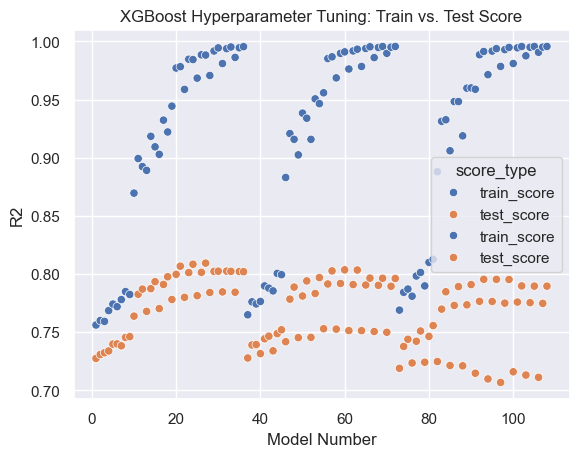

In [692]:
sns.scatterplot(data = gsCV_xgb_train_vs_test_df.loc[gsCV_xgb_train_vs_test_df['score'] > 0,:], y = 'score', x = 'model_number', hue = 'score_type')
plt.title('XGBoost Hyperparameter Tuning: Train vs. Test Score')
plt.xlabel('Model Number')
plt.ylabel('R2')
plt.show()


In [694]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.8093436538936587
Best parameters: {'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 100, 'subsample': 1}


In [696]:
# Testing colsample_bytree and min_child_weight

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

param = {'learning_rate': [0.2],
         'subsample': [1],
         'colsample_bytree': [0.7, 0.8, 0.9],
         'n_estimators': [60, 80, 100],
         'max_depth':range(4,17,4),
         'min_child_weight':range(1,6,2)
        }

gsCV = GridSearchCV(xgb, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_outliers_encoded, np.log(y_train_outliers_encoded))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.2], 'max_depth': range(4, 17, 4),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [60, 80, 100], 'subsample': [1]},
             return_train_score=True)

In [697]:
gsCV_xgb_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_xgb_train_vs_test_df['model_number'] = gsCV_xgb_train_vs_test_df['model_number'] + 1
gsCV_xgb_train_vs_test_df['score_difference'] = gsCV_xgb_train_vs_test_df['train_score'] - gsCV_xgb_train_vs_test_df['test_score']

gsCV_xgb_train_vs_test_df = gsCV_xgb_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_xgb_train_vs_test_df


model_number  score_difference   score_type     score
0               1          0.026996  train_score  0.758169
1               2          0.031283  train_score  0.770434
2               3          0.035094  train_score  0.780329
3               4          0.025612  train_score  0.756496
4               5          0.031349  train_score  0.770515
5               6          0.035476  train_score  0.780046
6               7          0.025905  train_score  0.756225
7               8          0.030125  train_score  0.769145
8               9          0.033757  train_score  0.778760
9              10          0.104177  train_score  0.891531
10             11          0.114289  train_score  0.907497
11             12          0.122910  train_score  0.919883
12             13          0.104031  train_score  0.890399
13             14          0.113540  train_score  0.905338
14             15          0.120467  train_score  0.916331
15             16          0.100530  train_score  0.885373
16             17          0.109878  train_score  0.900153
17             18          0.117623  train_score  0.912003
18             19          0.167389  train_score  0.976319
19             20          0.172206  train_score  0.982895
20             21          0.175091  train_score  0.986976
21             22          0.163057  train_score  0.972102
22             23          0.167701  train_score  0.978762
23             24          0.170906  train_score  0.982923
24             25          0.157856  train_score  0.962793
25             26          0.163574  train_score  0.970717
26             27          0.167683  train_score  0.976570
27             28          0.184300  train_score  0.993531
28             29          0.185540  train_score  0.994866
29             30          0.186009  train_score  0.995274
30             31          0.179710  train_score  0.990213
31             32          0.181666  train_score  0.992572
32             33          0.182619  train_score  0.993673
33             34          0.175817  train_score  0.984870
34             35          0.178792  train_score  0.988532
35             36          0.180670  train_score  0.990685
36             37          0.025930  train_score  0.757873
37             38          0.030574  train_score  0.770048
38             39          0.035072  train_score  0.780705
39             40          0.026206  train_score  0.759461
40             41          0.030899  train_score  0.771598
41             42          0.034844  train_score  0.781746
42             43          0.026719  train_score  0.758361
43             44          0.031473  train_score  0.771253
44             45          0.035743  train_score  0.781817
45             46          0.105291  train_score  0.890753
46             47          0.115137  train_score  0.906731
47             48          0.123782  train_score  0.919659
48             49          0.104239  train_score  0.890096
49             50          0.115106  train_score  0.906117
50             51          0.123506  train_score  0.918520
51             52          0.099377  train_score  0.885285
52             53          0.109621  train_score  0.900606
53             54          0.117429  train_score  0.912412
54             55          0.168548  train_score  0.978047
55             56          0.173008  train_score  0.984073
56             57          0.175410  train_score  0.987790
57             58          0.162763  train_score  0.971974
58             59          0.167931  train_score  0.979340
59             60          0.171490  train_score  0.983783
60             61          0.158989  train_score  0.964689
61             62          0.164850  train_score  0.972760
62             63          0.168431  train_score  0.978067
63             64          0.185438  train_score  0.994082
64             65          0.186322  train_score  0.994993
65             66          0.186908  train_score  0.995379
66             67          0.181045  train_score  0.

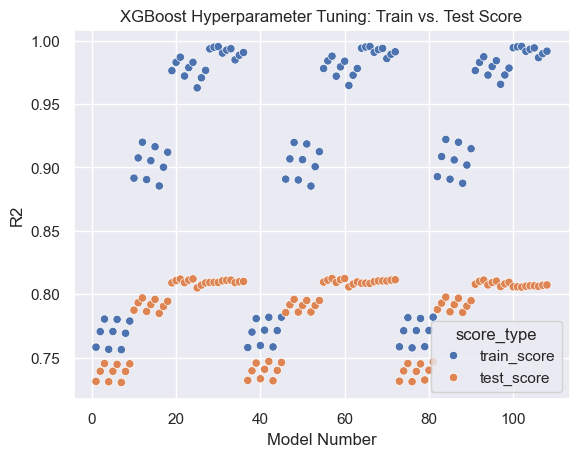

In [698]:
sns.scatterplot(data = gsCV_xgb_train_vs_test_df.loc[gsCV_xgb_train_vs_test_df['score'] > 0,:], y = 'score', x = 'model_number', hue = 'score_type')
plt.title('XGBoost Hyperparameter Tuning: Train vs. Test Score')
plt.xlabel('Model Number')
plt.ylabel('R2')
plt.show()


In [702]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.8123801667202676
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}


In [704]:
xgb.set_params(
    colsample_bytree = 0.8,
    min_child_weight = 1,
    learning_rate = 0.2, 
    max_depth = 12, 
    subsample = 1, 
    n_estimators = 100)
xgb.fit(X = X_train_outliers_encoded, y = np.log(y_train_outliers_encoded))
print('Best train score: ' + str(xgb.score(X = X_train_outliers_encoded,y = np.log(y_train_outliers_encoded))))
print('Best test score: ' + str(xgb.score(X = X_test_outliers_encoded,y = np.log(y_test_outliers_encoded))))


Best train score: 0.9843933653629762
Best test score: 0.8338094090590756


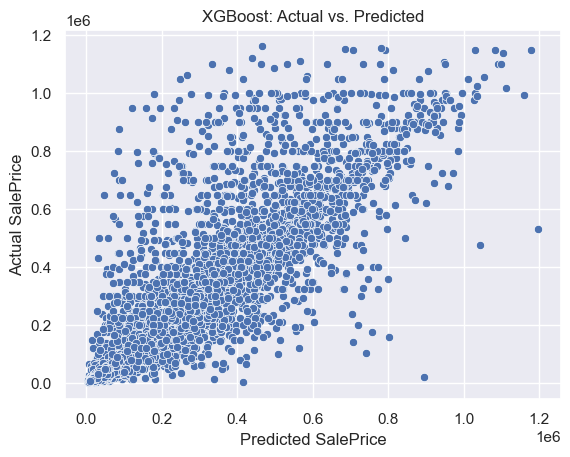

In [706]:
sns.scatterplot(x = np.exp(xgb.predict(X_test_outliers_encoded)), y = y_test_outliers_encoded)
plt.title('XGBoost: Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

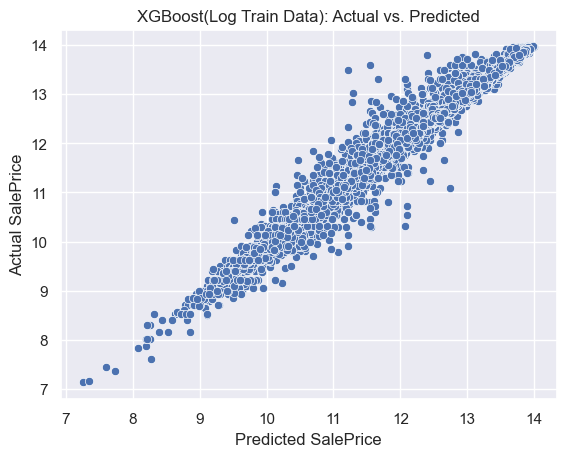

In [708]:
sns.scatterplot(x = xgb.predict(X_train_outliers_encoded), y = np.log(y_train_outliers_encoded))
plt.title('XGBoost(Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

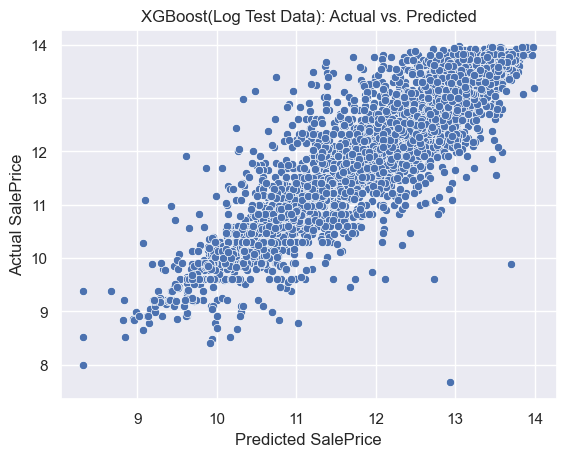

In [710]:
sns.scatterplot(x = xgb.predict(X_test_outliers_encoded), y = np.log(y_test_outliers_encoded))
plt.title('XGBoost(Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

# XGBoost - Post Tuning - Cross Validation


In [713]:

xgb = XGBRegressor(objective ='reg:squarederror', 
                   random_state=0, 
                   colsample_bytree = 0.8,
                   min_child_weight = 1,
                   learning_rate = 0.2, 
                   max_depth = 12, 
                   subsample = 1, 
                   n_estimators = 100)

xgb_outliers_encoded_cv_tuned_r2 = cross_val_score(estimator = xgb, X = features_outliers_encoded, y = np.log(response_outliers), cv = kf, scoring = 'r2')
xgb_outliers_encoded_cv_tuned_mae = cross_val_score(estimator = xgb, X = features_outliers_encoded, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_error')
xgb_outliers_encoded_cv_tuned_rmse = cross_val_score(estimator = xgb, X = features_outliers_encoded, y = np.log(response_outliers), cv = kf, scoring = 'neg_root_mean_squared_error')
xgb_outliers_encoded_cv_tuned_mape = cross_val_score(estimator = xgb, X = features_outliers_encoded, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_percentage_error')


In [714]:

print('Mean cross-validation score: ' + str(xgb_outliers_encoded_cv_tuned_r2.mean()))
print('Std dev cross-validation score: ' + str(xgb_outliers_encoded_cv_tuned_r2.std()))

Mean cross-validation score: 0.8319961309432984
Std dev cross-validation score: 0.004877176556266113


In [715]:

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_mae * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_mae * -1).std()))

Mean cross-validation score: 0.28569978619287884
Std dev cross-validation score: 0.004141118196436598


In [716]:

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_rmse * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_rmse * -1).std()))

Mean cross-validation score: 0.46569821903046293
Std dev cross-validation score: 0.007874523605069465


In [717]:

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_mape * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_mape * -1).std()))

Mean cross-validation score: 0.02425374746743065
Std dev cross-validation score: 0.00037496043878702145


In [718]:
xgb_outliers_encoded_cv_tuned_mae = xgb_outliers_encoded_cv_tuned_mae * -1
xgb_outliers_encoded_cv_tuned_rmse = xgb_outliers_encoded_cv_tuned_rmse * -1
xgb_outliers_encoded_cv_tuned_mape = xgb_outliers_encoded_cv_tuned_mape * -1

# SHAP Analysis

In [720]:
import shap
shap. initjs()

xgb.set_params(objective ='reg:squarederror', 
                   random_state=0, 
                   colsample_bytree = 0.8,
                   min_child_weight = 1,
                   learning_rate = 0.2, 
                   max_depth = 12, 
                   subsample = 1, 
                   n_estimators = 100)


shap_model = xgb.fit(X = features_outliers_encoded, y = (response_outliers))

explainer = shap.TreeExplainer(shap_model)
shap_values = explainer(features_outliers_encoded)


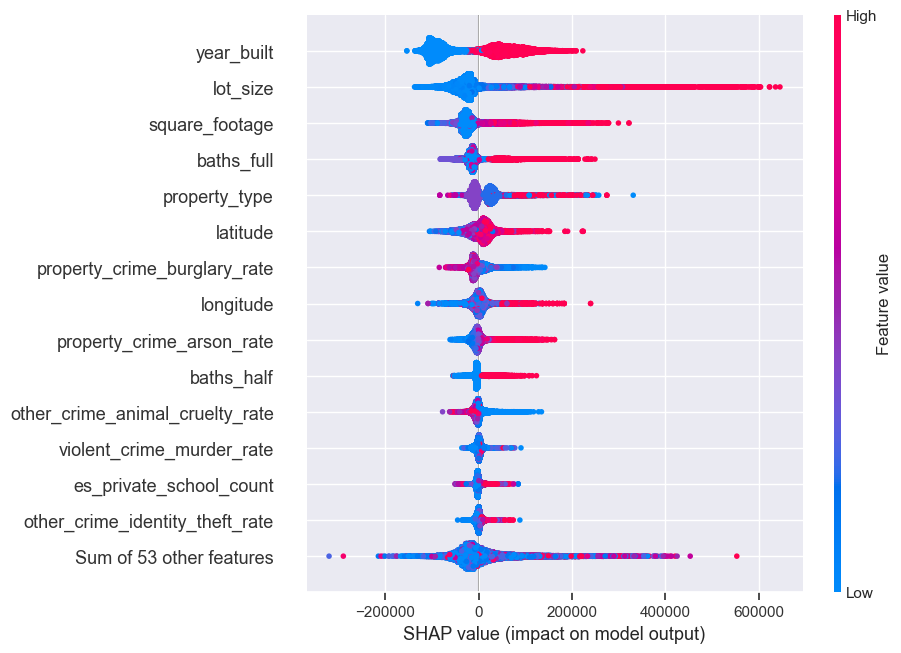

In [721]:
shap.plots.beeswarm(shap_values, max_display = 15)

# No Zip

## XGBoost - No Zip - Base Model - Cross Validation

In [732]:

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

xgb_outliers_encoded_cv_nozip_r2 = cross_val_score(estimator = xgb, X = features_outliers_encoded_nozip, y = np.log(response_outliers), cv = kf, scoring = 'r2')
xgb_outliers_encoded_cv_nozip_mae = cross_val_score(estimator = xgb, X = features_outliers_encoded_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_error')
xgb_outliers_encoded_cv_nozip_rmse = cross_val_score(estimator = xgb, X = features_outliers_encoded_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_root_mean_squared_error')
xgb_outliers_encoded_cv_nozip_mape = cross_val_score(estimator = xgb, X = features_outliers_encoded_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_percentage_error')



In [733]:

print('Mean cross-validation score: ' + str(xgb_outliers_encoded_cv_nozip_r2.mean()))
print('Std dev cross-validation score: ' + str(xgb_outliers_encoded_cv_nozip_r2.std()))

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_nozip_mae * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_nozip_mae * -1).std()))

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_nozip_rmse * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_nozip_rmse * -1).std()))

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_nozip_mape * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_nozip_mape * -1).std()))

Mean cross-validation score: 0.7848430514335633
Std dev cross-validation score: 0.007320747528633042
Mean cross-validation score: 0.3641618594630836
Std dev cross-validation score: 0.005667129638395228
Mean cross-validation score: 0.5270162081440064
Std dev cross-validation score: 0.011243369924909145
Mean cross-validation score: 0.03107053643432508
Std dev cross-validation score: 0.0005144054212581332


## XGBoost - No Zip - Hyperparameter Tuning

In [737]:
xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

param = {'learning_rate': [0.033, 0.1, 0.133, 0.3, 0.4],
         'subsample': [0.3, 0.6, 1],
         'n_estimators': [40, 50, 60],
         'max_depth':range(3,10,2)
        }

gsCV = GridSearchCV(xgb, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_outliers_encoded_nozip, np.log(y_train_outliers_encoded_nozip))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.033, 0.1, 0.133, 0.3, 0.4],
                         'max_depth': range(3, 10, 2),
                         'n_estimators': [40, 50, 60],
                         'subsample': [0.3, 0.6, 1]},
             return_train_score=True)

In [738]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.7942177644538541
Best parameters: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 60, 'subsample': 1}


In [741]:
xgb.set_params(learning_rate = 0.3, max_depth = 9, subsample = 1, n_estimators = 60)
xgb.fit(X = X_train_outliers_encoded_nozip, y = np.log(y_train_outliers_encoded_nozip))
print('Best train score: ' + str(xgb.score(X = X_train_outliers_encoded_nozip,y = np.log(y_train_outliers_encoded_nozip))))
print('Best test score: ' + str(xgb.score(X = X_test_outliers_encoded_nozip,y = np.log(y_test_outliers_encoded_nozip))))


Best train score: 0.9369033609419674
Best test score: 0.8080394586572408


In [743]:
# Testing colsample_bytree and min_child_weight

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

param = {'learning_rate': [0.3],
         'subsample': [1],
         'colsample_bytree': [0.7, 0.8, 0.9],
         'n_estimators': [60, 80, 100],
         'max_depth':range(4,17,4),
         'min_child_weight':range(1,6,2)
        }


gsCV = GridSearchCV(xgb, param, cv = kf, return_train_score = True)
gsCV.fit(X_train_outliers_encoded_nozip, np.log(y_train_outliers_encoded_nozip))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.3], 'max_depth': range(4, 17, 4),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [60, 80, 100], 'subsample': [1]},
             return_train_score=True)

In [744]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.8052002966229098
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 12, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1}


In [747]:
xgb.set_params(
    learning_rate = 0.3,
    #subsample = 1,
    colsample_bytree = 0.8,
    min_child_weight = 3,
    max_depth = 12, 
    subsample = 1, 
    n_estimators = 100)
xgb.fit(X = X_train_outliers_encoded_nozip, y = np.log(y_train_outliers_encoded_nozip))
print('Best train score: ' + str(xgb.score(X = X_train_outliers_encoded_nozip,y = np.log(y_train_outliers_encoded_nozip))))
print('Best test score: ' + str(xgb.score(X = X_test_outliers_encoded_nozip,y = np.log(y_test_outliers_encoded_nozip))))


Best train score: 0.9877099071115844
Best test score: 0.8261090553770751


## XGBoost - No Zip - Post Tuning - Cross Validation

In [750]:

xgb = XGBRegressor(objective ='reg:squarederror', random_state=0, 
                   learning_rate = 0.3,
                   #subsample = 1,
                   colsample_bytree = 0.8,
                   min_child_weight = 3,
                   max_depth = 12, 
                   subsample = 1, 
                   n_estimators = 100)          
                  

xgb_outliers_encoded_cv_tuned_nozip_r2 = cross_val_score(estimator = xgb, X = features_outliers_encoded_nozip, y = np.log(response_outliers), cv = kf, scoring = 'r2')
xgb_outliers_encoded_cv_tuned_nozip_mae = cross_val_score(estimator = xgb, X = features_outliers_encoded_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_error')
xgb_outliers_encoded_cv_tuned_nozip_rmse = cross_val_score(estimator = xgb, X = features_outliers_encoded_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_root_mean_squared_error')
xgb_outliers_encoded_cv_tuned_nozip_mape = cross_val_score(estimator = xgb, X = features_outliers_encoded_nozip, y = np.log(response_outliers), cv = kf, scoring = 'neg_mean_absolute_percentage_error')


In [751]:

print('Mean cross-validation score: ' + str(xgb_outliers_encoded_cv_tuned_nozip_r2.mean()))
print('Std dev cross-validation score: ' + str(xgb_outliers_encoded_cv_tuned_nozip_r2.std()))

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_nozip_mae * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_nozip_mae * -1).std()))

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_nozip_rmse * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_nozip_rmse * -1).std()))

print('Mean cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_nozip_mape * -1).mean()))
print('Std dev cross-validation score: ' + str((xgb_outliers_encoded_cv_tuned_nozip_mape * -1).std()))

Mean cross-validation score: 0.8251572251319885
Std dev cross-validation score: 0.006456415035928782
Mean cross-validation score: 0.2892445580375769
Std dev cross-validation score: 0.005750233059770413
Mean cross-validation score: 0.4750498423860985
Std dev cross-validation score: 0.009660582475375571
Mean cross-validation score: 0.02453167026828878
Std dev cross-validation score: 0.00048525354995109036


In [752]:
xgb_outliers_encoded_cv_tuned_nozip_mae = xgb_outliers_encoded_cv_tuned_nozip_mae * -1
xgb_outliers_encoded_cv_tuned_nozip_rmse = xgb_outliers_encoded_cv_tuned_nozip_rmse * -1
xgb_outliers_encoded_cv_tuned_nozip_mape = xgb_outliers_encoded_cv_tuned_nozip_mape * -1

# Time Trials for Models

In [754]:
import time

i = 1
xgb_outliers_times = []

xgb.set_params(
    colsample_bytree = 0.8,
    min_child_weight = 1,
    learning_rate = 0.2, 
    max_depth = 12, 
    subsample = 1, 
    n_estimators = 100)

while i <= 5:
    start = time.time()

    xgb.fit(X = features_outliers_encoded, y = np.log(response_outliers))
    
    end = time.time()
    
    xgb_time = end - start
    xgb_outliers_times.append(xgb_time)
    
    i = i + 1

xgb_outliers_times

[1.3156018257141113,
 1.3130578994750977,
 1.300771951675415,
 1.2864689826965332,
 1.3331429958343506]

In [755]:
i = 1
xgb_outliers_times_nozip = []

xgb.set_params(
    learning_rate = 0.3,
    #subsample = 1,
    colsample_bytree = 0.8,
    min_child_weight = 3,
    max_depth = 12, 
    subsample = 1, 
    n_estimators = 100)

while i <= 5:
    start = time.time()

    xgb.fit(X = features_outliers_encoded_nozip, y = np.log(response_outliers))
    
    end = time.time()
    
    xgb_time = end - start
    xgb_outliers_times_nozip.append(xgb_time)
    
    i = i + 1

xgb_outliers_times_nozip

[0.9768838882446289,
 0.9392209053039551,
 0.9508709907531738,
 1.015366792678833,
 0.9803259372711182]

# Model Results

In [762]:
xgb_outliers_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                     'Model Durations': xgb_outliers_times,
                                      'XGBoost_Outliers_Encoded R2': xgb_outliers_encoded_cv_tuned_r2,
                                      'XGBoost_Outliers_Encoded MAE': xgb_outliers_encoded_cv_tuned_mae,
                                      'XGBoost_Outliers_Encoded RMSE': xgb_outliers_encoded_cv_tuned_rmse,
                                      'XGBoost_Outliers_Encoded MAPE': xgb_outliers_encoded_cv_tuned_mape  
                                     }
                             )

xgb_outliers_results

Model Number  Model Durations  XGBoost_Outliers_Encoded R2  XGBoost_Outliers_Encoded MAE  XGBoost_Outliers_Encoded RMSE  XGBoost_Outliers_Encoded MAPE
0           1.0         1.315602                     0.832248                      0.288006                       0.466962                       0.024437
1           2.0         1.313058                     0.839872                      0.278183                       0.454115                       0.023693
2           3.0         1.300772                     0.833738                      0.284564                       0.459782                       0.023960
3           4.0         1.286469                     0.825462                      0.287757                       0.471883                       0.024442
4           5.0         1.333143                     0.828662                      0.289990                       0.475749                       0.024737

In [764]:
xgb_outliers_nozip_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                     'Model Durations': xgb_outliers_times_nozip,
                                      'XGBoost_Outliers_Encoded_NoZip R2': xgb_outliers_encoded_cv_tuned_nozip_r2,
                                      'XGBoost_Outliers_Encoded_NoZip MAE': xgb_outliers_encoded_cv_tuned_nozip_mae,
                                      'XGBoost_Outliers_Encoded_NoZip RMSE': xgb_outliers_encoded_cv_tuned_nozip_rmse,
                                      'XGBoost_Outliers_Encoded_NoZip MAPE': xgb_outliers_encoded_cv_tuned_nozip_mape  
                                     }
                             )

xgb_outliers_nozip_results

Model Number  Model Durations  XGBoost_Outliers_Encoded_NoZip R2  XGBoost_Outliers_Encoded_NoZip MAE  XGBoost_Outliers_Encoded_NoZip RMSE  XGBoost_Outliers_Encoded_NoZip MAPE
0           1.0         0.976884                           0.828437                            0.292625                             0.472236                             0.024808
1           2.0         0.939221                           0.835372                            0.278288                             0.460451                             0.023691
2           3.0         0.950871                           0.825127                            0.289242                             0.471538                             0.024352
3           4.0         1.015367                           0.817267                            0.291431                             0.482834                             0.024696
4           5.0         0.980326                           0.819583                            0.294637                             0.488190                             0.025111

In [766]:

current_directory = os.getcwd()

dataframes = {'xgb_outliers_results': xgb_outliers_results,
              'xgb_outliers_nozip_results': xgb_outliers_nozip_results
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    df.to_csv(file_path, sep='\t', index=False)